# Compare multi fitted atmospheric parameters with MERRA2, mostly PWV on polar star

- author Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : June 5th 2023
- last update : June 5th 2023

In [80]:
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import os,sys,re

from astropy.io import fits
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec
%matplotlib inline
import pickle
import seaborn as sns
import copy
from collections import OrderedDict

import re

from scipy.stats import norm
import matplotlib.mlab as mlab

In [2]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [3]:
import time
from datetime import datetime,date
from astropy.time import Time
import dateutil.parser
import pytz

In [4]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

# Config

## MERRA2

In [5]:
path_merra2="data/merra2"
files_merra2=["MERRA2_2022_inst1_2d_asm_Nx_M2I1NXASM_lsst_AllYear.csv","MERRA2_2023_inst1_2d_asm_Nx_M2I1NXASM_lsst_AllYear.csv"]

In [6]:
all_merra2 = []
for file in files_merra2:
    merra2 = pd.read_csv(os.path.join(path_merra2,file))
    all_merra2.append(merra2)

In [7]:
merra2 = pd.concat(all_merra2,axis=0)

In [8]:
merra2

time         PS       T10M        T2M        TO3  \
0     2022-01-01 00:00:00  78373.930  289.30786  288.90808  257.98914   
1     2022-01-01 01:00:00  78367.740  288.21515  287.12756  258.31482   
2     2022-01-01 02:00:00  78367.800  288.52910  286.97772  258.89682   
3     2022-01-01 03:00:00  78359.290  288.83496  287.12402  259.63242   
4     2022-01-01 04:00:00  78323.950  288.85938  286.85750  259.80580   
...                   ...        ...        ...        ...        ...   
2899  2023-05-01 19:00:00  78563.664  290.48788  291.99042  254.60630   
2900  2023-05-01 20:00:00  78563.914  289.69570  290.83330  254.63974   
2901  2023-05-01 21:00:00  78559.350  288.56854  289.15417  255.64276   
2902  2023-05-01 22:00:00  78546.445  285.85200  285.12033  257.27237   
2903  2023-05-01 23:00:00  78530.360  283.87234  282.64716  258.78693   

           TOX  TQI  TQL       TQV         TS      U10M       U2M      U50M  \
0     0.005531  0.0  0.0  4.601702  287.75560  0.520695  0.326794  0.553153   
1     0.005538  0.0  0.0  4.115004  285.83252 -1.459027 -0.710716 -1.780724   
2     0.005550  0.0  0.0  3.729155  284.31880 -1.594976 -0.926049 -1.774782   
3     0.005566  0.0  0.0  3.478715  283.06470 -1.434828 -0.903335 -1.510033   
4     0.005570  0.0  0.0  3.245809  282.01086 -1.512039 -0.949360 -1.627161   
...        ...  ...  ...       ...        ...       ...       ...       ...   
2899  0.005471  0.0  0.0  4.049993  298.70978  5.575956  4.544321  4.465390   
2900  0.005471  0.0  0.0  3.884601  295.70877  4.769679  3.888485  3.818321   
2901  0.005493  0.0  0.0  3.636793  291.19907  3.615564  2.929509  2.955853   
2902  0.005528  0.0  0.0  3.492958  282.80817  1.502217  0.851706  1.997467   
2903  0.005548  0.0  0.0  3.328452  279.23883 -0.478248 -0.344046 -0.440016   

          V10M       V2M      V50M  
0     1.102575  0.660825  1.494173  
1     0.587936  0.317768  0.869015  
2     0.270014  0.138611  0.425286  
3     0.010729 -0.026372  0.067131  
4    -0.081824 -0.077090 -0.066964  
...        ...       ...       ...  
2899 -2.150555 -1.741833 -2.571225  
2900 -1.908305 -1.544555 -2.260876  
2901 -1.546800 -1.243349 -1.785669  
2902 -0.333128 -0.099431 -0.593912  
2903 -0.592873 -0.375258 -0.772477  

[11664 rows x 16 columns]

### Make collections and pandas series including time series

In [9]:
# datetime list
all_merra2_datetime = [ Time(str_time).to_datetime() for str_time in merra2['time'] ]

# pandas series
pwv_merra2 = merra2['TQV']
oz_merra2 = merra2['TO3']

# merra time series
merra_time_series = pd.to_datetime(all_merra2_datetime)

In [10]:
merra_time_series

DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 01:00:00',
               '2022-01-01 02:00:00', '2022-01-01 03:00:00',
               '2022-01-01 04:00:00', '2022-01-01 05:00:00',
               '2022-01-01 06:00:00', '2022-01-01 07:00:00',
               '2022-01-01 08:00:00', '2022-01-01 09:00:00',
               ...
               '2023-05-01 14:00:00', '2023-05-01 15:00:00',
               '2023-05-01 16:00:00', '2023-05-01 17:00:00',
               '2023-05-01 18:00:00', '2023-05-01 19:00:00',
               '2023-05-01 20:00:00', '2023-05-01 21:00:00',
               '2023-05-01 22:00:00', '2023-05-01 23:00:00'],
              dtype='datetime64[ns]', length=11664, freq=None)

In [11]:
pwv_merra2

0       4.601702
1       4.115004
2       3.729155
3       3.478715
4       3.245809
          ...   
2899    4.049993
2900    3.884601
2901    3.636793
2902    3.492958
2903    3.328452
Name: TQV, Length: 11664, dtype: float64

In [12]:
# to select in a date time range
# greater than the start date and smaller than the end date
# mask = (merra_time_series > startTime) & (merra_time_series  <= endTime)

Text(0.5, 1.0, 'precipitable water vapor in MERRA2 in 2022 and 2023')

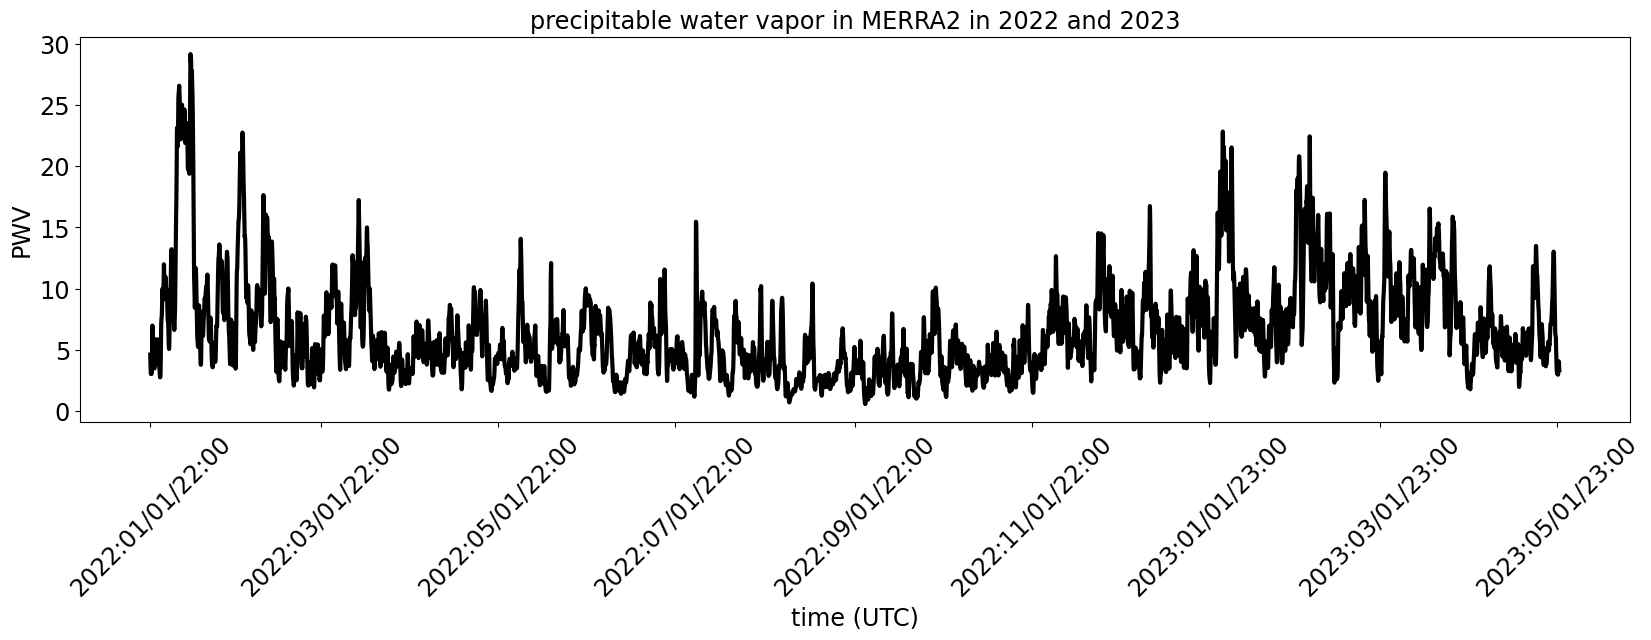

In [13]:
fig=plt.figure(figsize=(20,5))
    
ax=fig.add_subplot(111)
#myFmt = mdates.DateFormatter('%H:%M')
myFmt = mdates.DateFormatter('%Y:%D:%H')
ax.xaxis.set_major_formatter(myFmt)

ax.plot(all_merra2_datetime,pwv_merra2 ,'-',color='k',lw=3)
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlabel("time (UTC)")
ax.set_ylabel("PWV")
ax.set_title('precipitable water vapor in MERRA2 in 2022 and 2023')

In [14]:
all_merra2_datetime = [ Time(str_time).to_datetime() for str_time in merra2['time'] ]
oz_merra2 = merra2['TO3']

(0.0, 600.0)

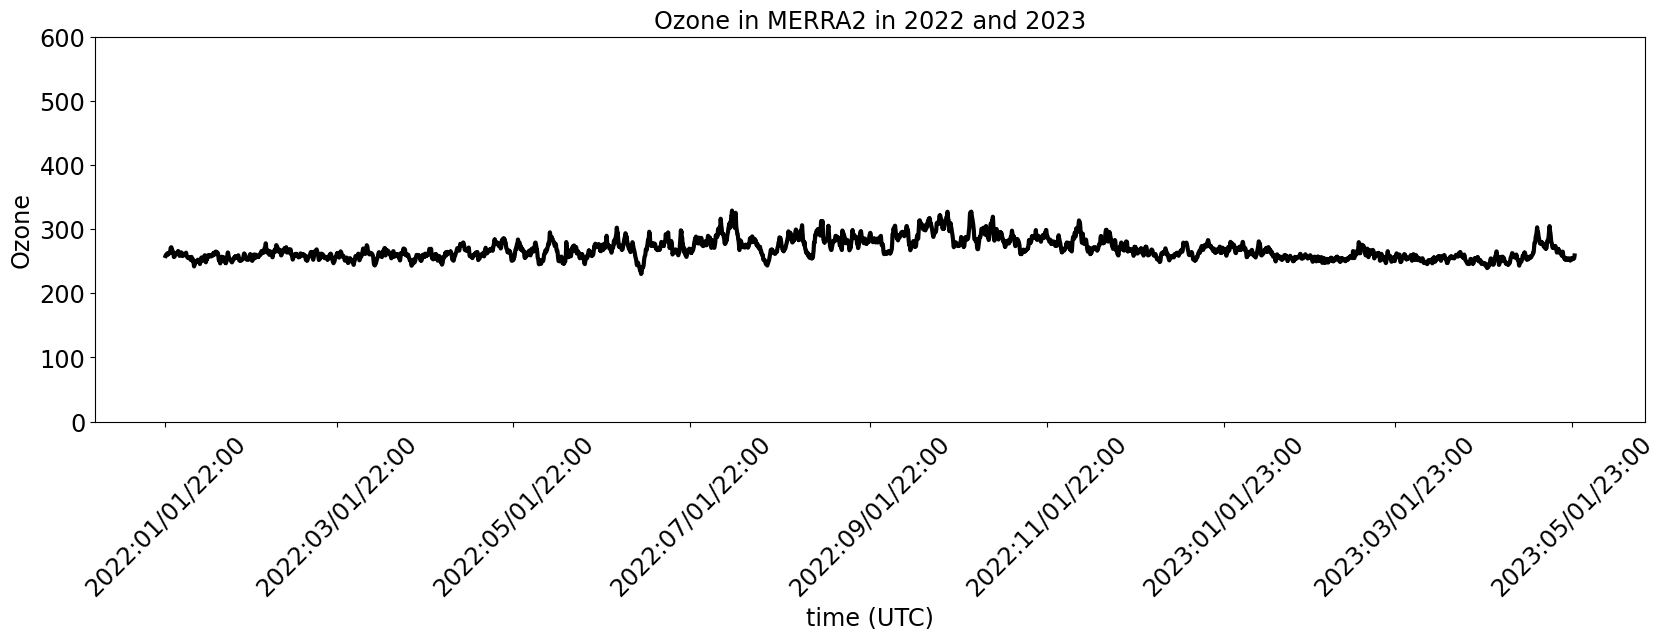

In [15]:
fig=plt.figure(figsize=(20,5))
    
ax=fig.add_subplot(111)
#myFmt = mdates.DateFormatter('%H:%M')
myFmt = mdates.DateFormatter('%Y:%D:%H')
ax.xaxis.set_major_formatter(myFmt)

ax.plot(all_merra2_datetime,oz_merra2 ,'-',color='k',lw=3)
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlabel("time (UTC)")
ax.set_ylabel("Ozone")
ax.set_title('Ozone in MERRA2 in 2022 and 2023')
ax.set_ylim(0,600)

## Data

In [16]:
DATE="2022 - 2023"

In [17]:
FLAG_SELECT_POLAR = True
FLAG_SELECT_REMOVE_BIGSIGMA = True

In [18]:
if FLAG_SELECT_POLAR:
    tag_stars = "HD185975_star"
else:
    tag_stars = "all_stars"

In [19]:
path_out = "dataout/fitparamatm"

In [20]:
filenames = [ 
"multifitcovparamatm-2022-09-27-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-09-28-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-09-29-empty~holo4_003-psf2dffm-polar.csv",
#"multifitcovparamatm-2022-10-12-empty~holo4_003-psf2dffm-polar.csv",
#"multifitcovparamatm-2022-10-26-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-10-27-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-11-09-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-11-10-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-11-23-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-12-08-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-12-09-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-01-17-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-01-18-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-02-14-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-02-15-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-02-16-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-02-28-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-03-01-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-03-02-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-03-15-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-03-16-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-05-09-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-05-10-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-05-11-empty~holo4_003-psf2dffm-polar.csv"]

In [21]:
#re.findall("^multifitcovparamatm-(.*)-empty~holo4_003-psf2dffm-polar.csv$",filenames[0])[0]

In [22]:
NDAYS = len(filenames)
tags = [ ]
for fn in filenames:
    the_date_tag = re.findall("^multifitcovparamatm-(.*)-empty~holo4_003-psf2dffm-polar.csv$",fn)[0]
    tags.append(the_date_tag)

In [23]:
#filenames = [
#"multifitcovparamatm-2022-09-28-empty~holo4_003-psf2dffm-polar.csv",
#"multifitcovparamatm-2022-09-29-empty~holo4_003-psf2dffm-polar.csv",
#"multifitcovparamatm-2022-12-08-empty~holo4_003-psf2dffm-polar.csv",
#"multifitcovparamatm-2022-12-09-empty~holo4_003-psf2dffm-polar.csv",
#"multifitcovparamatm-2023-01-17-empty~holo4_003-psf2dffm-polar.csv",
#"multifitcovparamatm-2023-01-18-empty~holo4_003-psf2dffm-polar.csv",
#"multifitcovparamatm-2023-02-28-empty~holo4_003-psf2dffm-polar.csv",
#"multifitcovparamatm-2023-03-01-empty~holo4_003-psf2dffm-polar.csv",
#"multifitcovparamatm-2023-03-16-empty~holo4_003-psf2dffm-polar.csv",
#]

In [24]:
#NDAYS = len(filenames)
#tags = [
#    "2022/09/28","2022/09/29",
#    "2022/12/08","2022/12/09",
#    "2023/01/17","2023/01/18",
#    "2023/02/28",
#    "2023/03/01","2023/03/16"
#]

In [25]:
all_df = []
for filename in filenames:
    df = pd.read_csv(os.path.join(path_out,filename), index_col=0)
    df=df.dropna(axis=0)
    
    #cut on chi2
    df = df[df['chi2_1']<400]
    
    if FLAG_SELECT_POLAR:
        df = df[df["spec_target_label"]=='HD185975']
        
    if FLAG_SELECT_REMOVE_BIGSIGMA:
        df =df[df["pwv_sig"]<1]
    all_df.append(df)

In [26]:
df

index       exposure                   spec_date_obs spec_target_label  \
1       2  2023051100160  2023-05-11T23:52:01.599991556Z          HD185975   
2       3  2023051100163  2023-05-11T23:53:55.034507293Z          HD185975   
3      13  2023051100203  2023-05-12T00:20:48.671994986Z          HD185975   
9      19  2023051100228  2023-05-12T00:40:22.965507207Z          HD185975   
10     20  2023051100233  2023-05-12T00:44:31.382492410Z          HD185975   
11     21  2023051100236  2023-05-12T00:46:44.261508838Z          HD185975   
13     23  2023051100245  2023-05-12T00:53:58.869992498Z          HD185975   
16     26  2023051100257  2023-05-12T01:03:30.314509927Z          HD185975   
17     27  2023051100260  2023-05-12T01:05:44.961991483Z          HD185975   

   spec_filter_label  spec_airmass  spec_pressure  spec_temperature  \
1              empty      2.125477              0                 0   
2              empty      2.124050              0                 0   
3              empty      2.113478              0                 0   
9              empty      2.104620              0                 0   
10             empty      2.103332              0                 0   
11             empty      2.101509              0                 0   
13             empty      2.098629              0                 0   
16             empty      2.093680              0                 0   
17             empty      2.091748              0                 0   

    spec_humidity  spec_hour_angle  ...   egrey_3     SNR_3     chi2_4  \
1               0      -149.718423  ...  0.001850  0.074003   6.810999   
2               0      -149.124051  ...  0.001631  0.110717   5.361623   
3               0      -142.433459  ...  0.002014  0.067707   9.087365   
9               0      -137.582208  ...  0.001699  0.088052   5.457459   
10              0      -136.717421  ...  0.001635  0.066612   4.088804   
11              0      -135.994466  ...  0.003229  0.088654  22.301741   
13              0      -134.384948  ...  0.001464  0.082176   3.963201   
16              0      -132.033461  ...  0.002083  0.009151   6.671683   
17              0      -131.283427  ...  0.002275  0.075838  11.191696   

       pwv_4    grey_4    epwv_4   egrey_4     SNR_4   pwv_avg   pwv_sig  
1   7.245593  1.021730  0.256598  0.001675  0.042276  5.544981  0.980209  
2   7.320346  1.017206  0.234151  0.001519  0.086255  6.384325  0.757046  
3   7.026846  1.024199  0.303880  0.001976  0.014076  5.645572  0.878179  
9   7.460522  1.024639  0.233884  0.001522  0.074876  6.102036  0.922780  
10  7.262500  1.010128  0.211648  0.001363  0.045800  6.009896  0.735803  
11  6.175447  1.012504  0.458125  0.003073  0.145644  5.510697  0.659891  
13  7.633003  1.015319  0.225693  0.001424  0.050955  6.103059  0.901676  
16  7.249855  1.024393  0.263372  0.001698  0.001724  6.043907  0.654620  
17  6.902173  1.025930  0.332267  0.002200  0.037959  5.569093  0.834025  

[9 rows x 92 columns]

In [27]:
NF =len(all_df)

In [28]:
all_df[0].head()

index       exposure                   spec_date_obs spec_target_label  \
4     27  2022092700734  2022-09-28T08:44:30.712000547Z          HD185975   
5     28  2022092700735  2022-09-28T08:45:13.622001236Z          HD185975   

  spec_filter_label  spec_airmass  spec_pressure  spec_temperature  \
4             empty      2.052135              0                 0   
5             empty      2.052582              0                 0   

   spec_humidity  spec_hour_angle  ...   egrey_3     SNR_3    chi2_4  \
4              0      -239.381469  ...  0.001214  0.070459  3.429068   
5              0      -239.202314  ...  0.002100  0.011859  5.505423   

      pwv_4    grey_4    epwv_4   egrey_4     SNR_4   pwv_avg   pwv_sig  
4  7.198238  0.642188  0.288268  0.001155  0.037200  6.366714  0.696058  
5  7.121764  0.988605  0.296650  0.001840  0.072462  6.234264  0.667250  

[2 rows x 98 columns]

In [29]:
hls_colors = sns.color_palette("hls", NF)

## Make dataframe of merra for each observations

In [30]:
all_df_merra_nightobs = []

for idx,infos in enumerate(all_df):
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['spec_date_obs'] ]
    numbers = infos['number'].values
    airmasses = infos['spec_airmass'].values
    
    N= len(numbers)
    
    if N>0:
  
        # Create rectangle x coordinates
        startTime = all_datetime[0]
        endTime =  all_datetime[-1]
        
        mask = (merra_time_series > startTime) & (merra_time_series  <= endTime)
        
        the_df_merra_obs = merra2.loc[mask]
        
        all_df_merra_nightobs.append(the_df_merra_obs)
            

### concatenation of observations

In [31]:
merra2_nightobs = pd.concat(all_df_merra_nightobs,axis=0)

## Airmass

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_80396/1147230304.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,airmasses,'r:o',color=hls_colors[idx],lw=3)


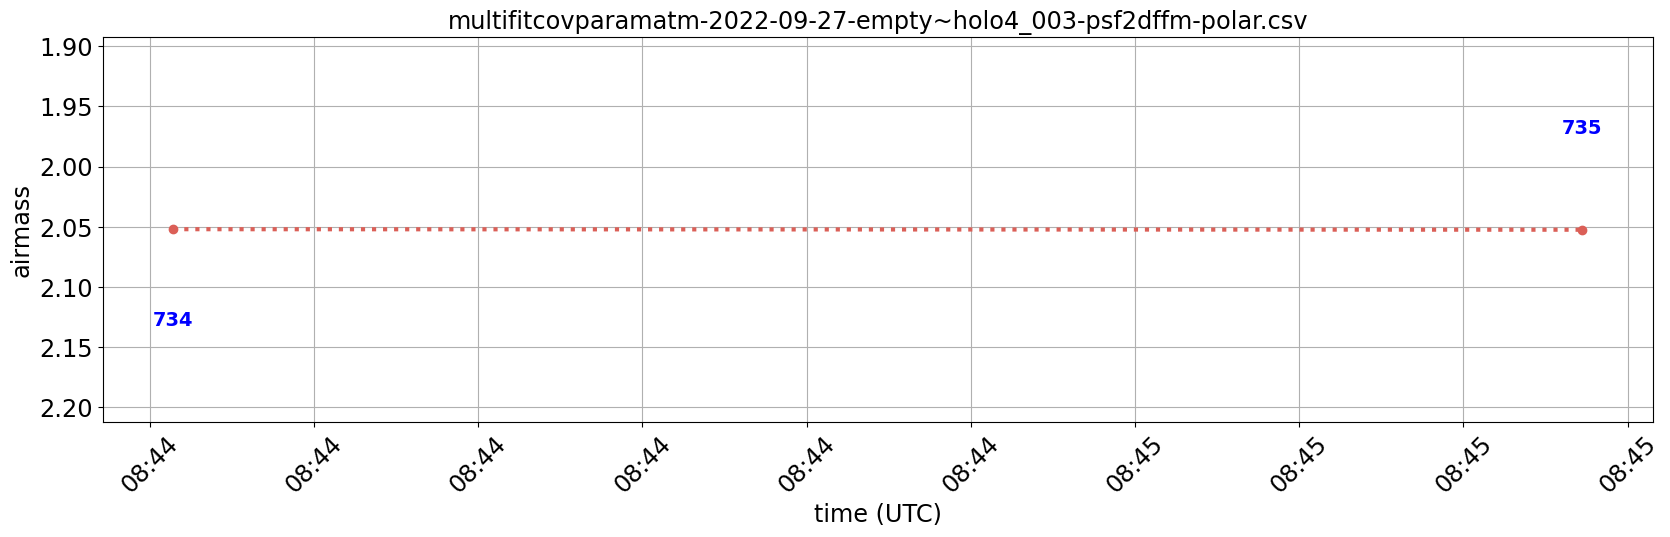

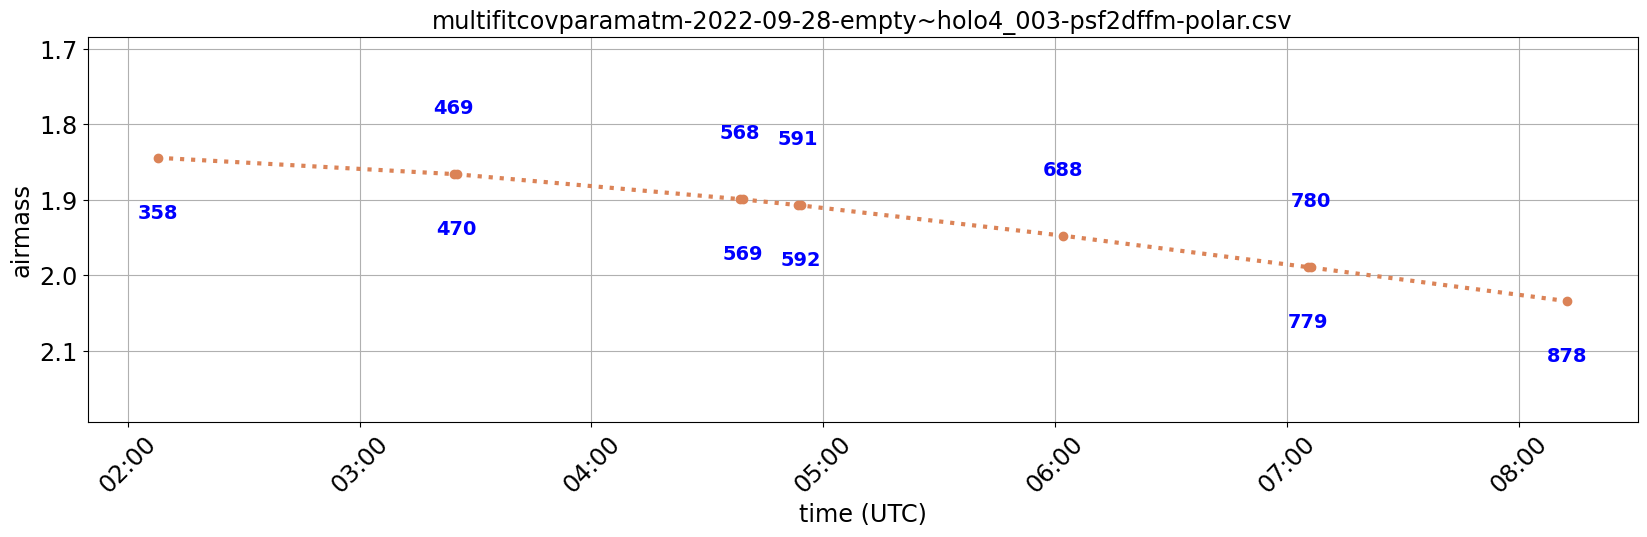

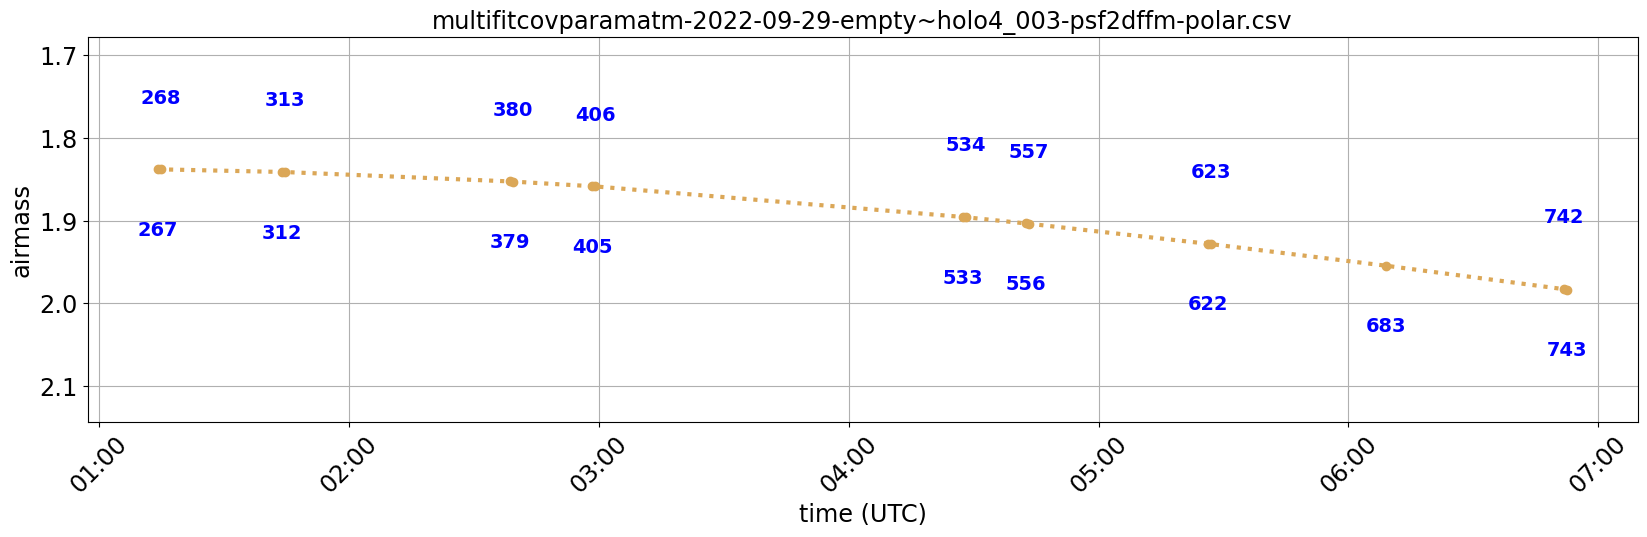

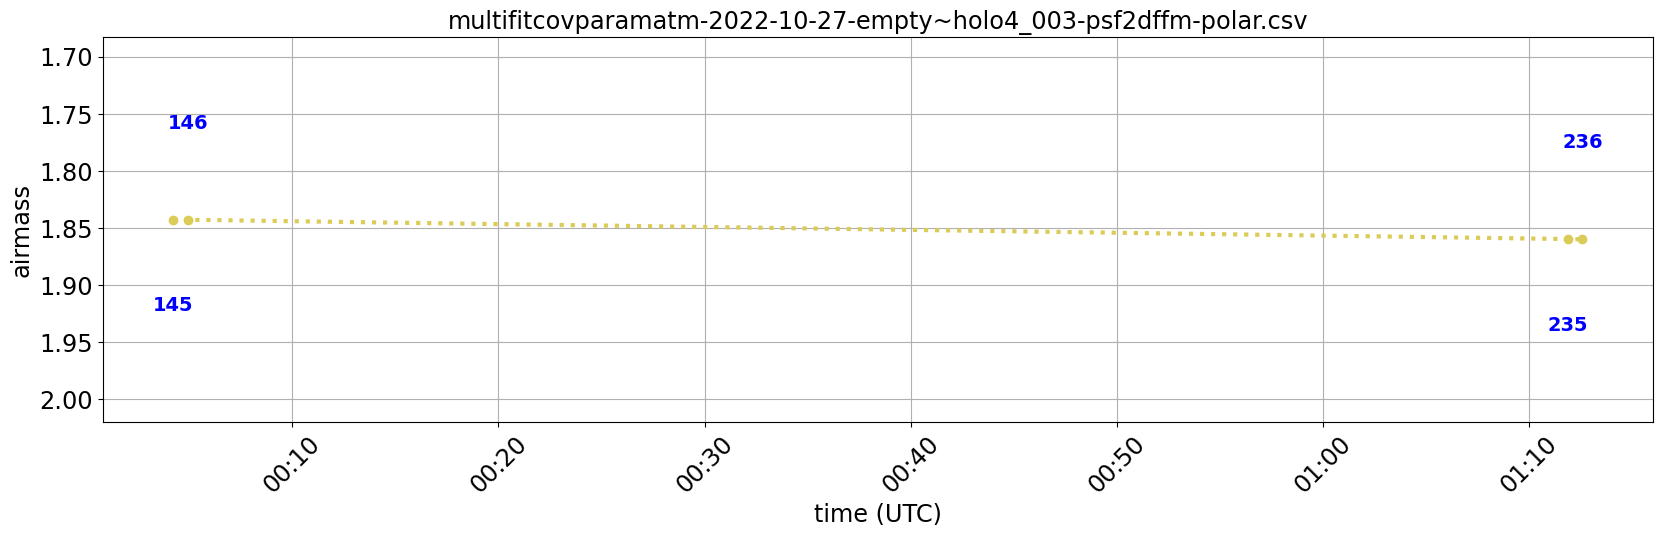

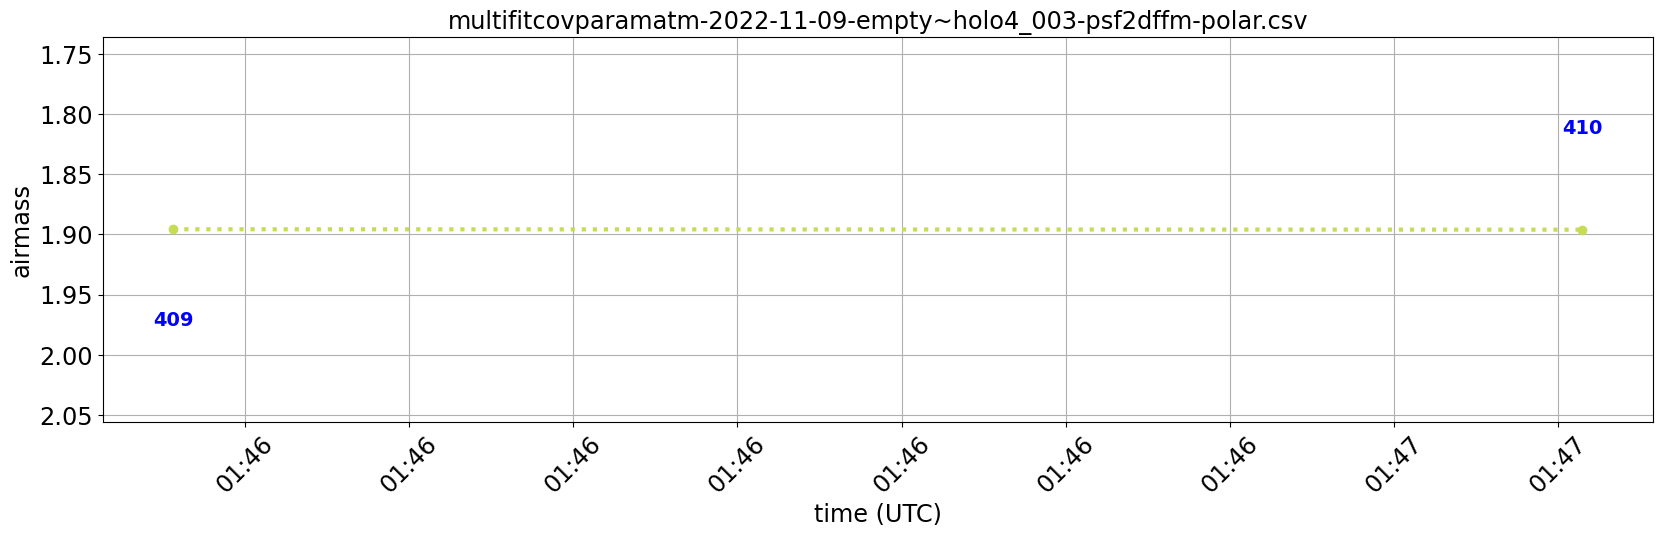

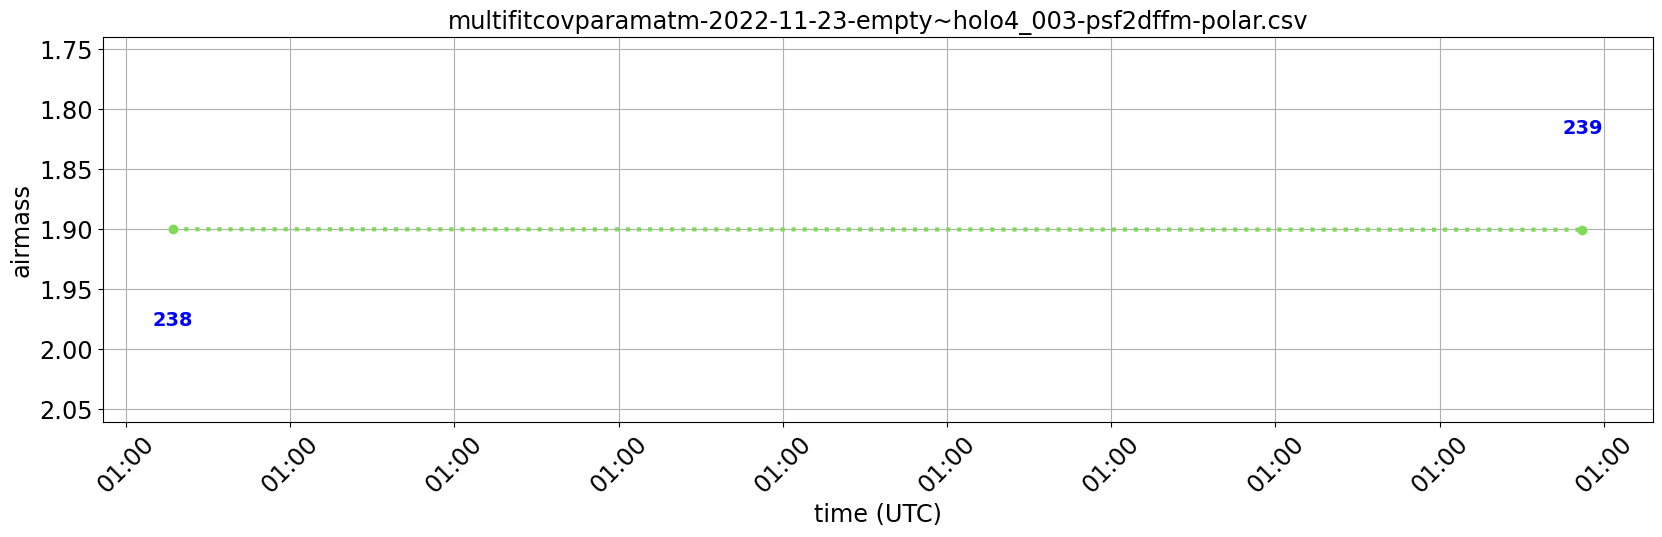

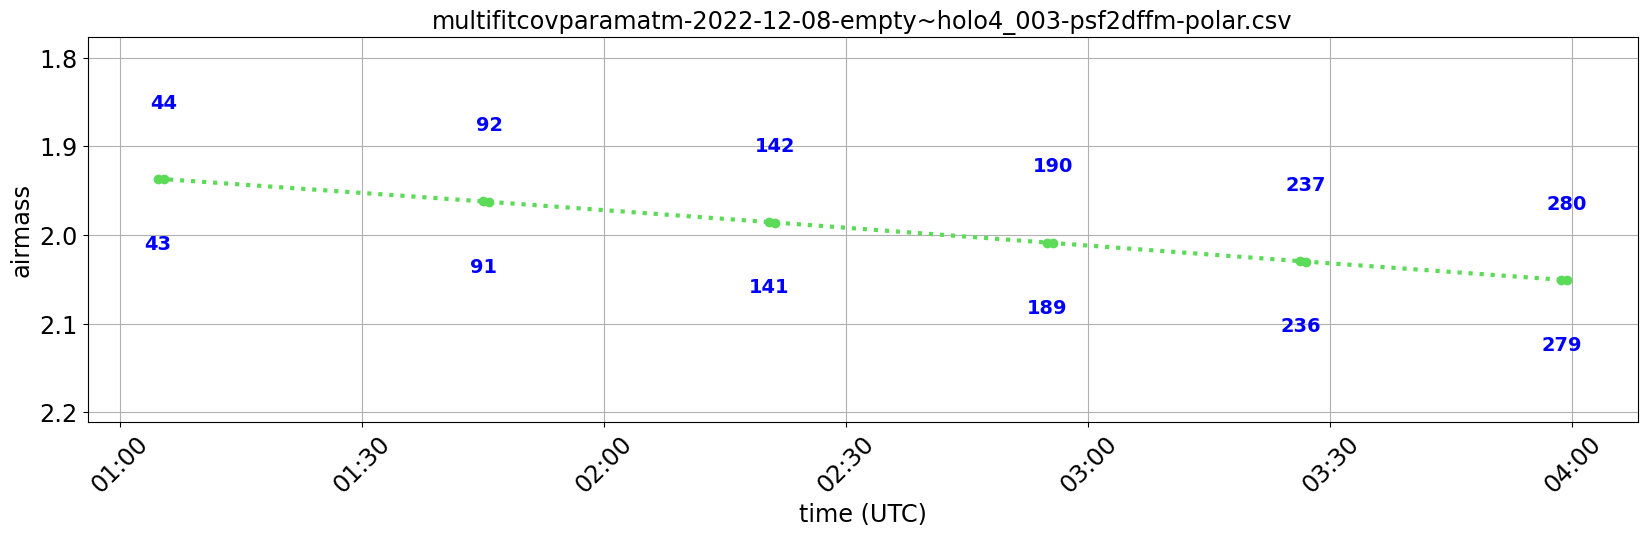

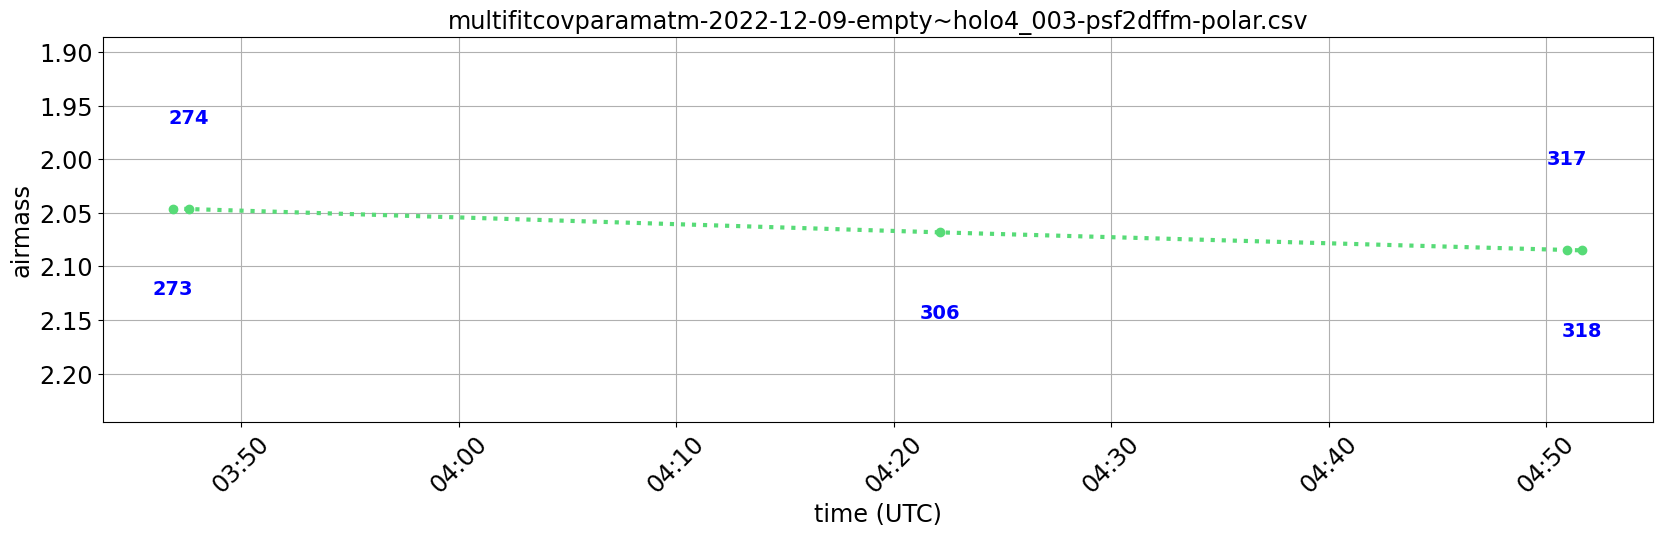

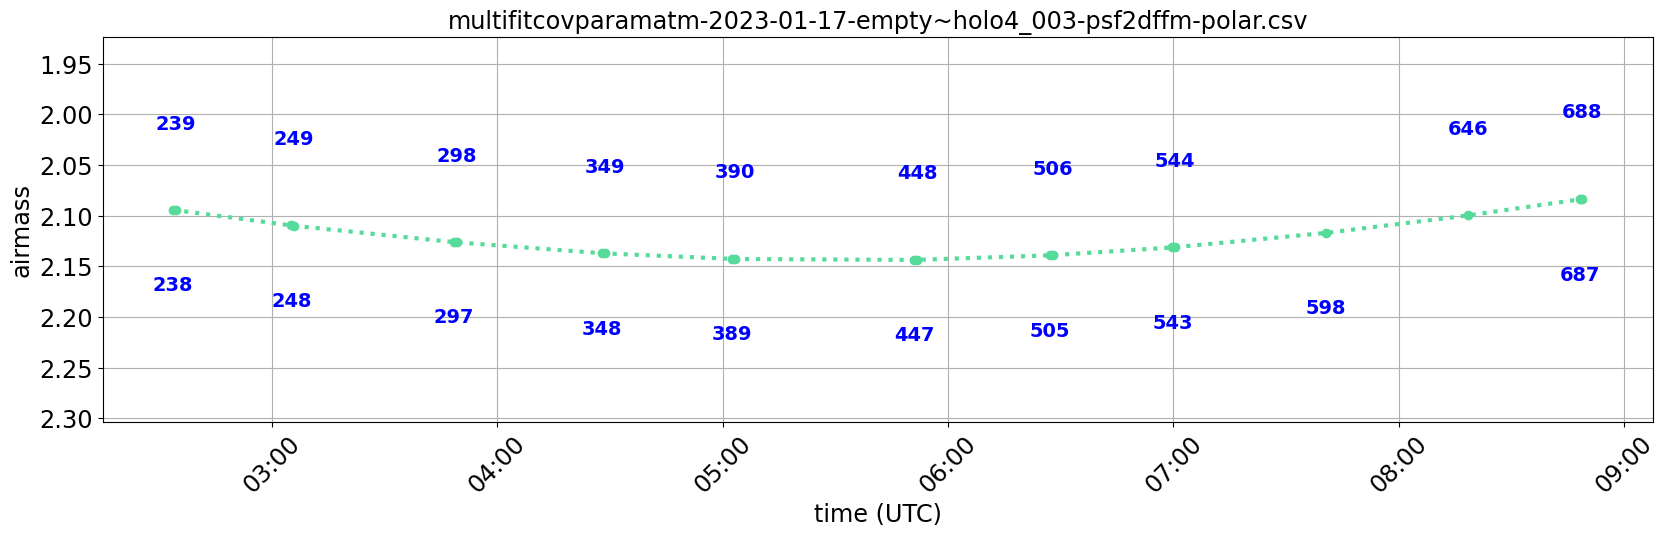

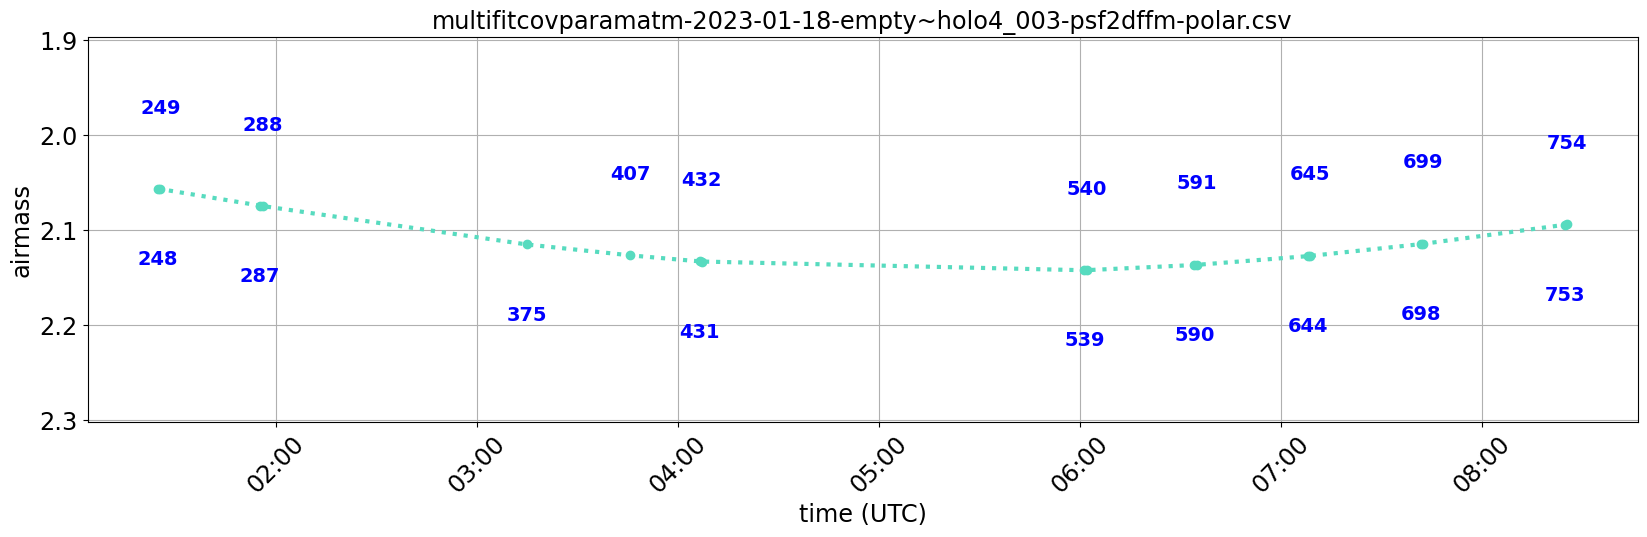

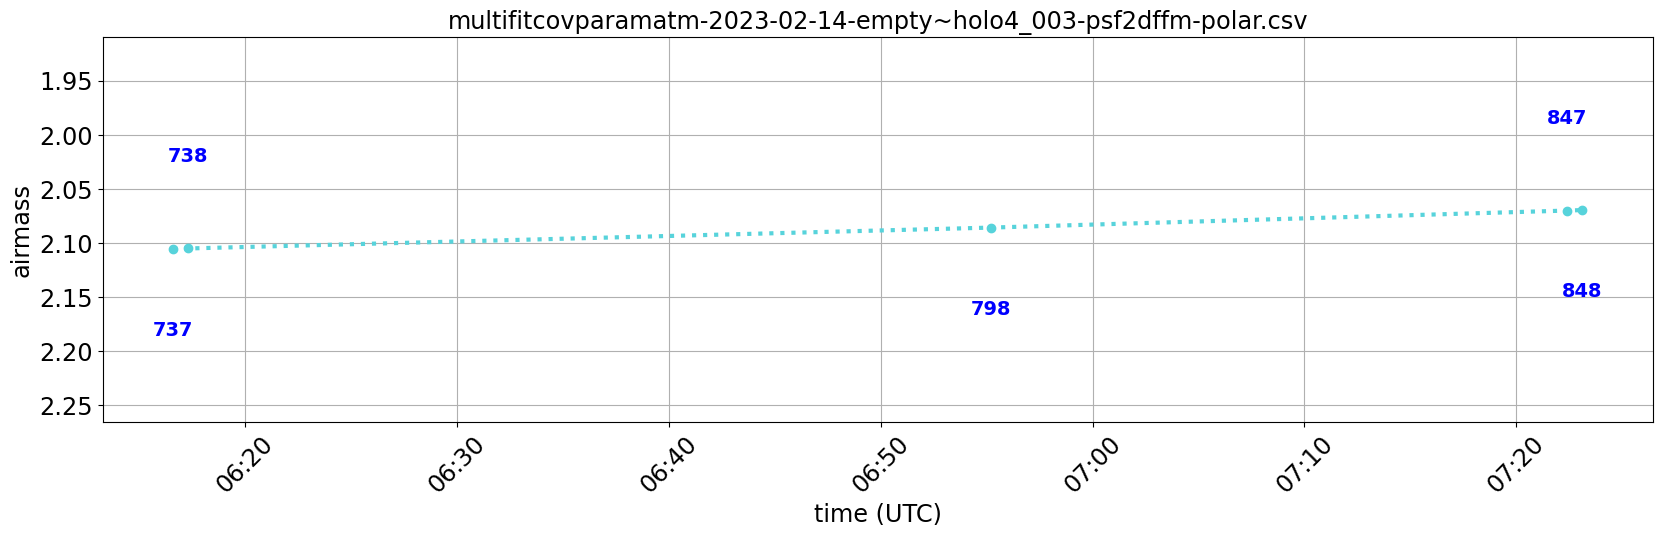

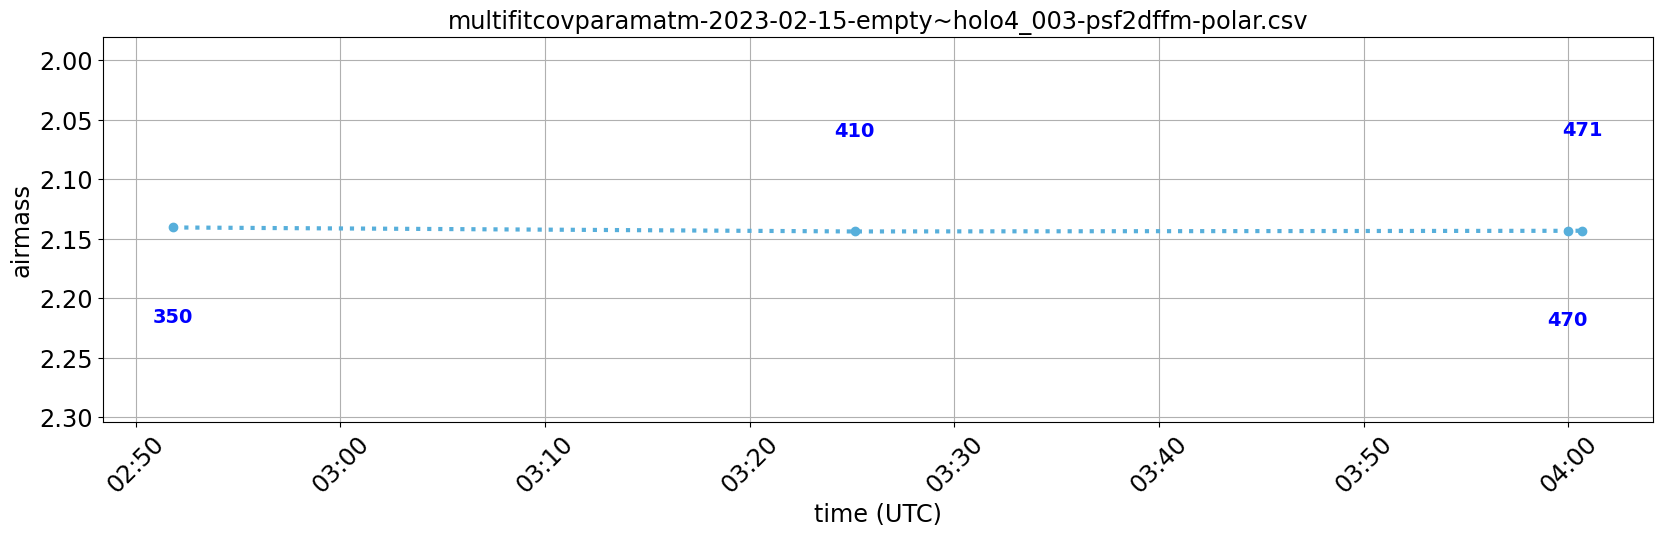

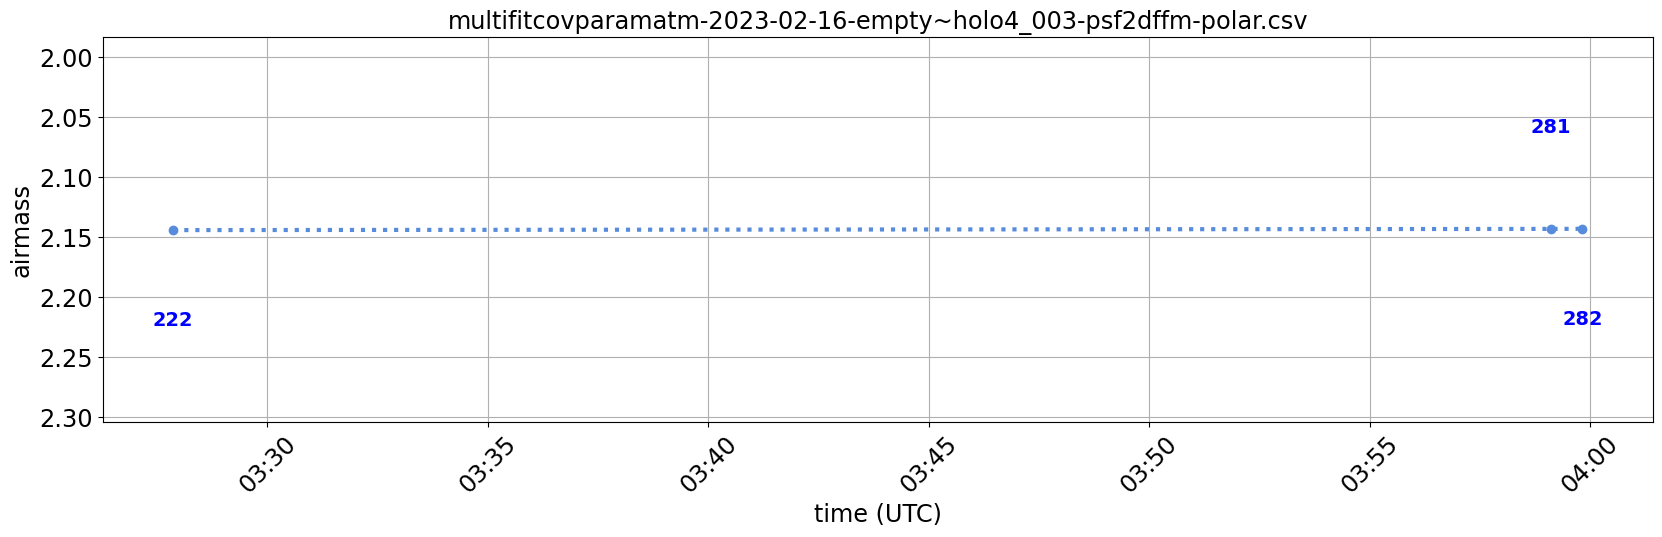

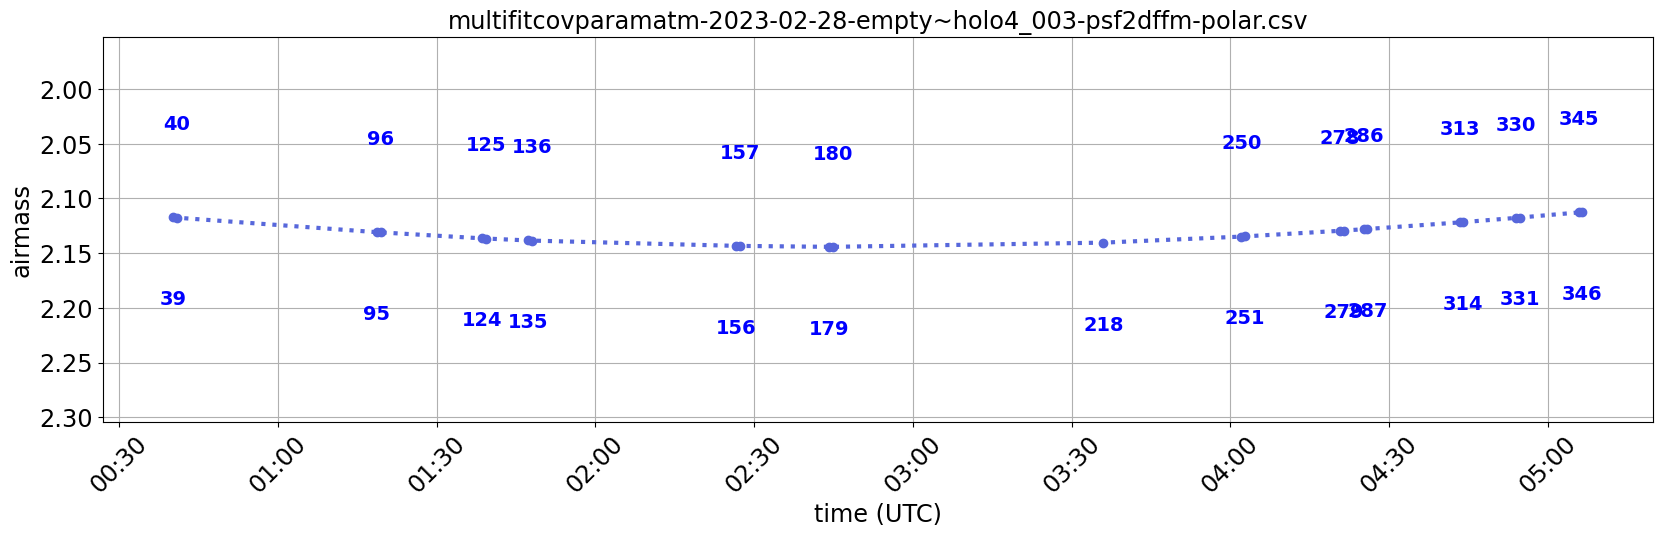

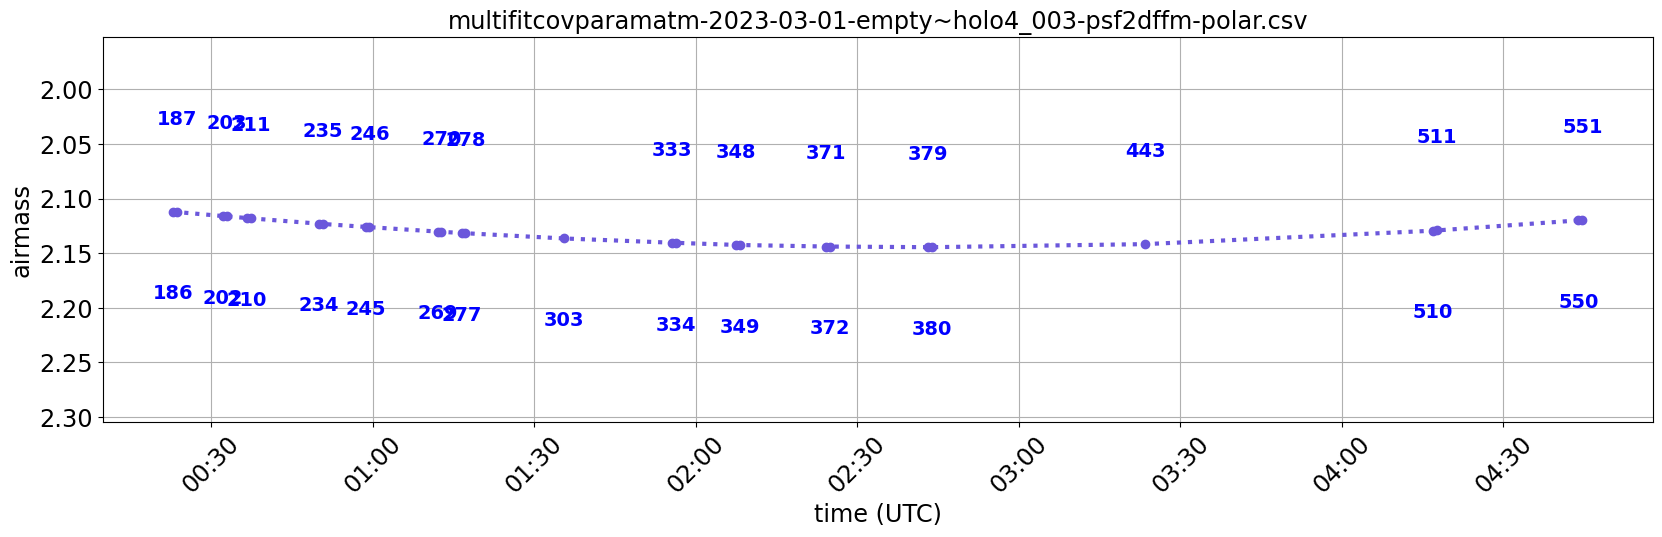

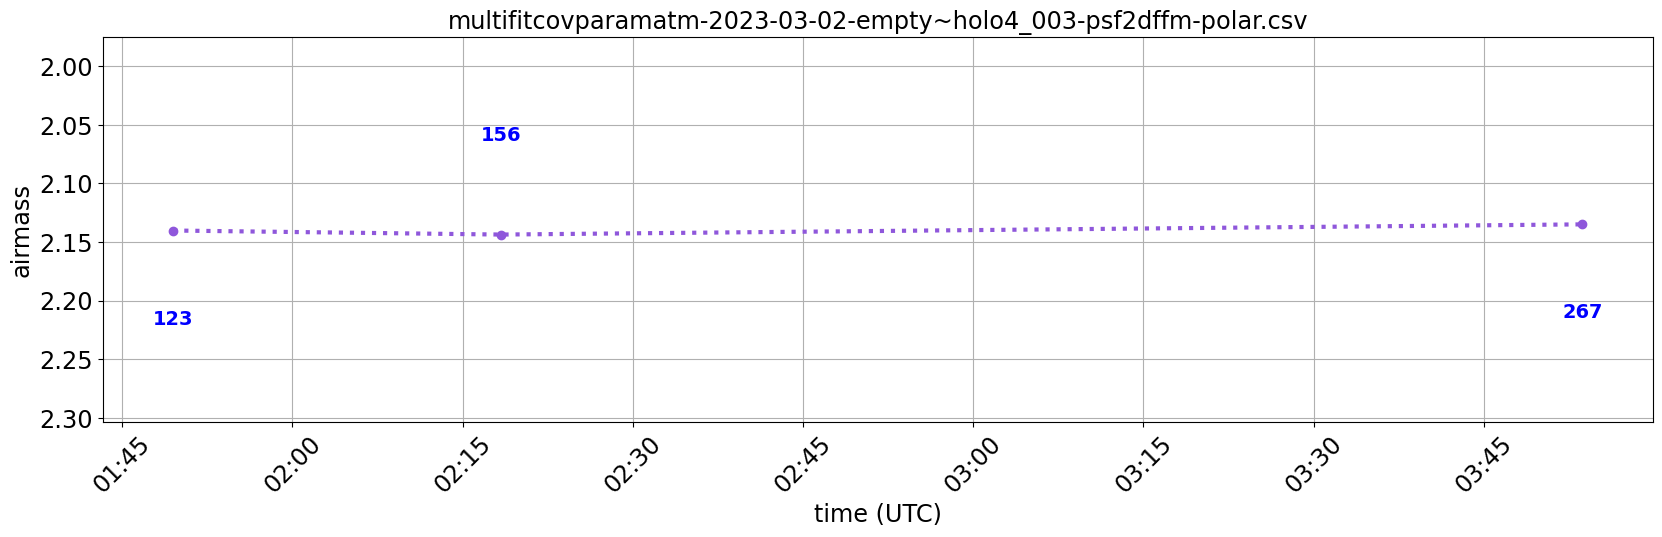

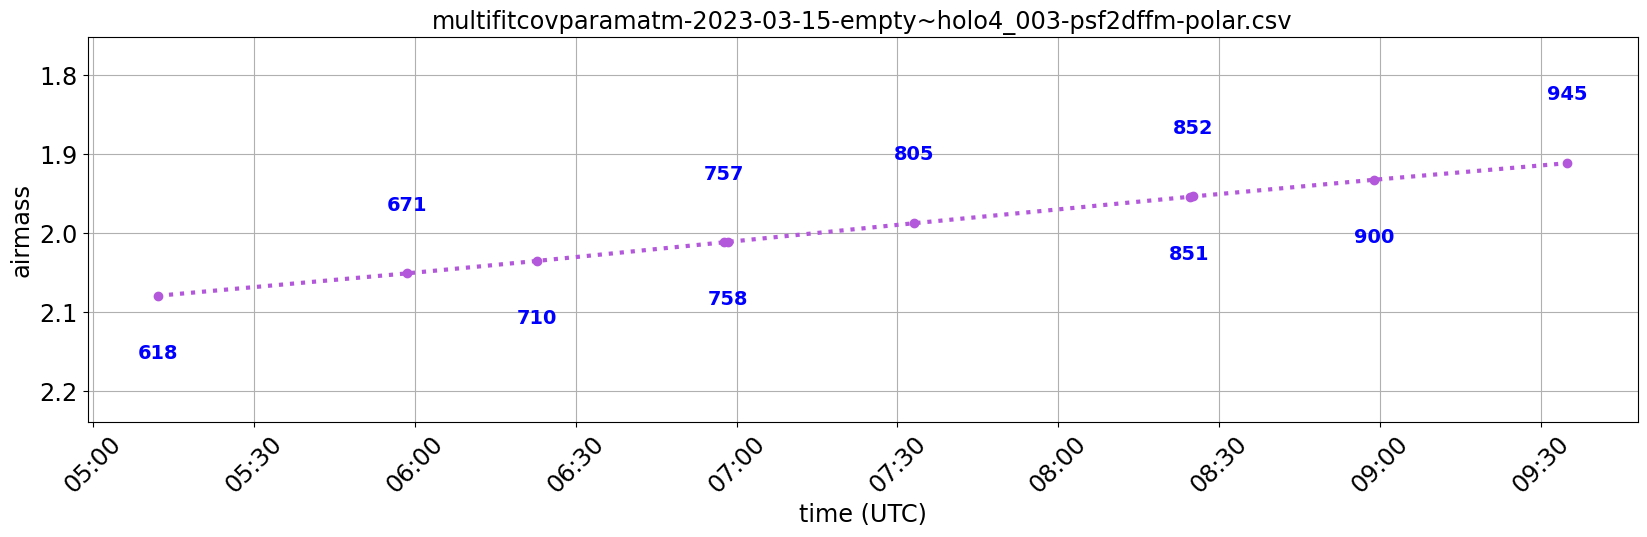

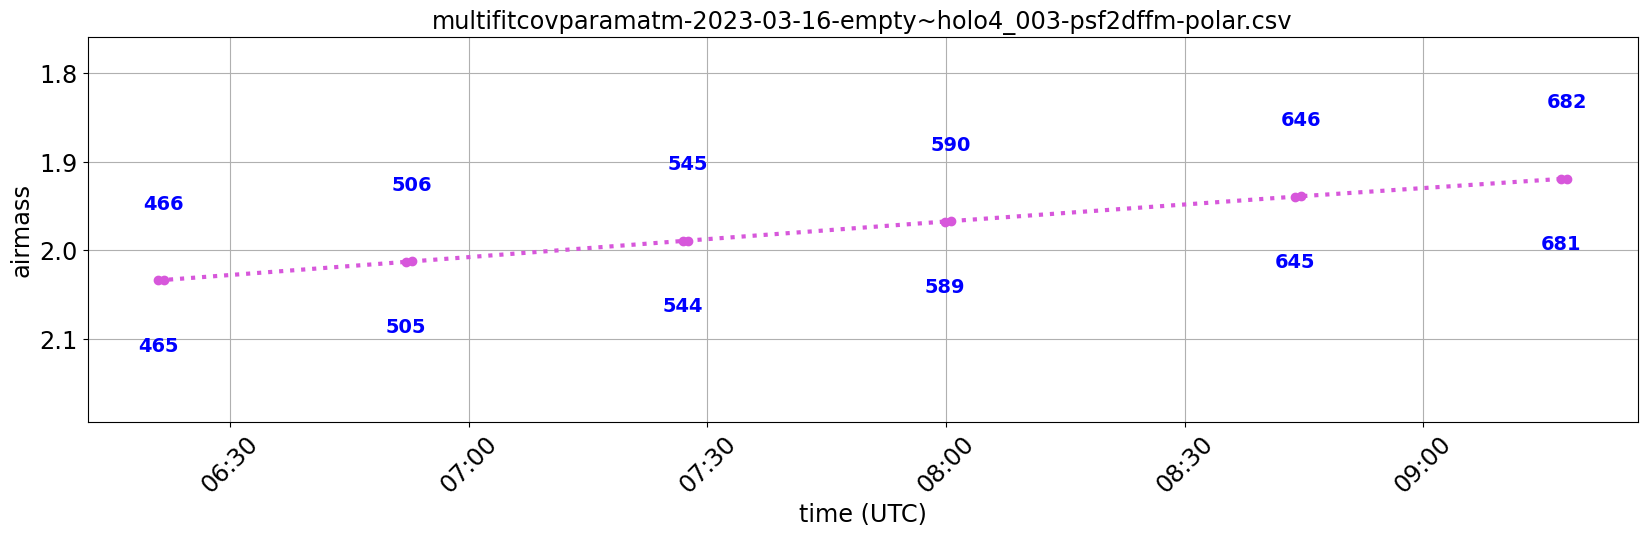

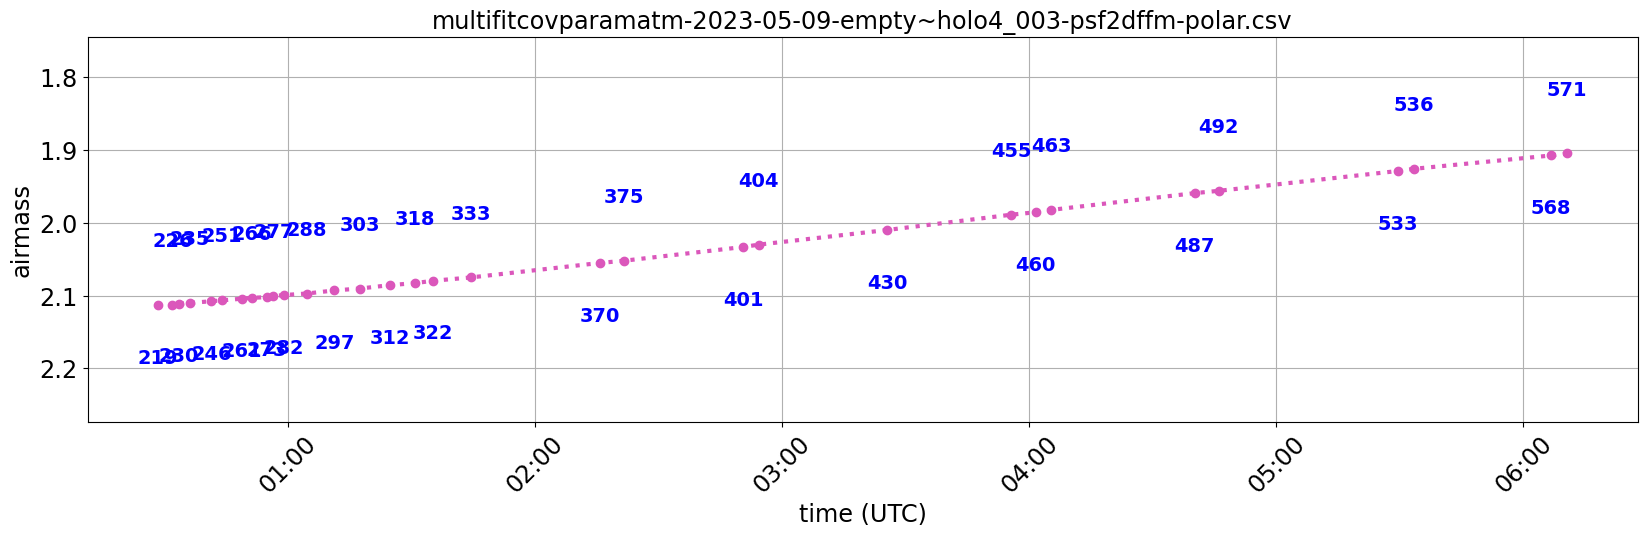

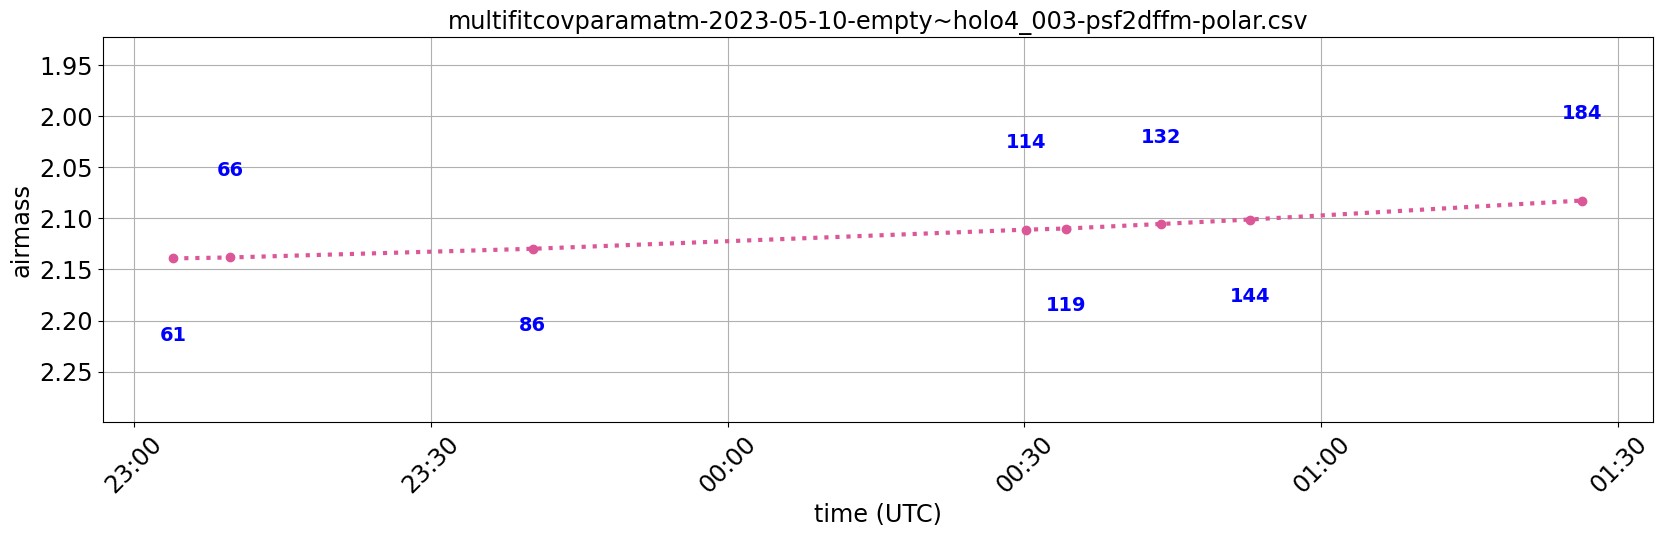

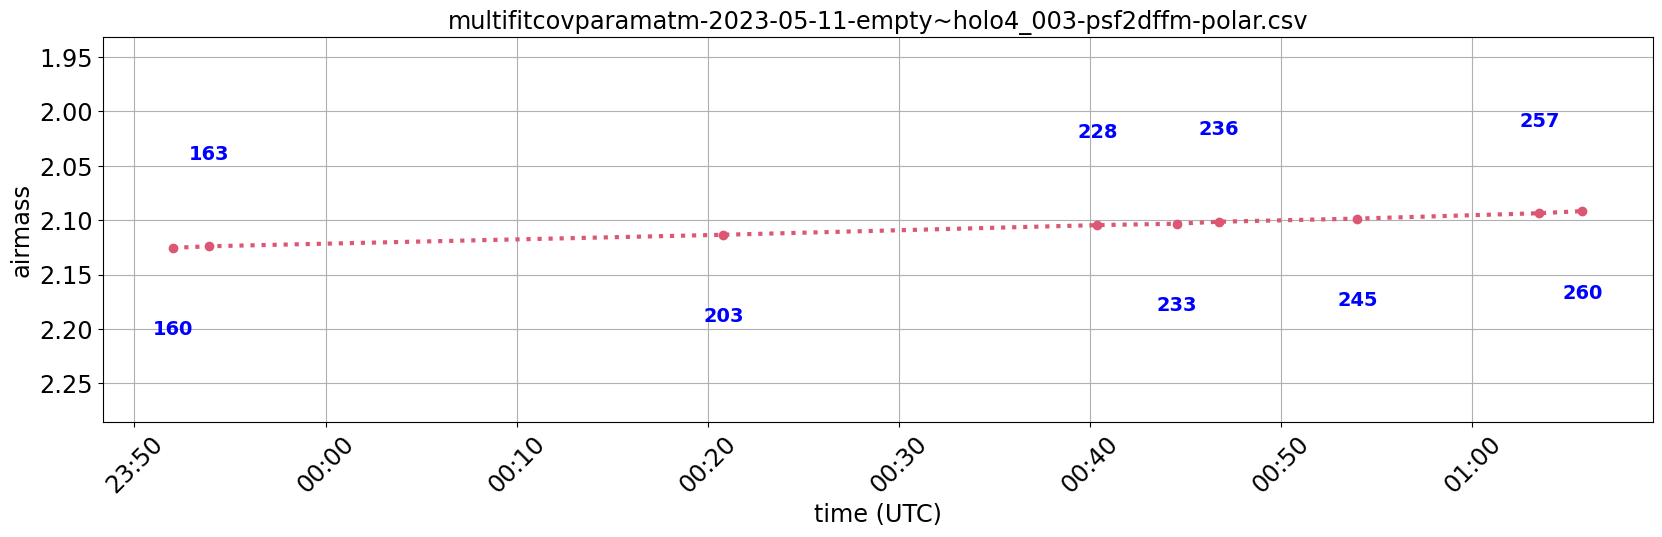

In [32]:
for idx,infos in enumerate(all_df):
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['spec_date_obs'] ]
    numbers = infos['number'].values
    airmasses = infos['spec_airmass'].values
    
    N= len(numbers)
    
    if N>0:
  
        # Create rectangle x coordinates
        startTime = all_datetime[0]
        endTime =  all_datetime[-1]

        # convert to matplotlib date representation
        start = mdates.date2num(startTime)
        end = mdates.date2num(endTime)
        width = end - start


        fig=plt.figure(figsize=(20,5))
    
        ax=fig.add_subplot(111)
        myFmt = mdates.DateFormatter('%H:%M')
        ax.xaxis.set_major_formatter(myFmt)

    

        y_shift= 0.08

  
        ax.plot(all_datetime,airmasses,'r:o',color=hls_colors[idx],lw=3)
        ax.xaxis.set_major_formatter(myFmt)
        ax.xaxis.set_tick_params(rotation=45)
        ax.set_xlabel("time (UTC)")
        ax.set_ylabel("airmass")
        ax.set_ylim(airmasses.min()-2*y_shift,airmasses.max()+2*y_shift)
        # Plot rectangle
        #rect = plt.Rectangle((start, airmasses.min()-2*y_shift), width, airmasses.max()+ 2*y_shift, color='grey',alpha=0.3)
        #ax2.add_patch(rect)   
        ax.invert_yaxis()
        ax.grid()


        for index in range(N):
            textstr= str(numbers[index])
            if index%2 == 0:
                dy = y_shift
            else:
                dy = -y_shift
            
            ax.text(all_datetime[index], airmasses[index] + dy , textstr,fontsize=14,fontweight="bold",ha='center',color="b" )
    
        ax.set_title(filenames[idx])
    
    plt.show()
    
    

# Function to find pairs

In [33]:
def FindPairs(df):
    all_datetime = [ Time(str_time).to_datetime() for str_time in df['spec_date_obs'] ]
    nn=len(all_datetime)
    difftimes = [ (all_datetime[n+1]-all_datetime[n]).seconds for n in range(nn-1) ]
    print(difftimes)
    all_pairs = []
    
    for idx,difft in   enumerate(difftimes):
        if difft<60:
            all_pairs.append(idx)
    return all_pairs

## Precipitable water vapor

### Plot all PWV in different figures

In [34]:
hls_colors = sns.color_palette("hls", NF)

In [35]:
df.columns

Index(['index', 'exposure', 'spec_date_obs', 'spec_target_label',
       'spec_filter_label', 'spec_airmass', 'spec_pressure',
       'spec_temperature', 'spec_humidity', 'spec_hour_angle',
       'spec_parallactic_angle', 'spec_camera_angle', 'spec_order',
       'spec_header_target', 'spec_header_redshift', 'spec_header_grating',
       'spec_header_rotangle', 'spec_header_d2ccd', 'spec_header_lshift',
       'spec_header_parangle', 'spec_header_targetx', 'spec_header_targety',
       'spec_header_lbda_ref', 'spec_header_pixshift', 'spec_header_psf_reg',
       'spec_header_trace_r', 'spec_header_chi2_fit', 'spec_header_a2_fit',
       'spec_header_am_fit', 'spec_header_meanfwhm', 'spec_header_version',
       'spec_header_rebin', 'spec_header_date-obs', 'spec_header_exptime',
       'spec_header_airmass', 'spec_header_dec', 'spec_header_ha',
       'spec_header_outtemp', 'spec_header_outpress', 'spec_header_outhum',
       'spec_header_filter', 'spec_header_cam_rot', 'spec_header_s_

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_80396/2605163376.py:43: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel")


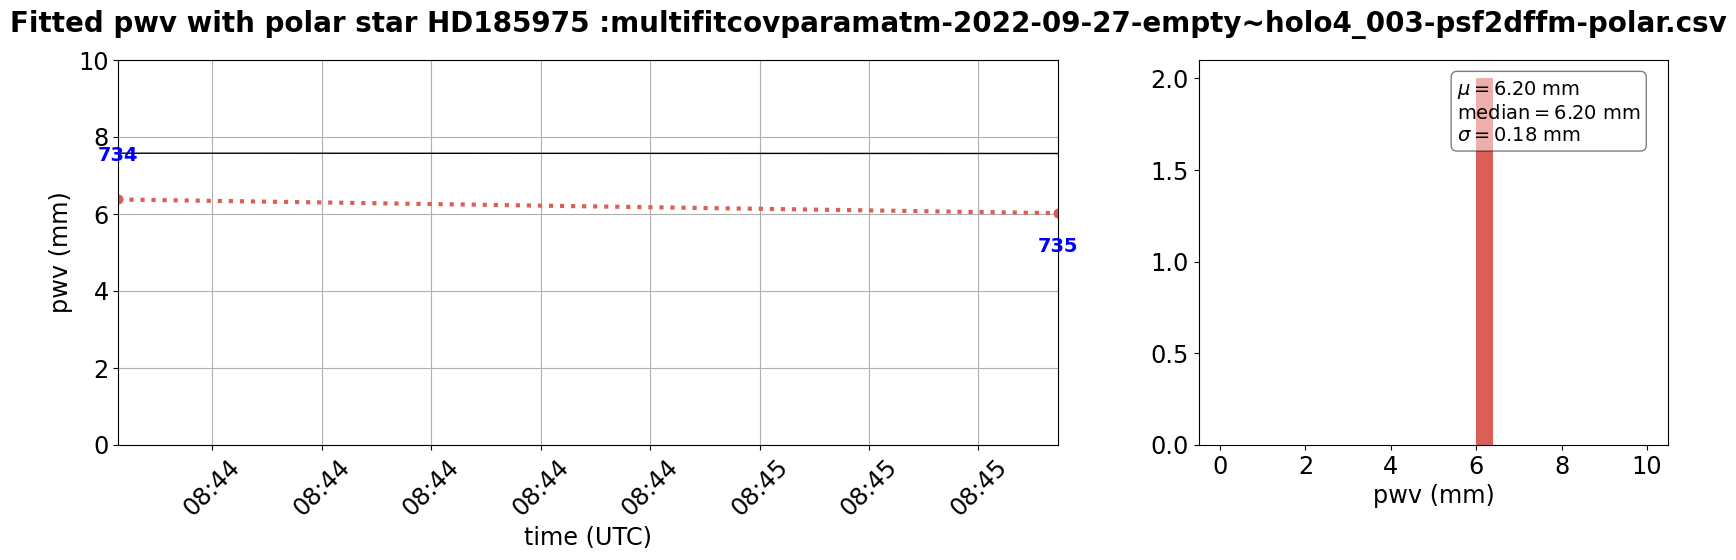

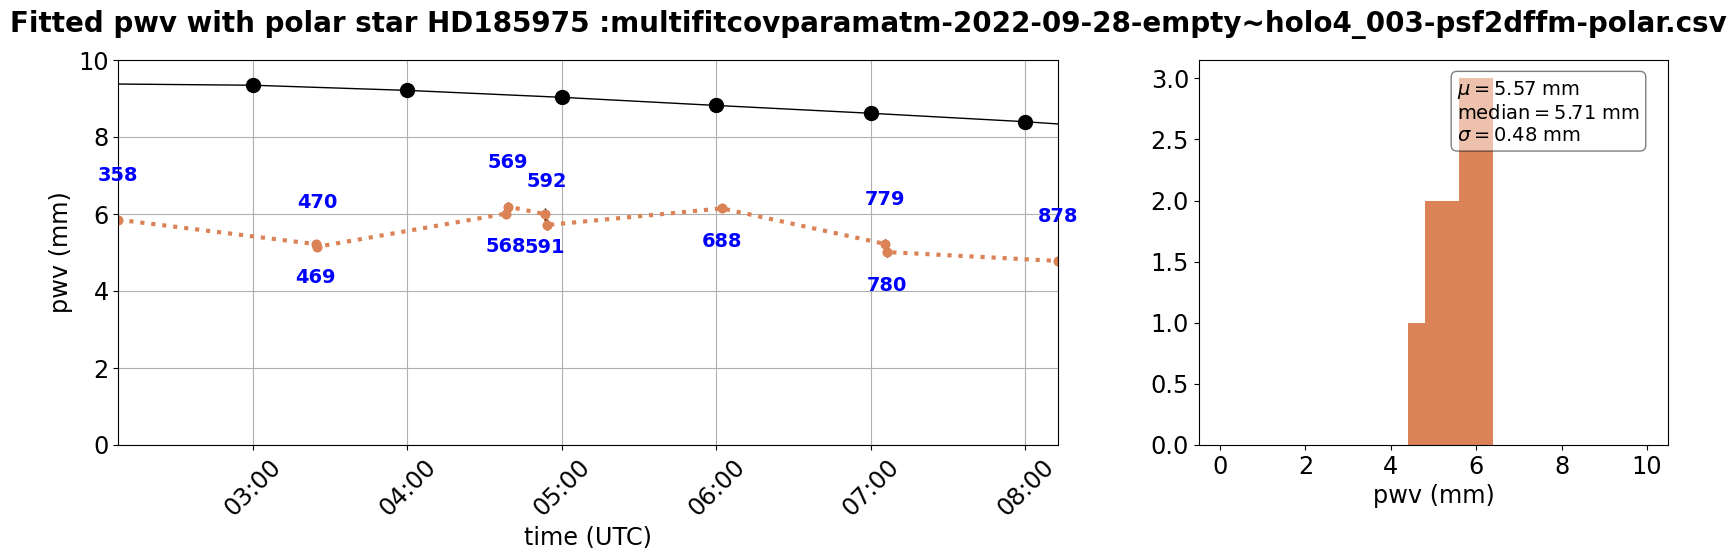

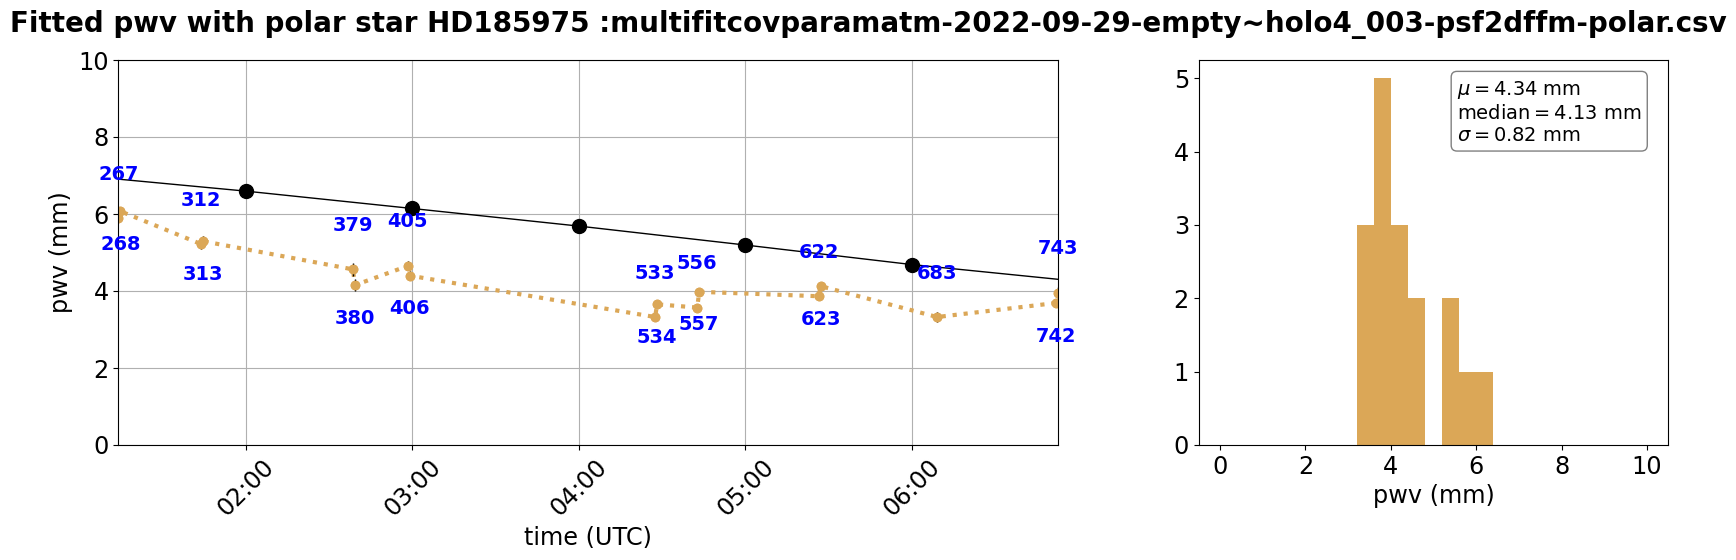

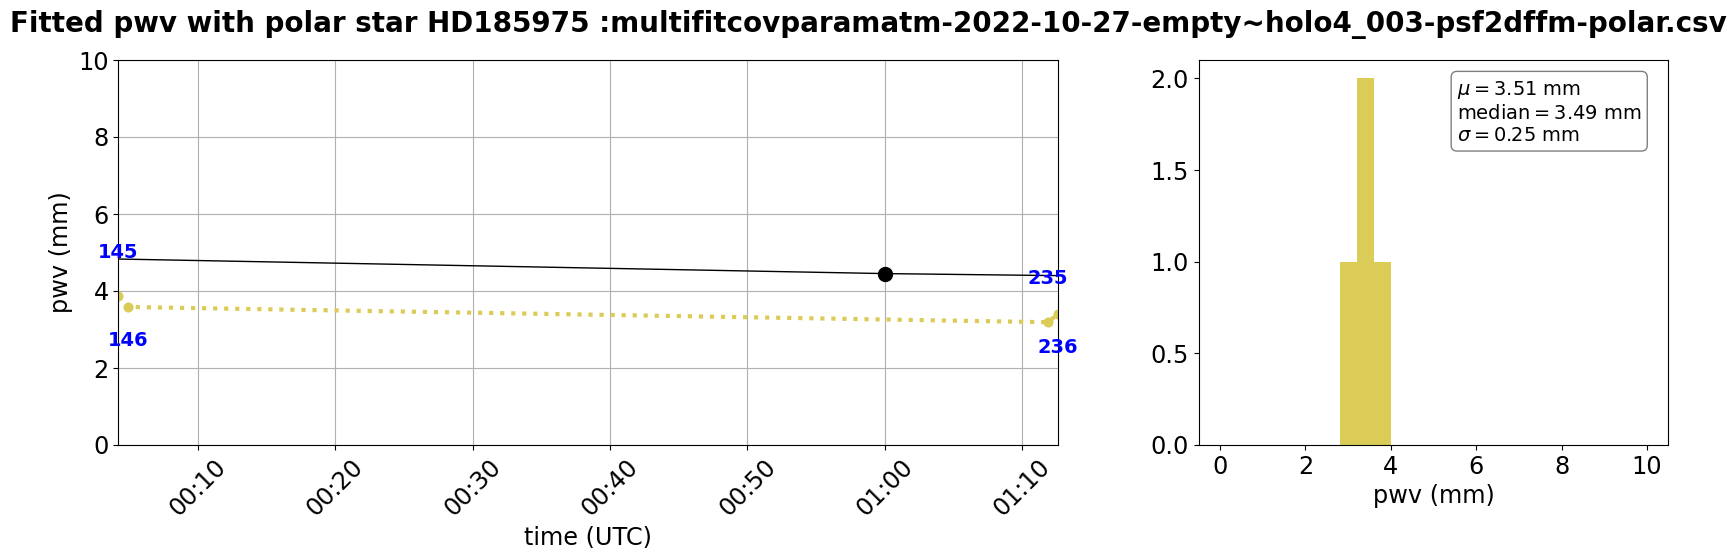

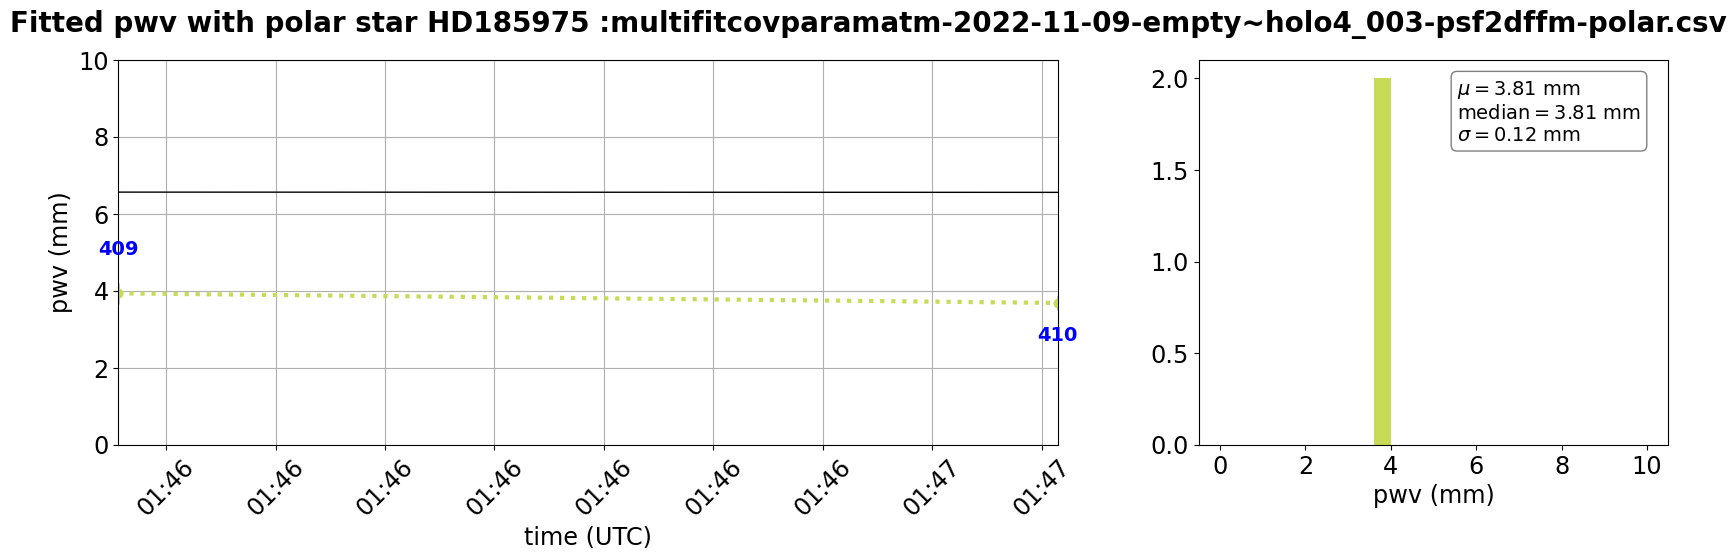

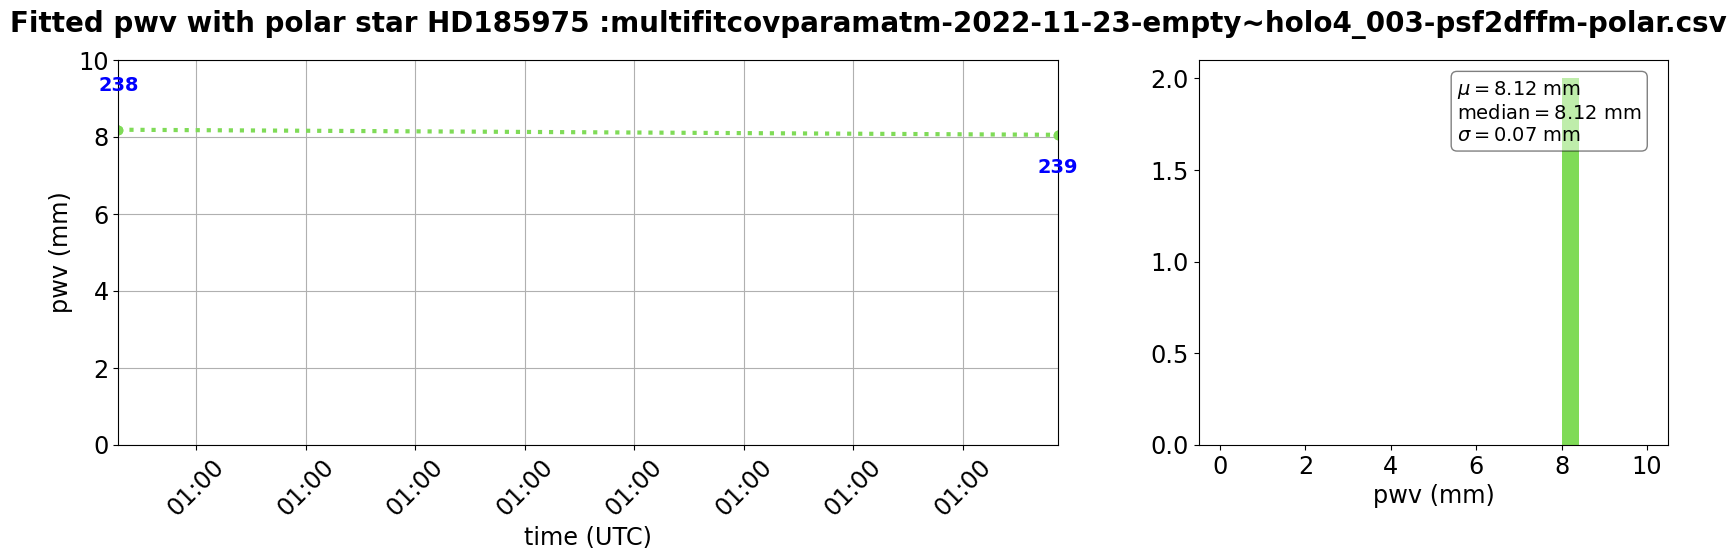

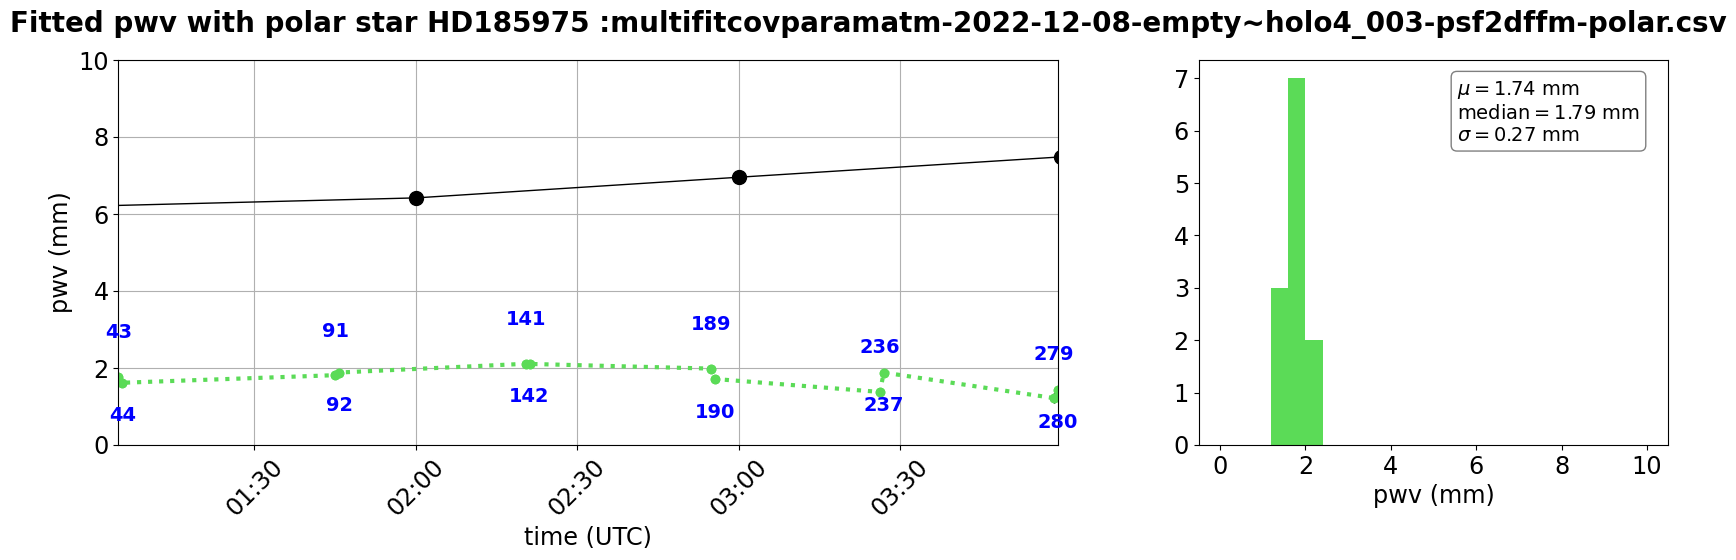

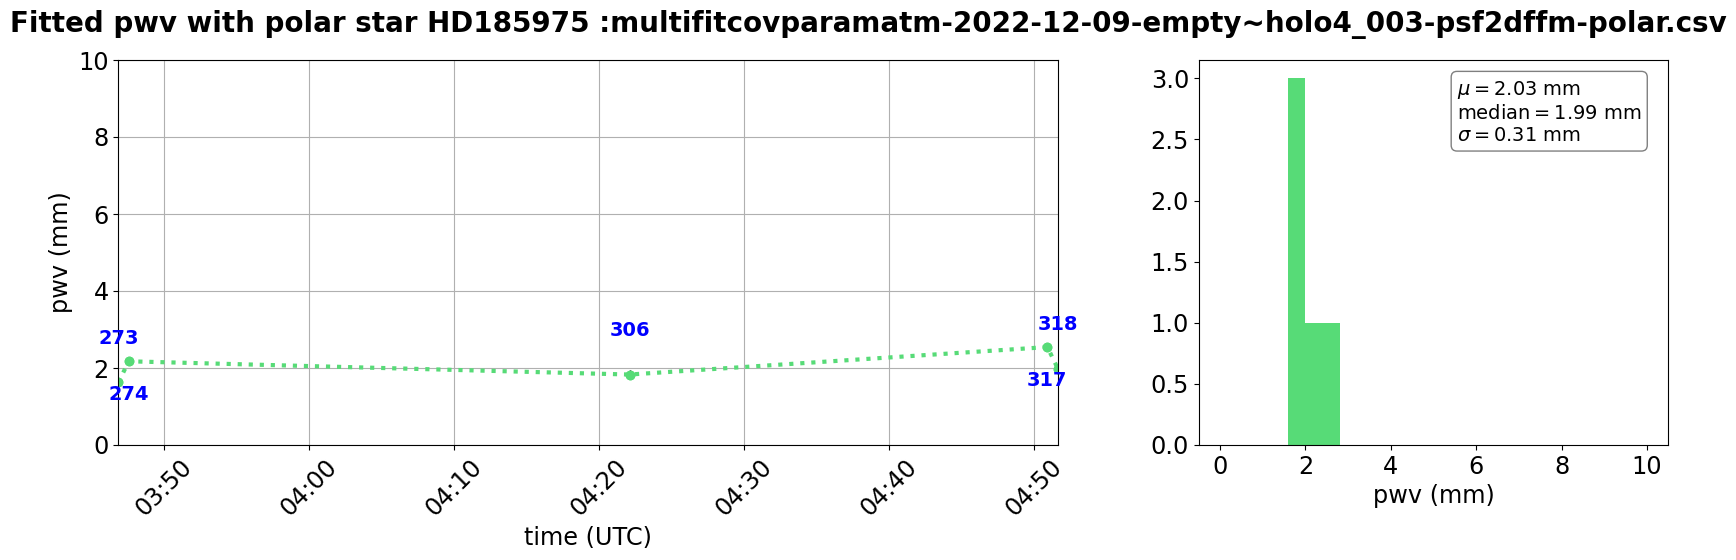

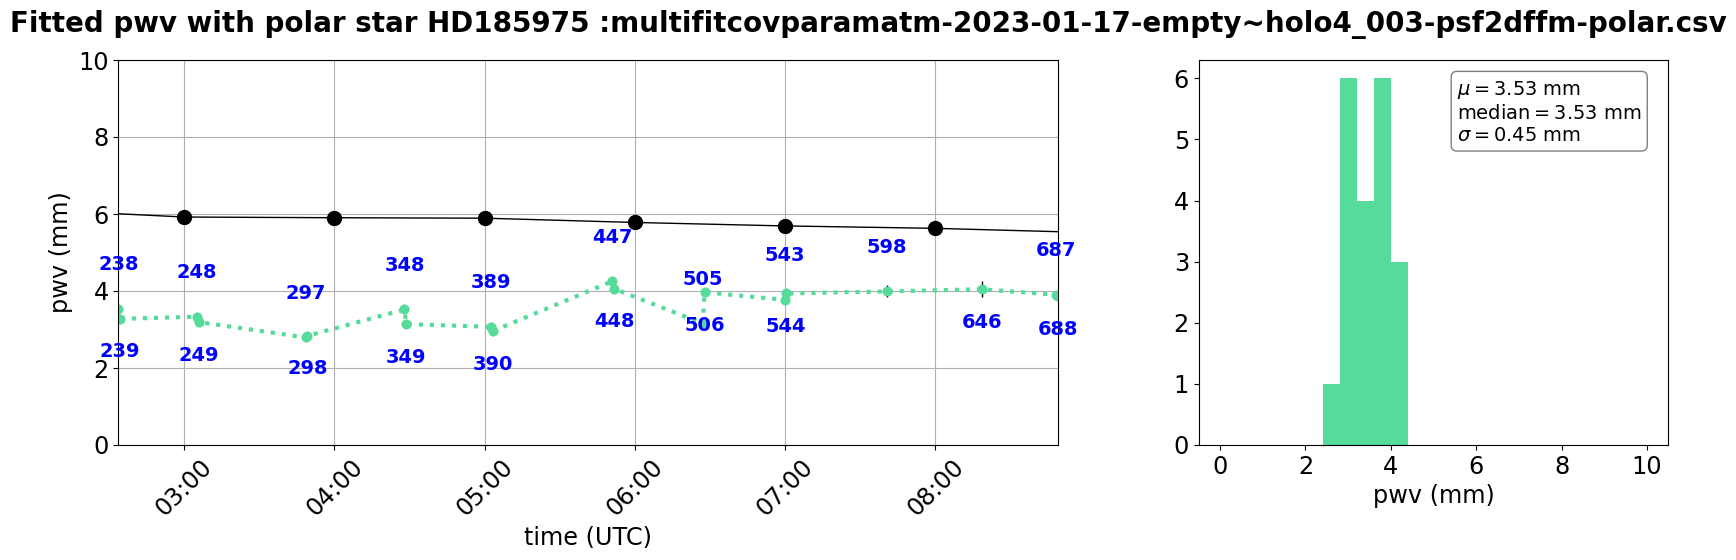

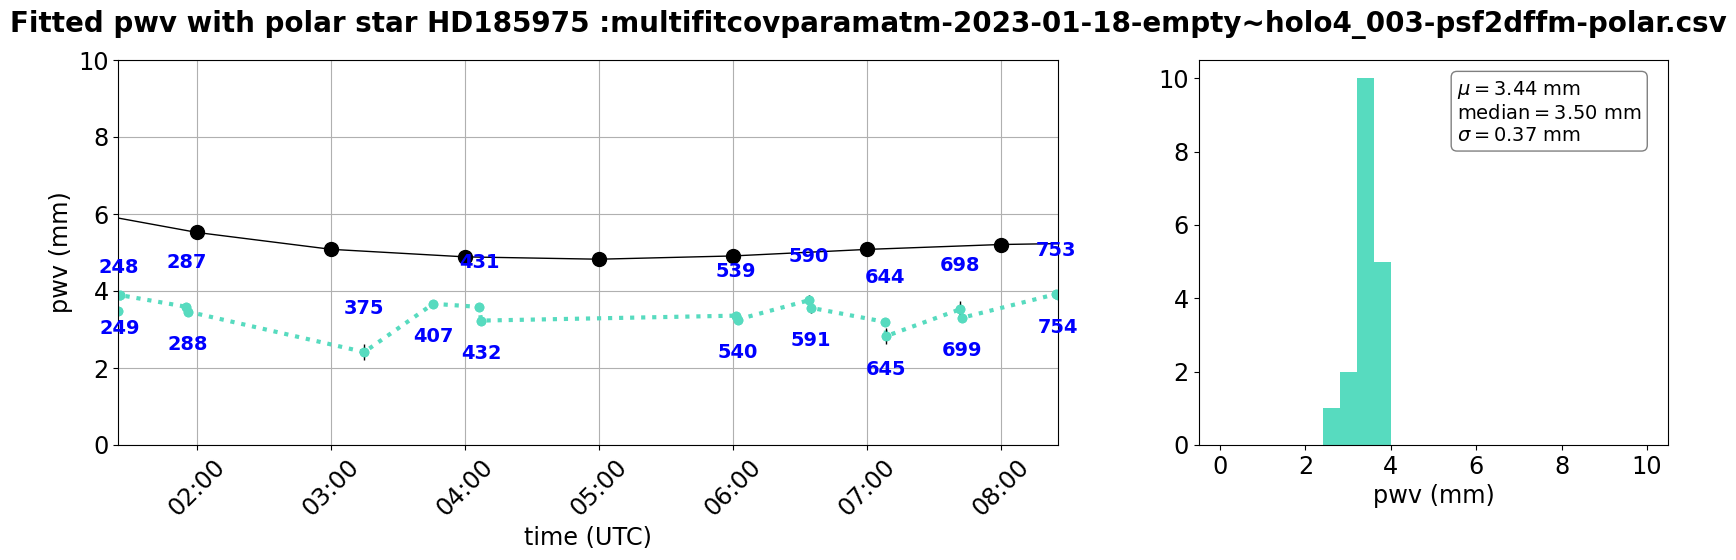

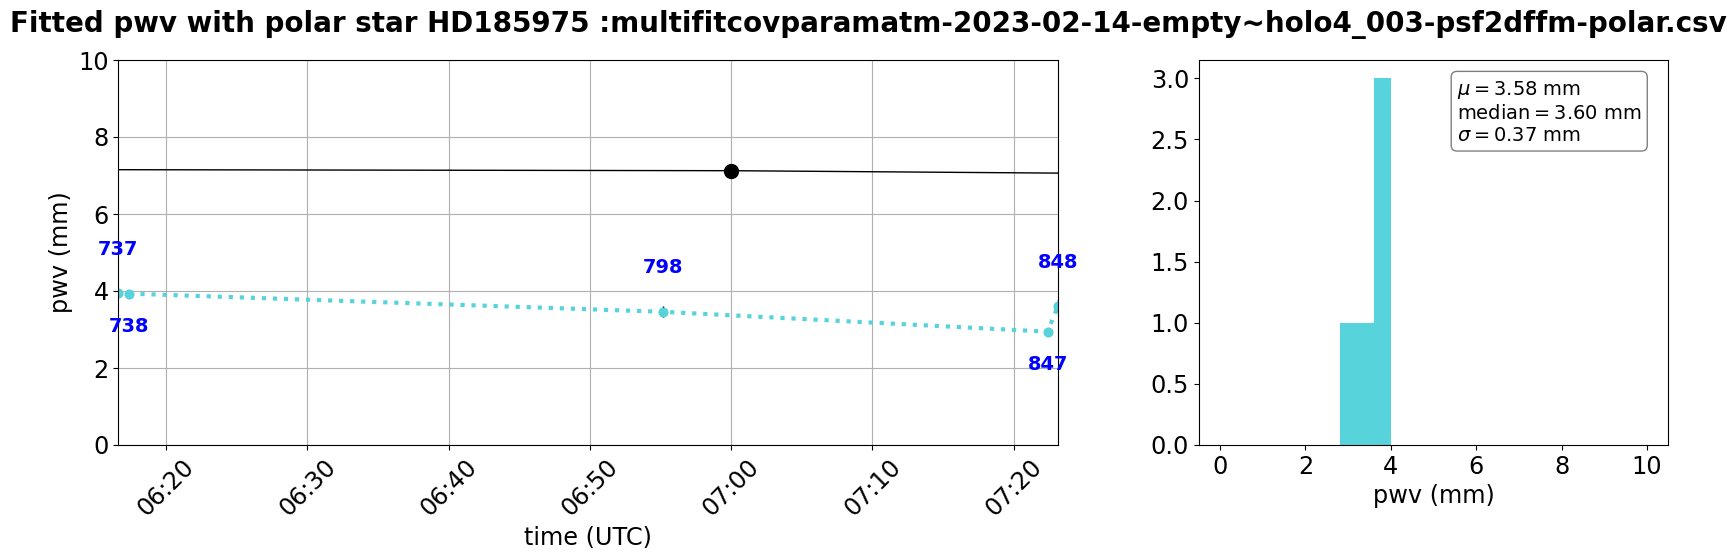

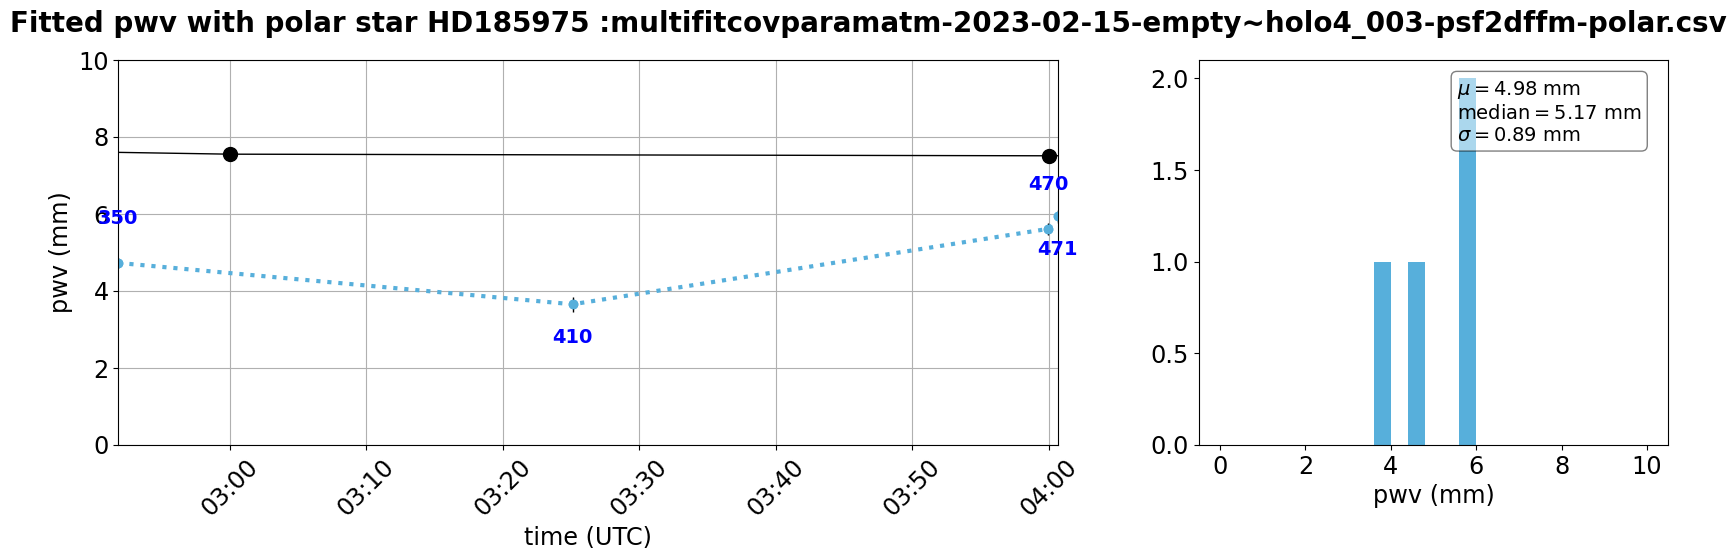

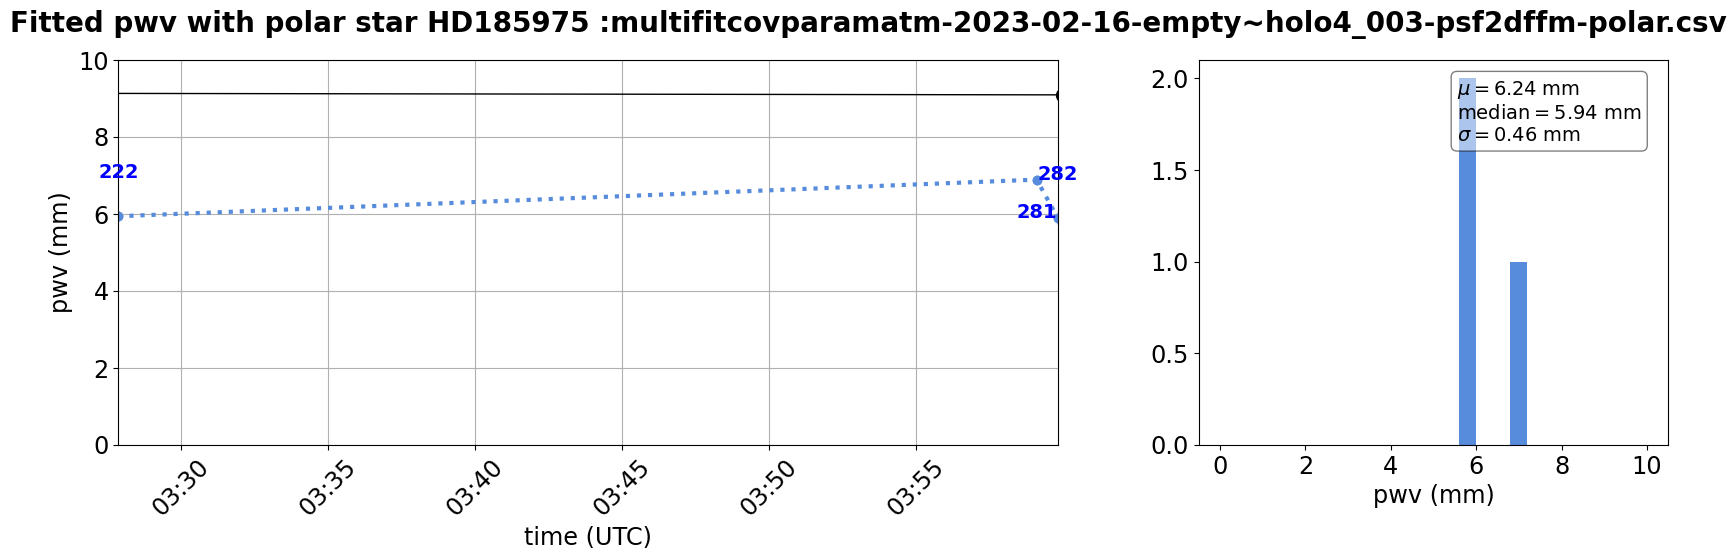

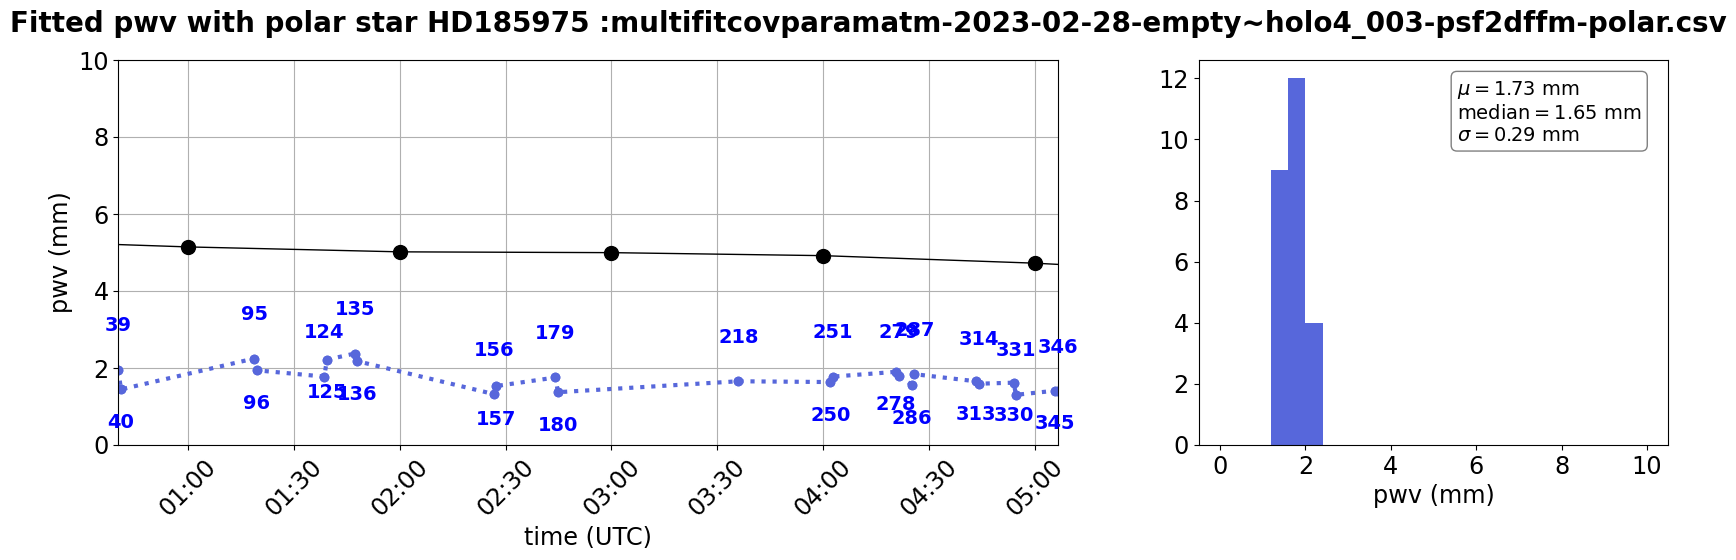

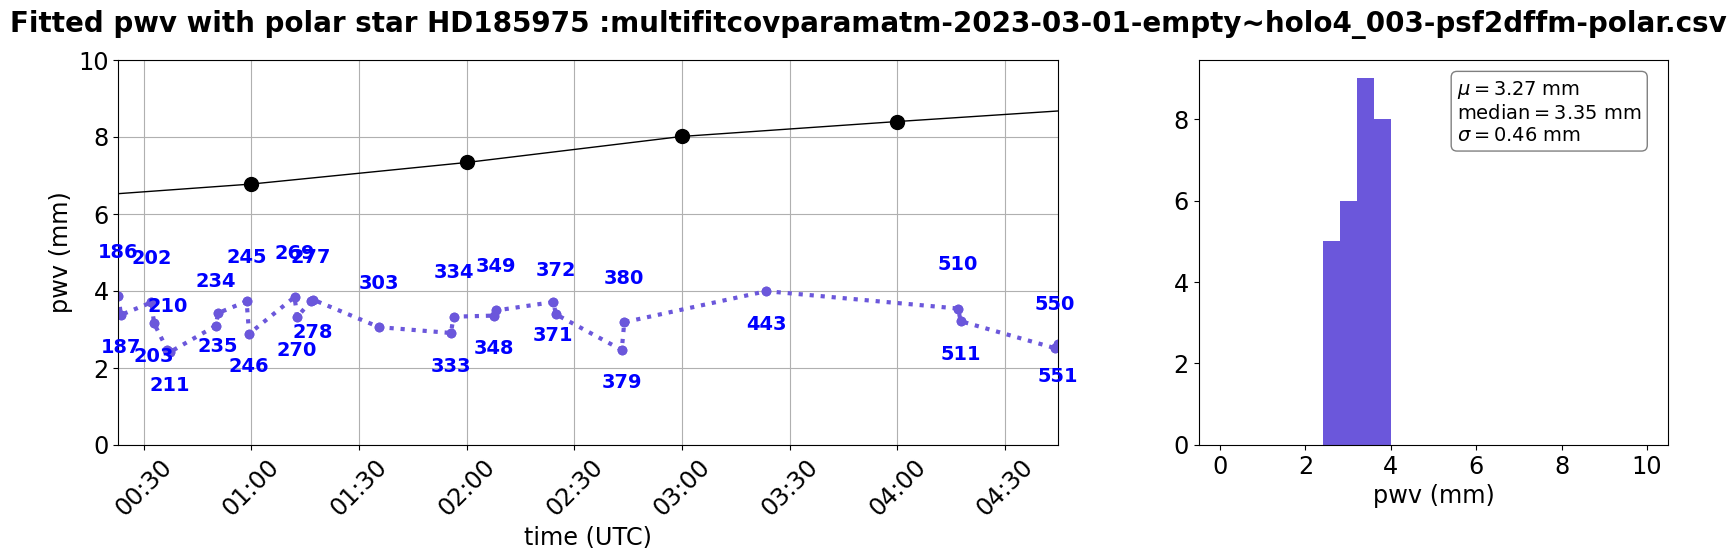

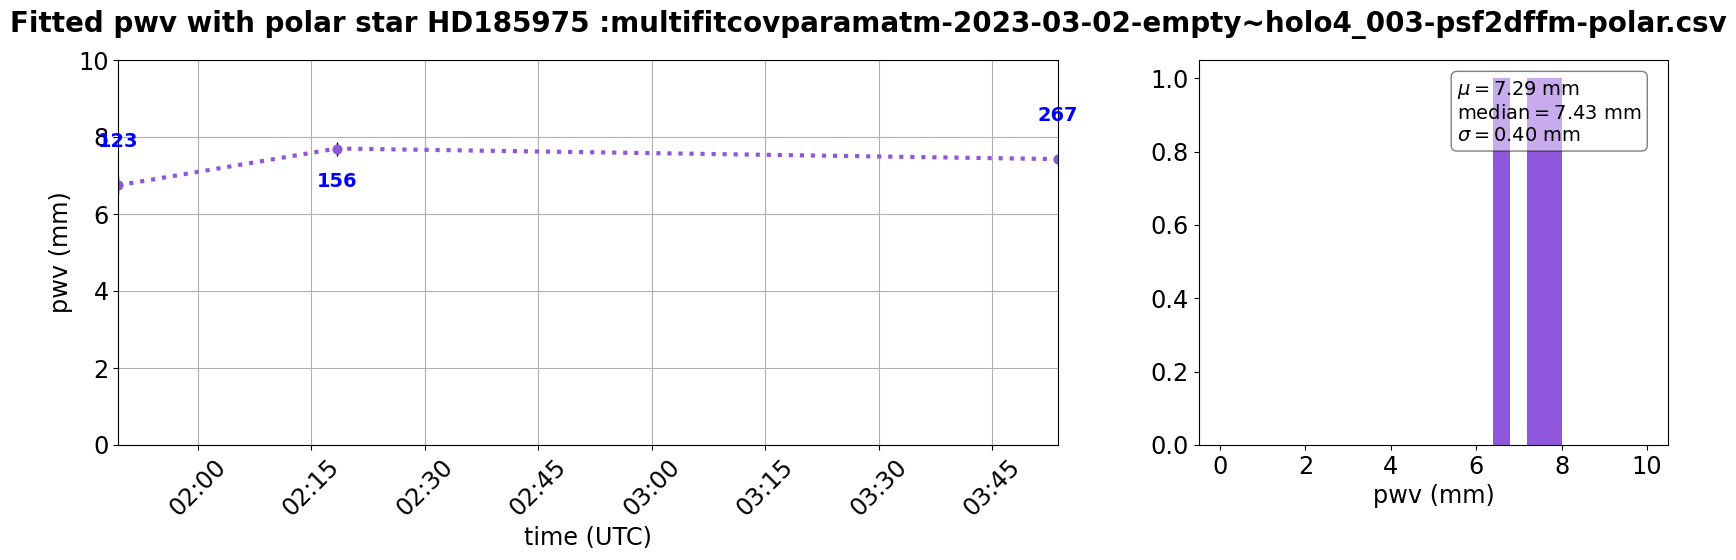

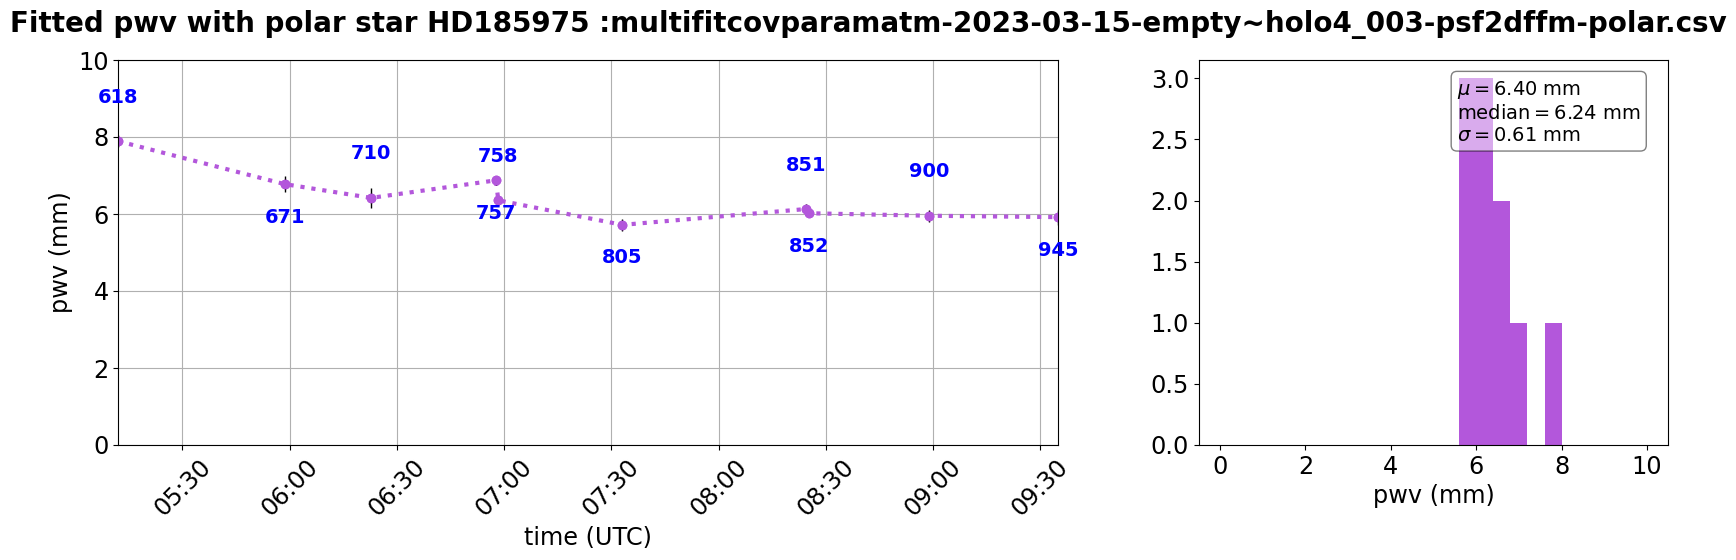

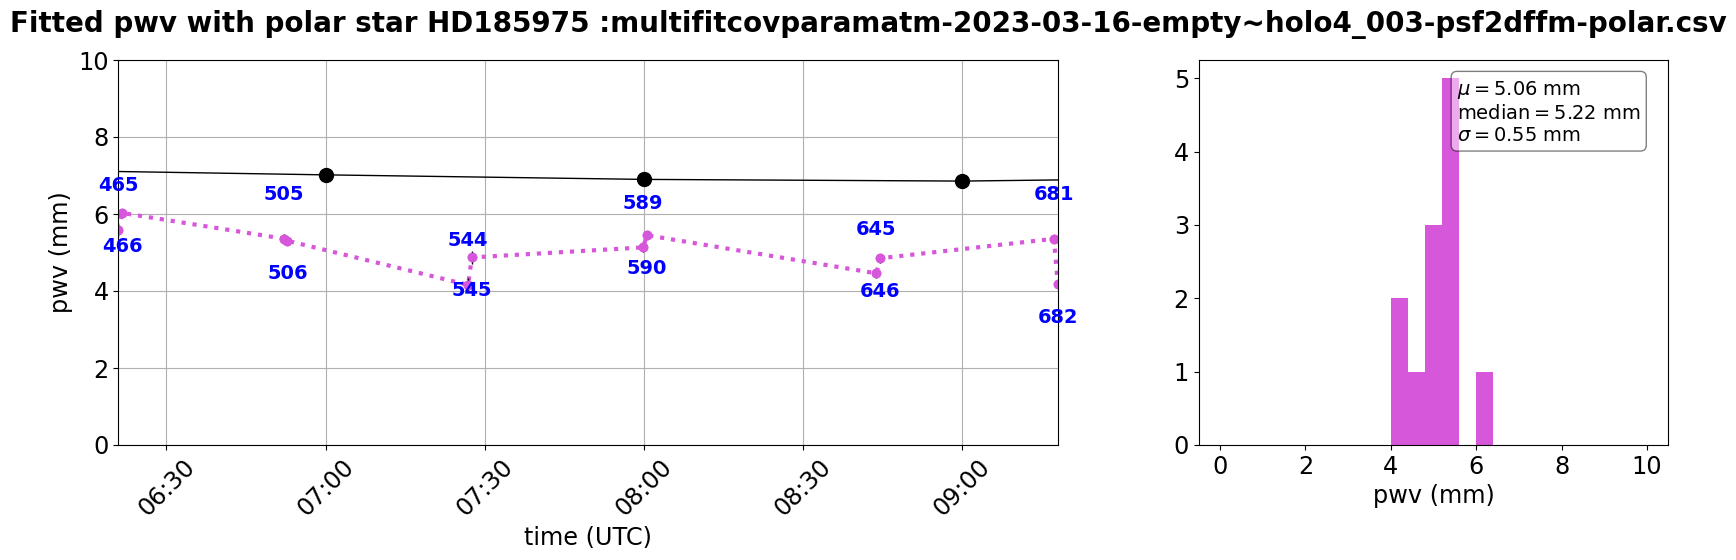

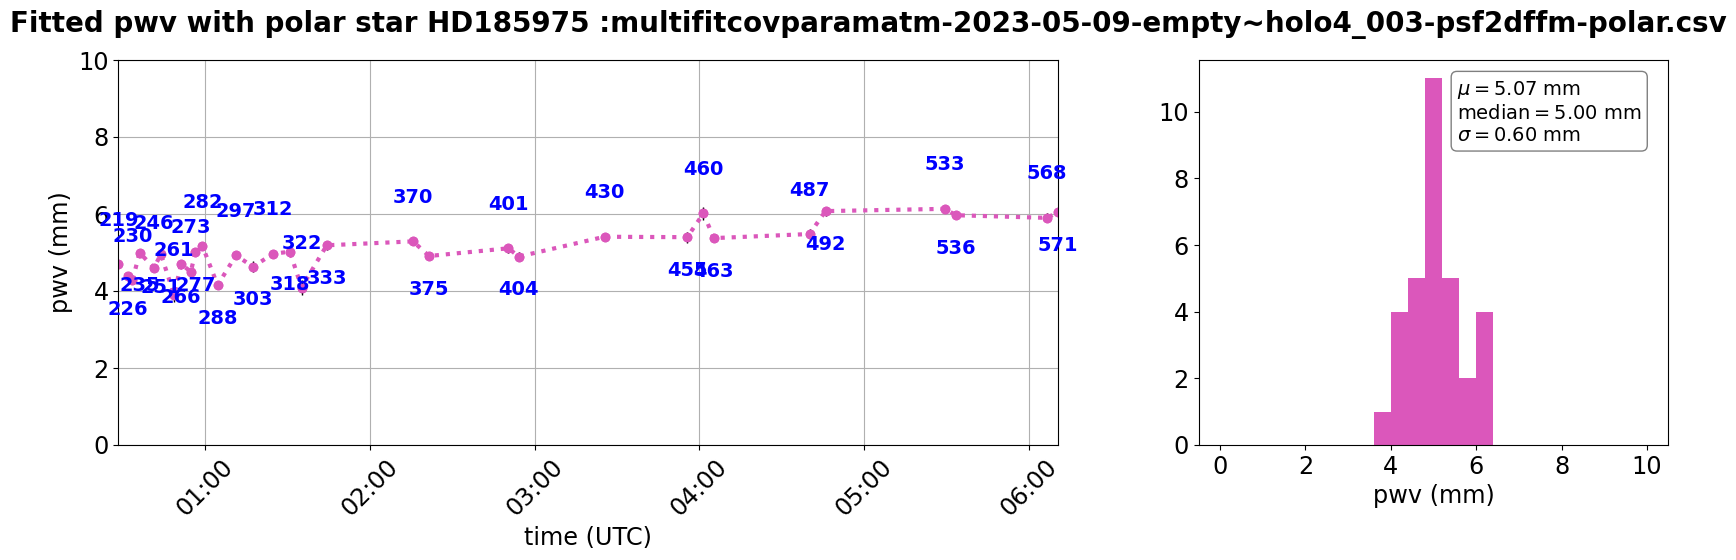

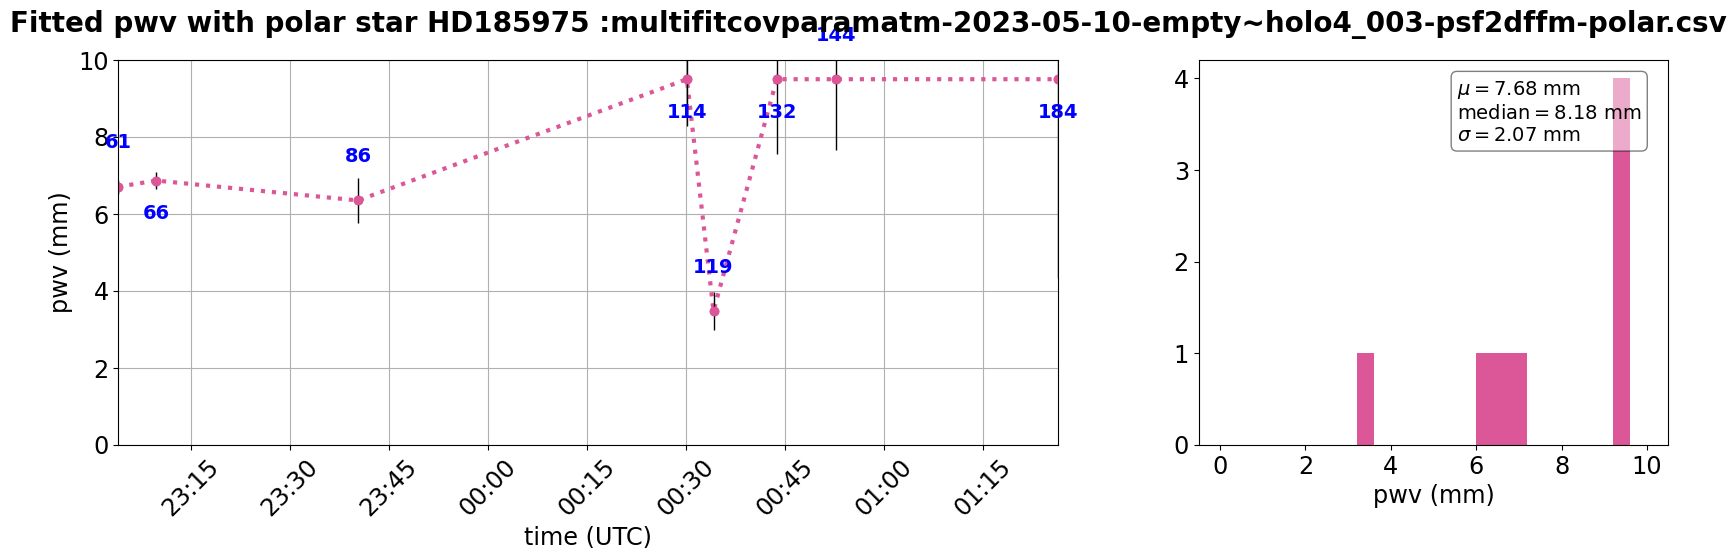

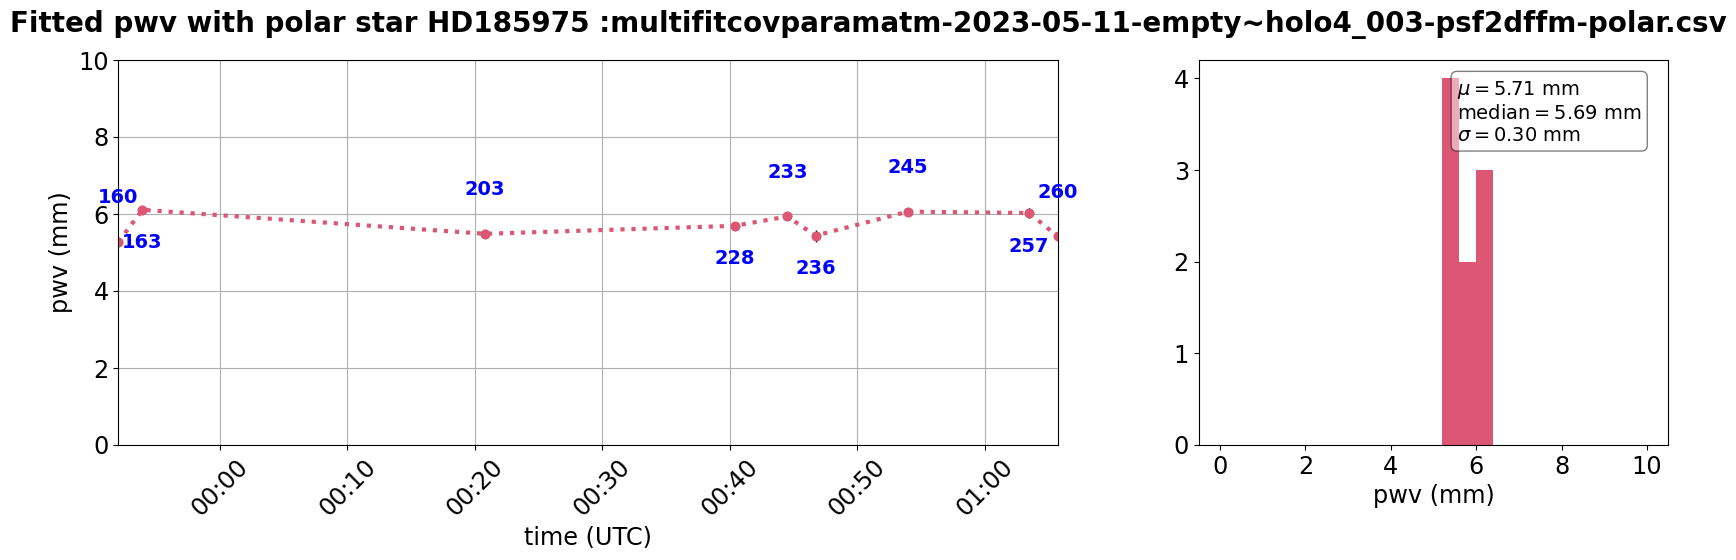

In [36]:
for idx,infos in enumerate(all_df):
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['spec_date_obs'] ]
    numbers = infos['number'].values
    
    #pwv= infos['pwv_avg'].values
    #epwv= infos['pwv_sig'].values
    
    pwv= infos['pwv_1'].values
    epwv= infos['epwv_1'].values
    

    N= len(numbers)
    if N<1:
        continue
  
        

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]
    
    

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start



    fig=plt.figure(figsize=(20,5))
    gs = gridspec.GridSpec(1, 2,width_ratios=[3,1.5],figure=fig)
    
    ax= fig.add_subplot(gs[0,0])
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 

    y_shift= 1

  
    ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel")
    ax.errorbar(all_datetime,pwv,yerr=epwv,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1,label="merra2")
    
    ax.plot(all_merra2_datetime,pwv_merra2 ,'k-o',markersize=10,lw=1,label="RERRA2(2022)")
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("pwv (mm)")
    ax.set_ylim(pwv.min()-2*y_shift,pwv.max()+2*y_shift)
    ax.set_xlim(start,end)
    # Plot rectangle
    #rect = plt.Rectangle((start, airmasses.min()-2*y_shift), width, airmasses.max()+ 2*y_shift, color='grey',alpha=0.3)
    #ax2.add_patch(rect)   
    #ax.invert_yaxis()
    ax.grid()
    ax.set_ylim(0.,10.)


    for index in range(N):
        textstr= str(numbers[index])
        
        if index%2 == 0:
            dy = y_shift
        else:
            dy = -y_shift
            
        ax.text(all_datetime[index], pwv[index] + dy , textstr,fontsize=14,fontweight="bold",ha='center',color="b" )
    
    
    
    ax= fig.add_subplot(gs[0,1])
    ax.hist(pwv,bins=25,range=(0,10),facecolor=hls_colors[idx])
    ax.set_xlabel("pwv (mm)")
    
    mu = pwv.mean()
    median = np.median(pwv)
    sigma =pwv.std()
    
    textstr = '\n'.join((
    r'$\mu=%.2f$ mm' % (mu, ),
    r'$\mathrm{median}=%.2f$ mm' % (median, ),
    r'$\sigma=%.2f$ mm' % (sigma, )))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax.text(0.55, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

    
    
    
    if FLAG_SELECT_POLAR:
        the_title = "Fitted pwv with polar star HD185975 :" + filenames[idx]
    else:
        the_title = "Fitted pwv with all stars :" + filenames[idx]
    plt.suptitle(the_title,fontsize="20",fontweight="bold")
    plt.show()
    
    

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_80396/3019344616.py:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel " + tags[idx])


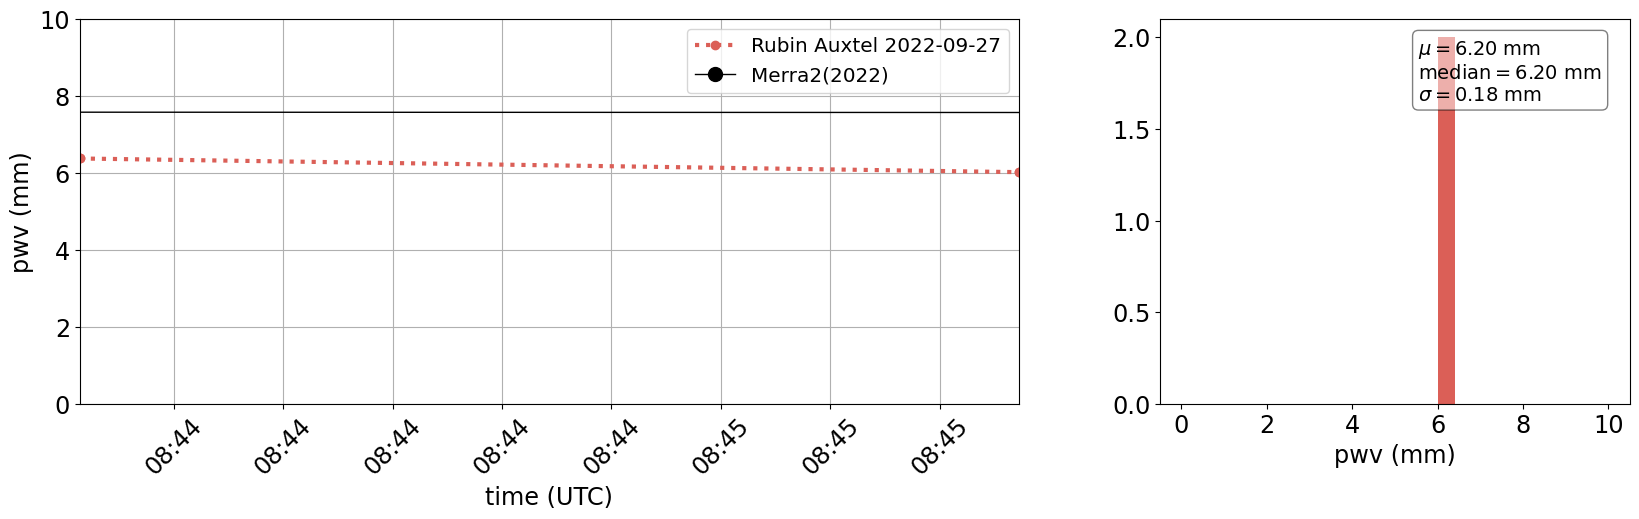

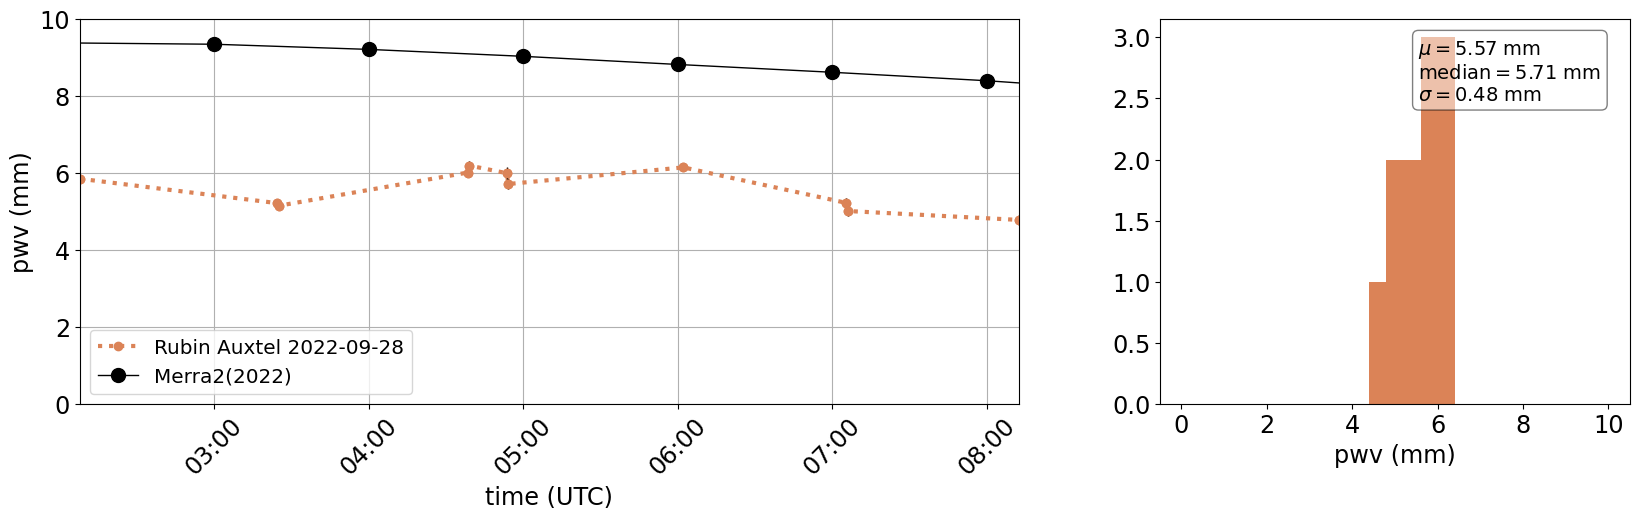

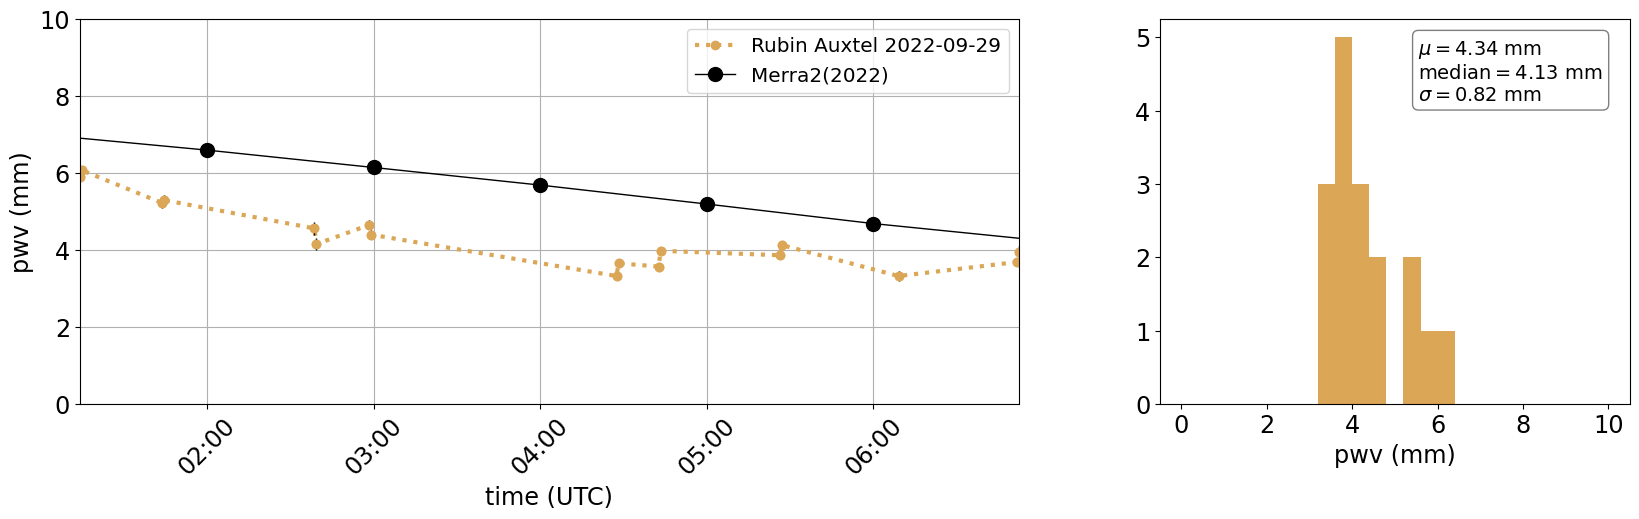

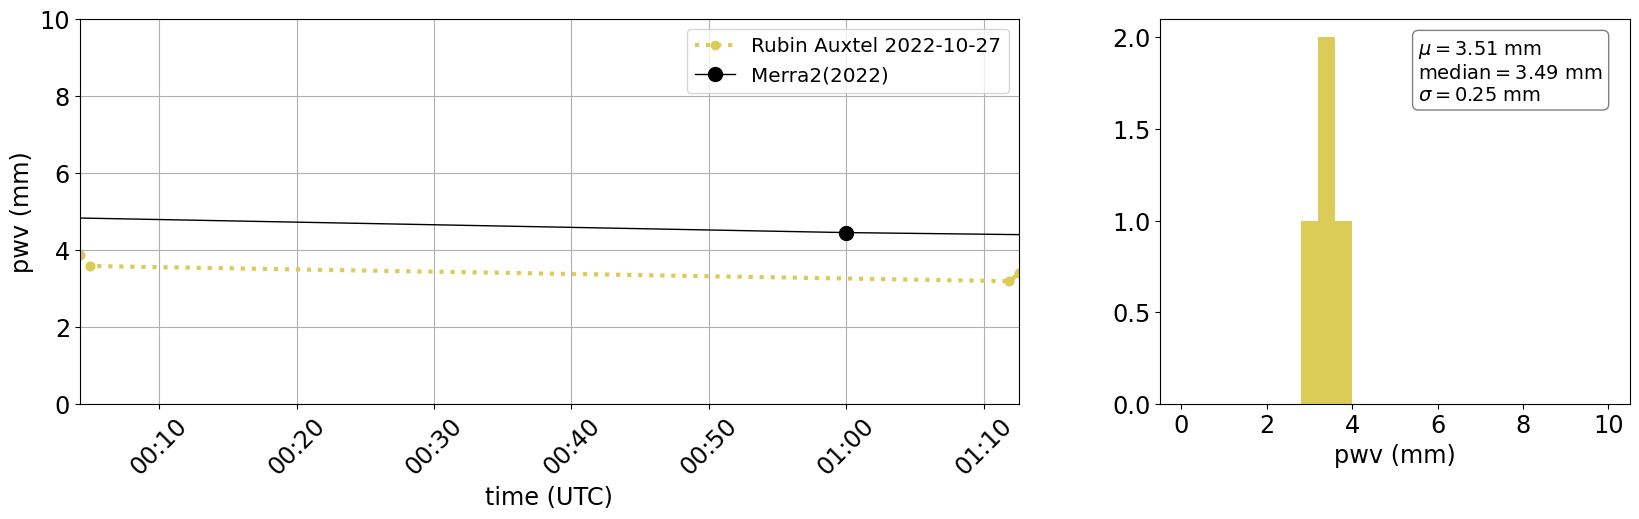

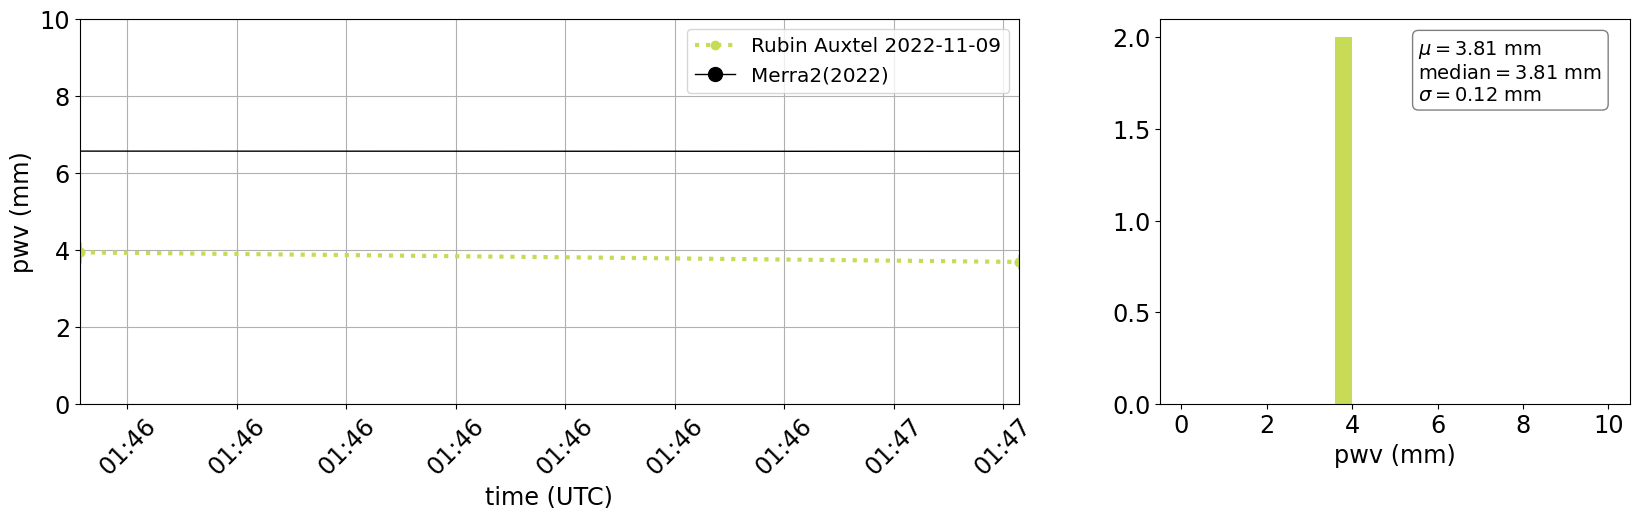

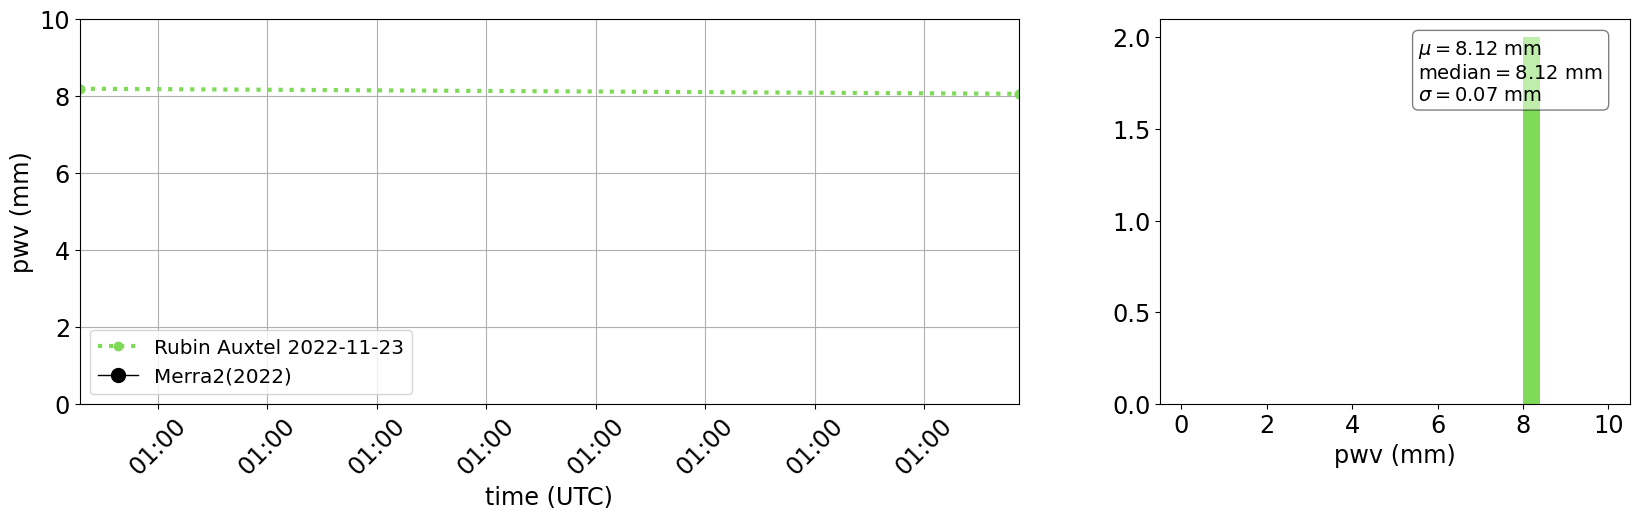

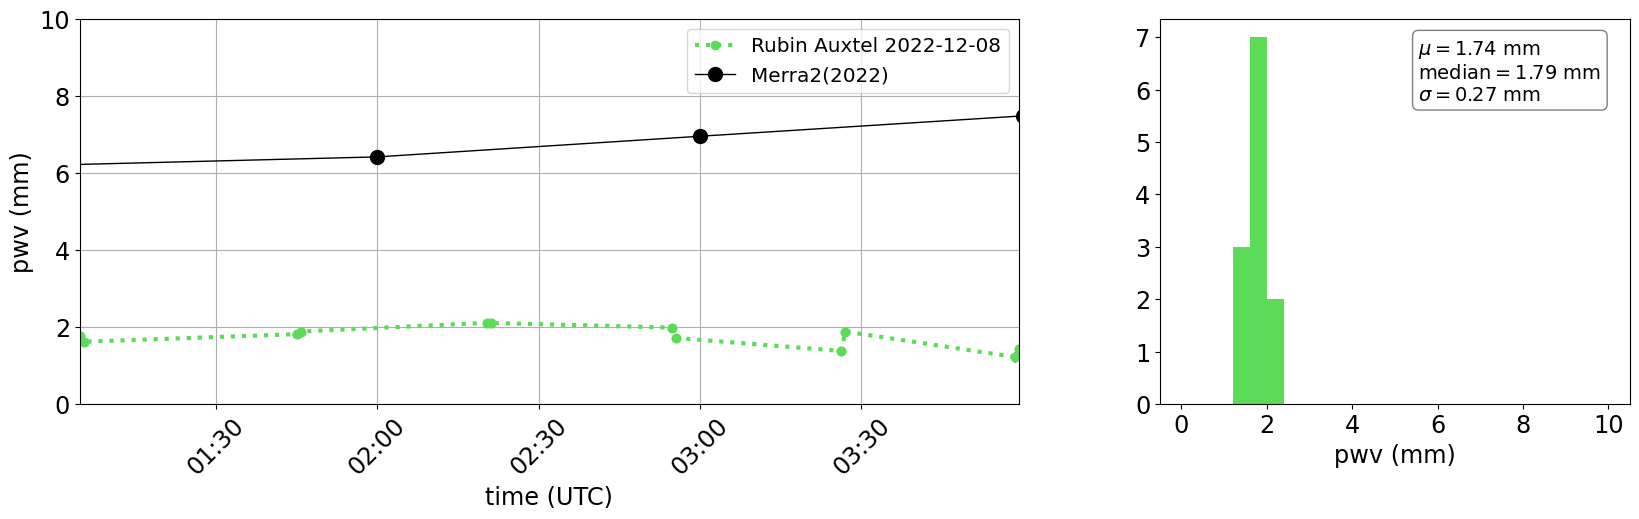

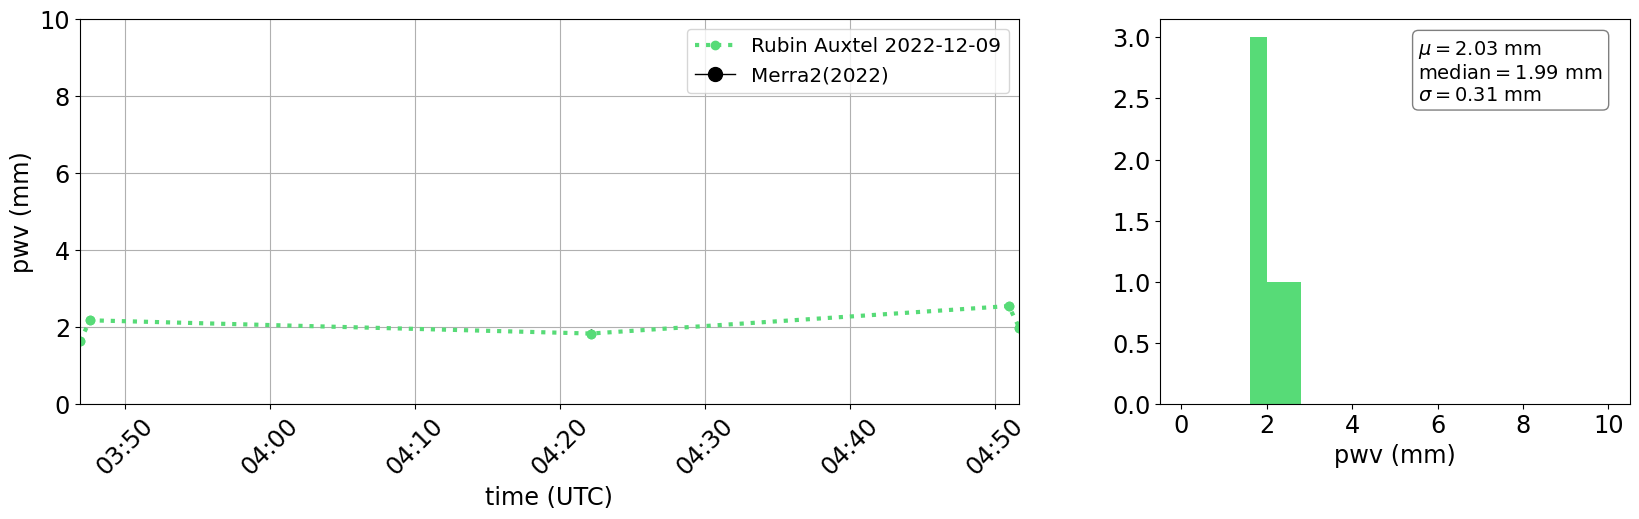

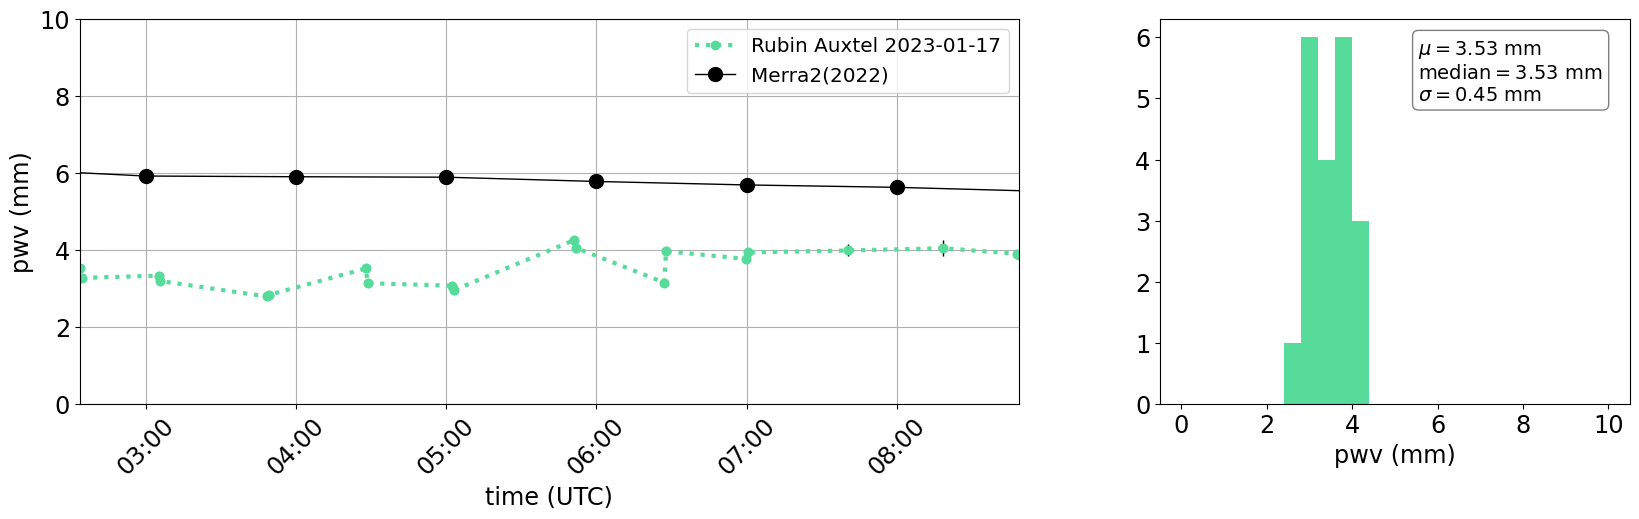

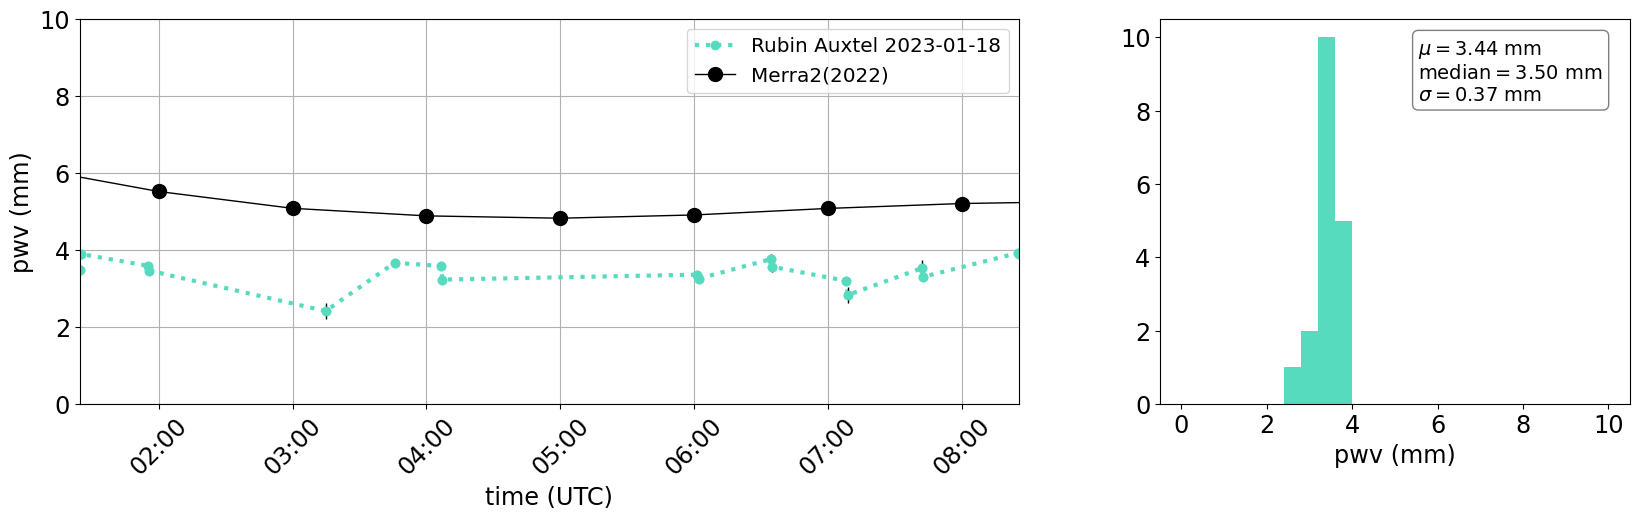

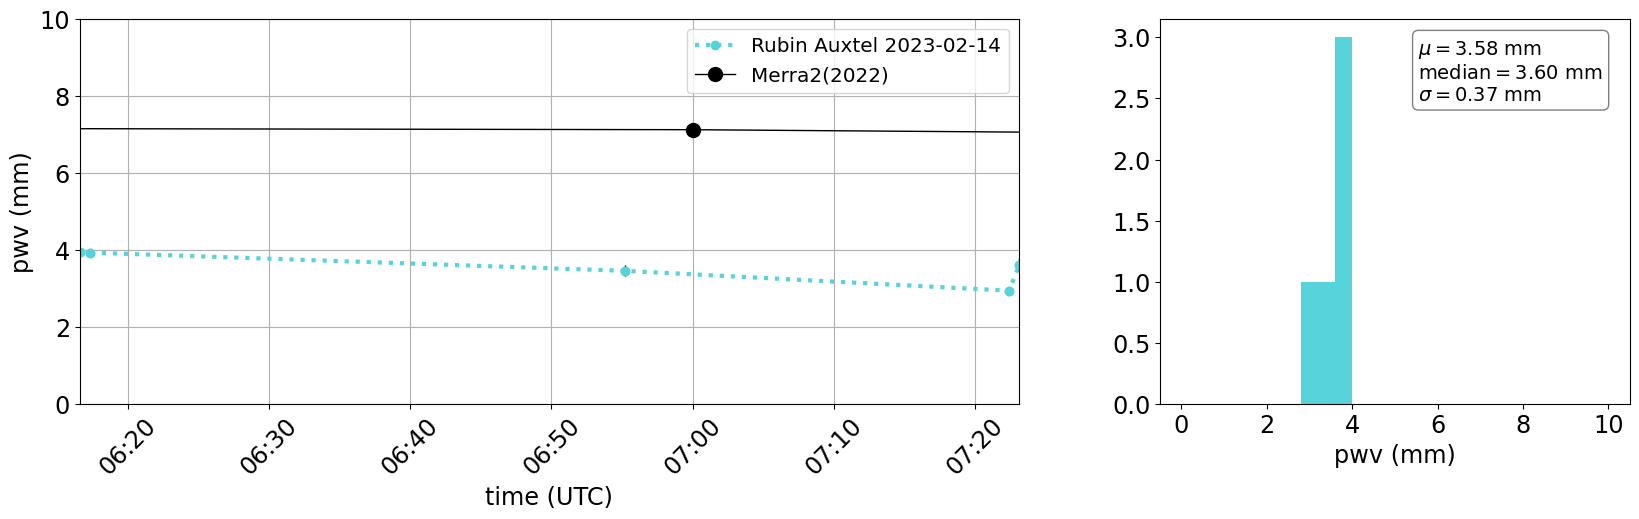

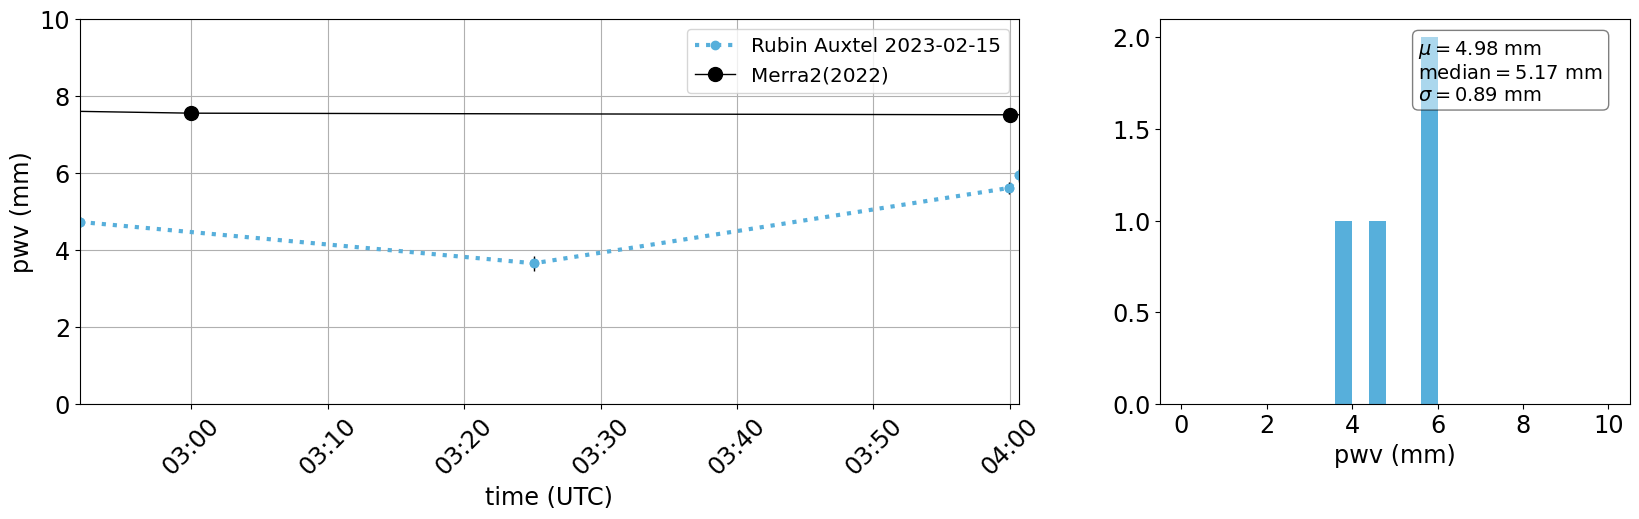

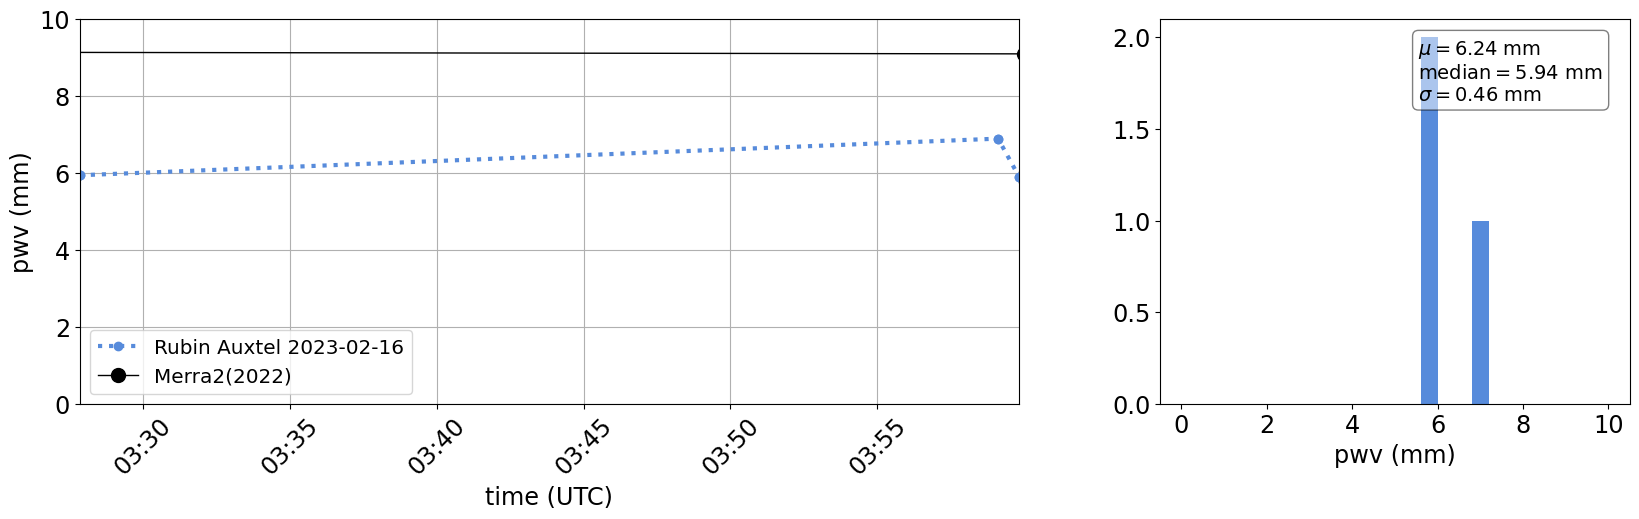

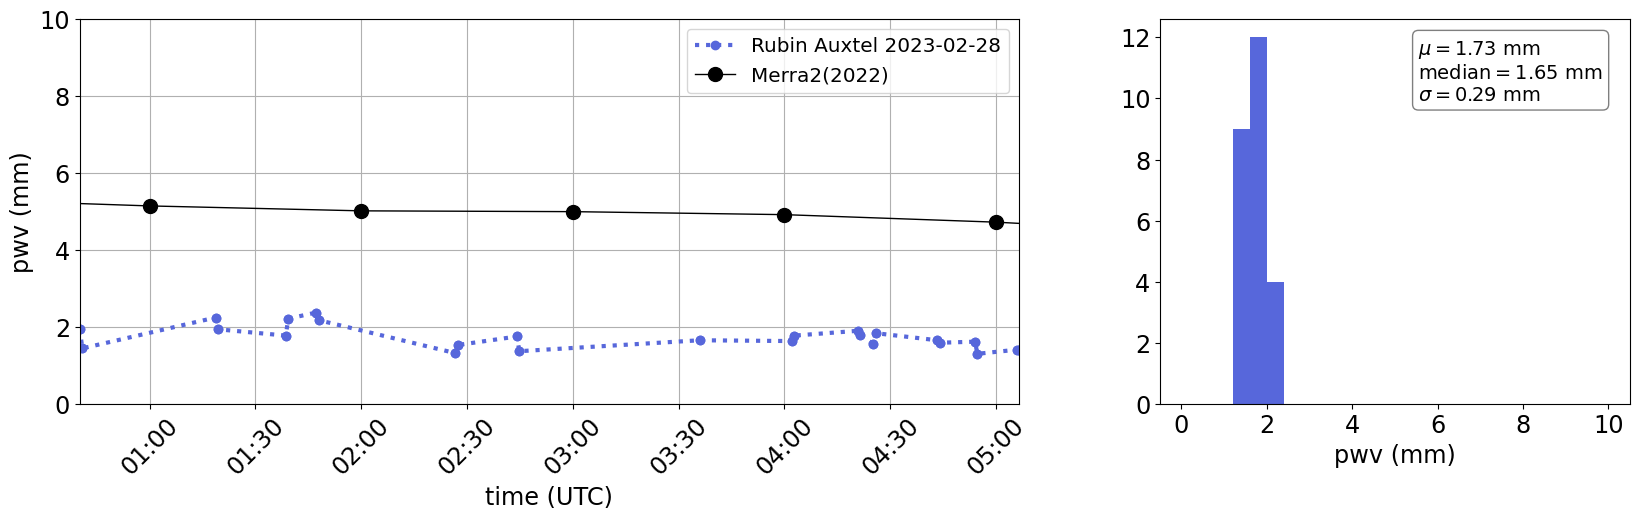

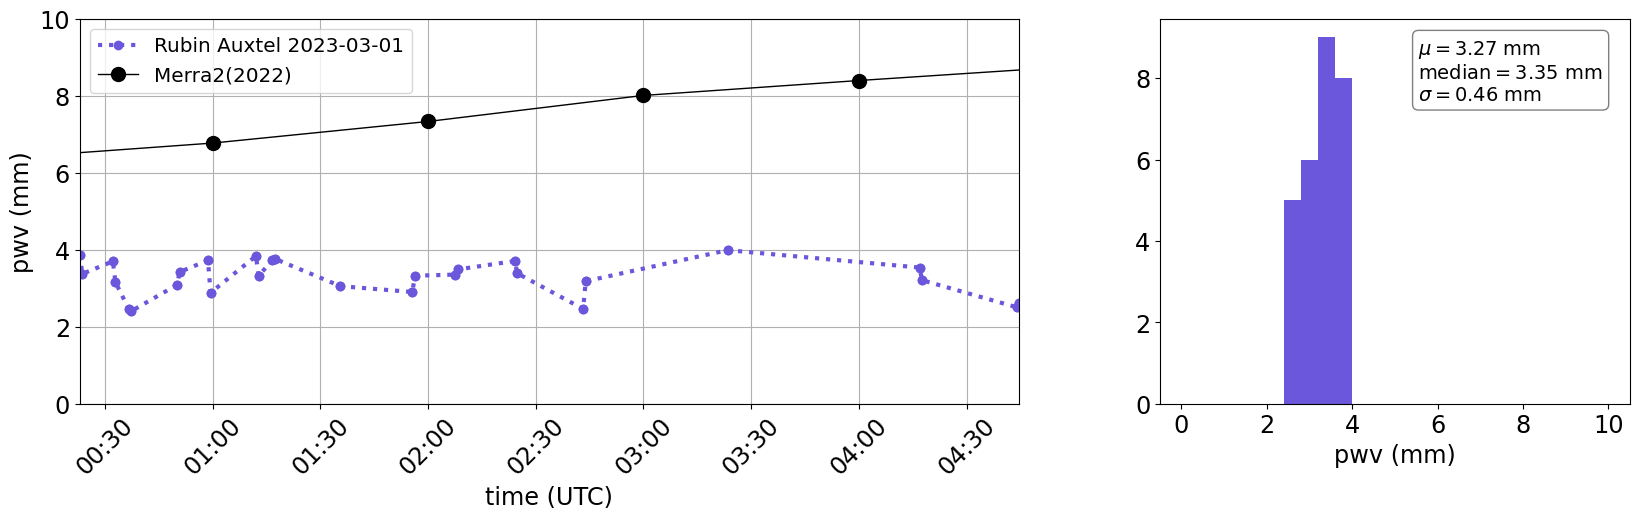

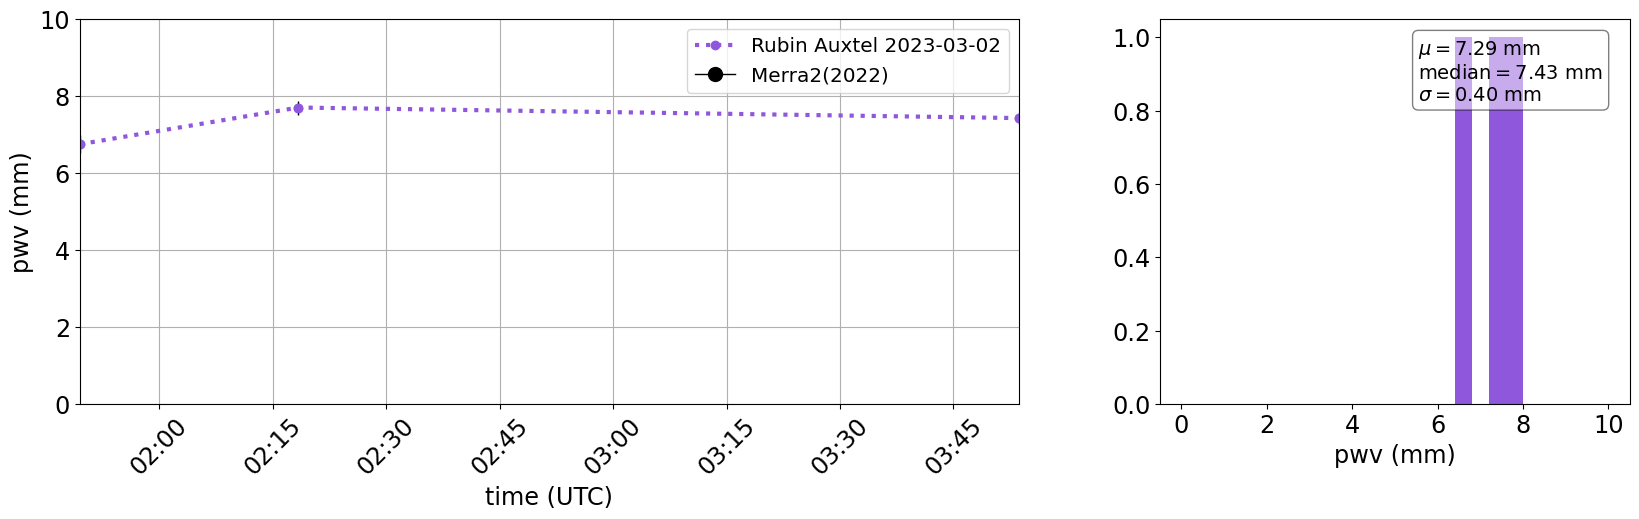

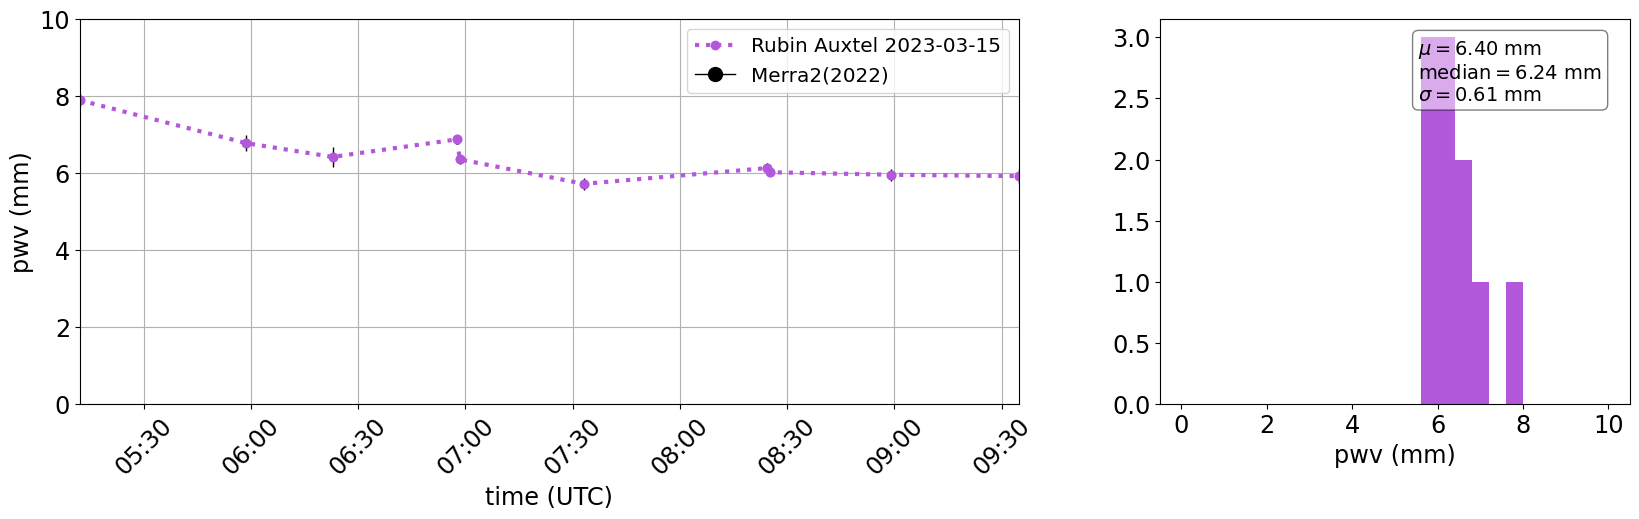

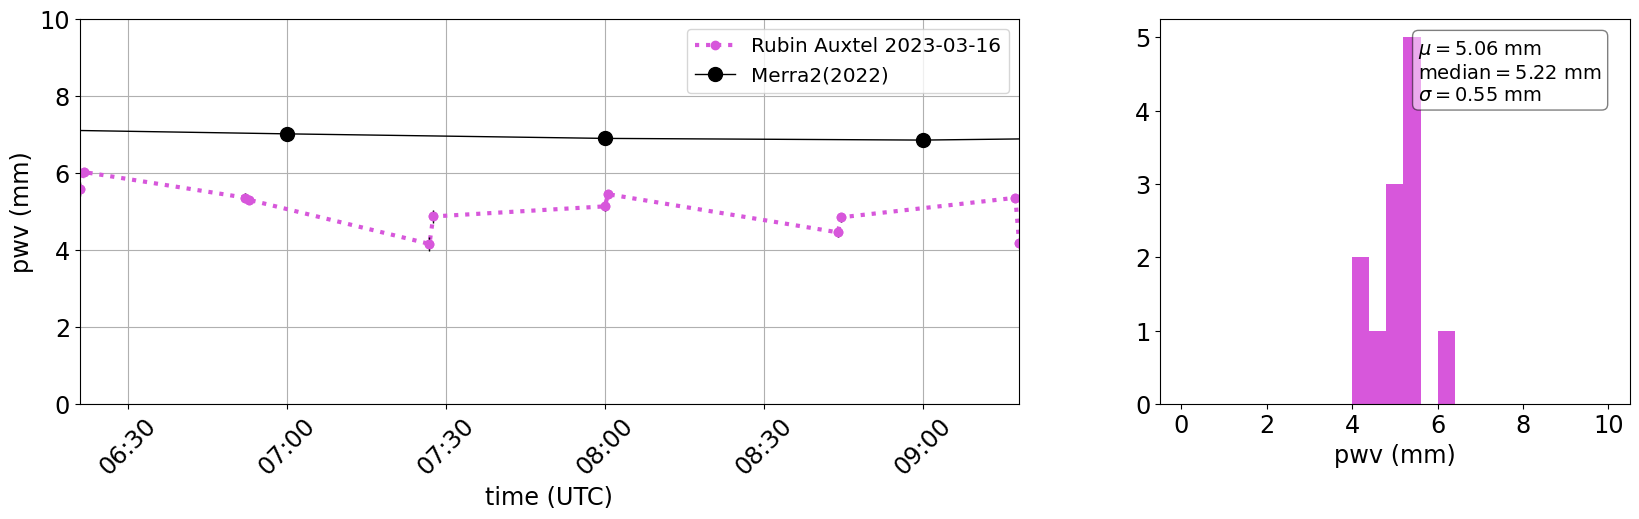

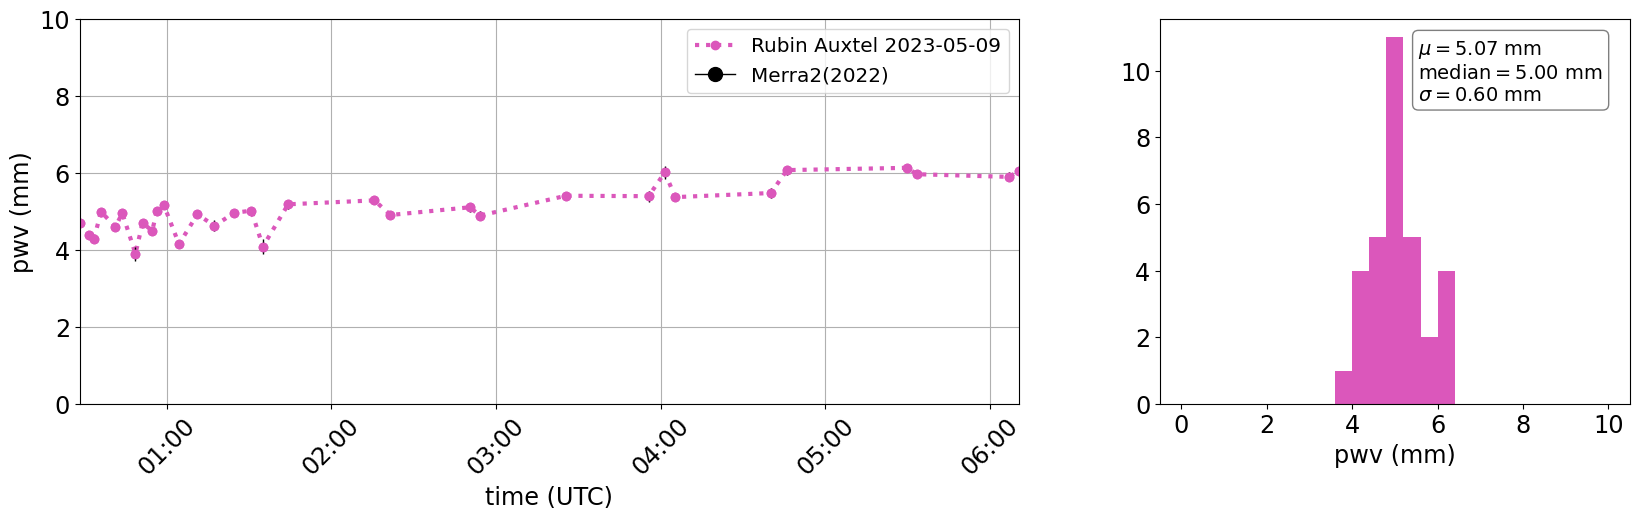

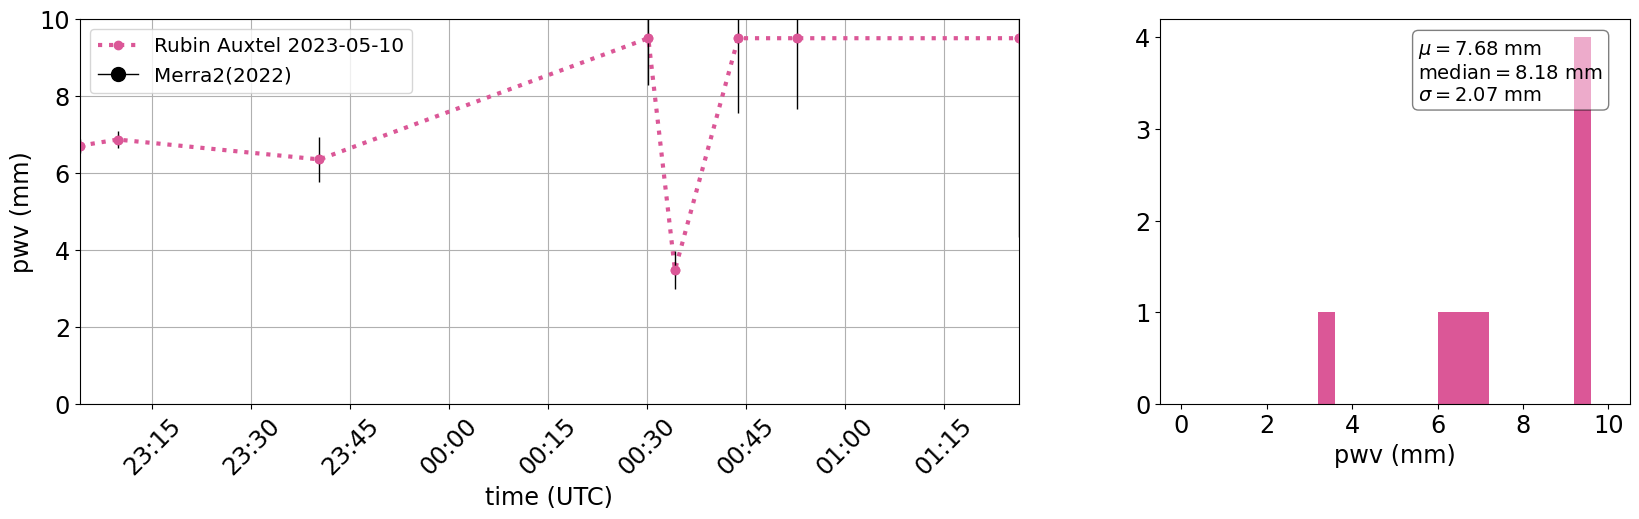

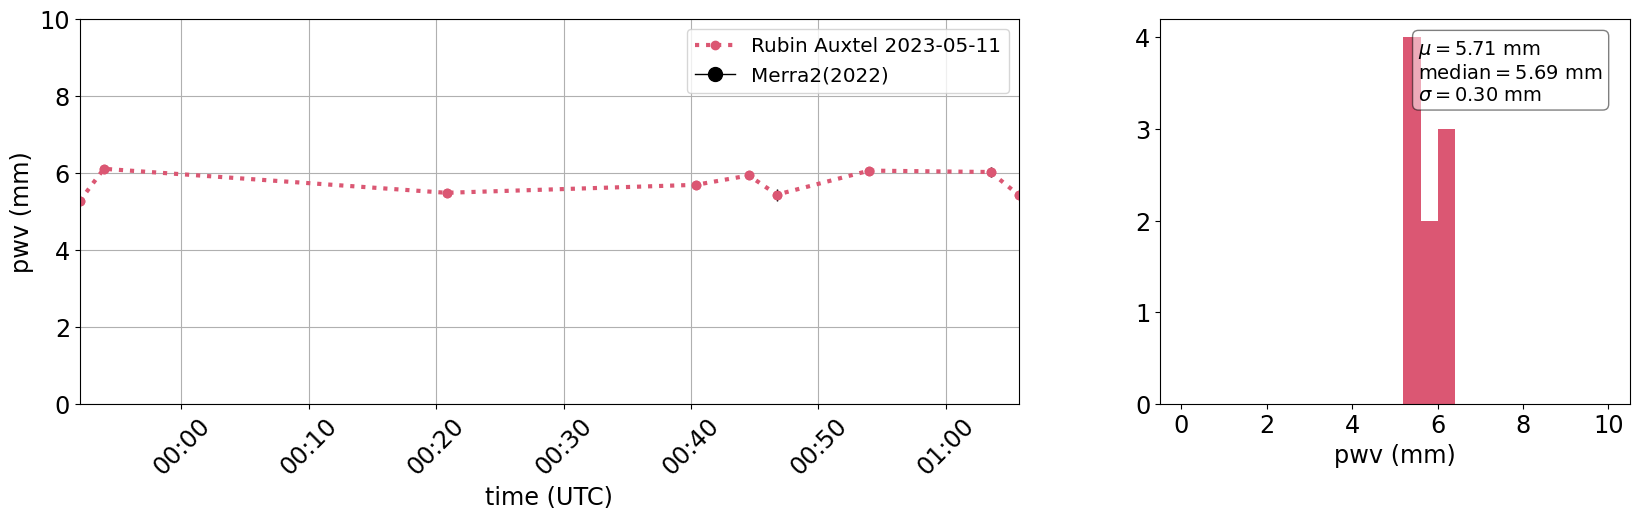

In [37]:
for idx,infos in enumerate(all_df):
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['spec_date_obs'] ]
    numbers = infos['number'].values
    
    #pwv= infos['pwv_avg'].values
    #epwv= infos['pwv_sig'].values
    
    
    pwv= infos['pwv_1'].values
    epwv= infos['epwv_1'].values
    

    N= len(numbers)
    if N<1:
        continue
  
        

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start



    fig=plt.figure(figsize=(20,5))
    gs = gridspec.GridSpec(1, 2,width_ratios=[3,1.5],figure=fig)
    
    ax= fig.add_subplot(gs[0,0])
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 



  
    ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel " + tags[idx])
    ax.errorbar(all_datetime,pwv,yerr=epwv,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1)
    
    ax.plot(all_merra2_datetime,pwv_merra2 ,'k-o',markersize=10,lw=1,label="Merra2(2022)")
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("pwv (mm)")
    ax.legend()

    ax.set_xlim(start,end)
    # Plot rectangle
    #rect = plt.Rectangle((start, airmasses.min()-2*y_shift), width, airmasses.max()+ 2*y_shift, color='grey',alpha=0.3)
    #ax2.add_patch(rect)   
    #ax.invert_yaxis()
    ax.grid()
    ax.set_ylim(0.,10.)


    
    
    
    ax= fig.add_subplot(gs[0,1])
    ax.hist(pwv,bins=25,range=(0,10),facecolor=hls_colors[idx])
    ax.set_xlabel("pwv (mm)")
    
    mu = pwv.mean()
    median = np.median(pwv)
    sigma =pwv.std()
    
    textstr = '\n'.join((
    r'$\mu=%.2f$ mm' % (mu, ),
    r'$\mathrm{median}=%.2f$ mm' % (median, ),
    r'$\sigma=%.2f$ mm' % (sigma, )))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax.text(0.55, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

    
    
    
    if FLAG_SELECT_POLAR:
        the_title = "Fitted pwv with polar star HD185975 : " + tags[idx]
    else:
        the_title = "Fitted pwv with all stars : " + tags[idx]
    #plt.suptitle(the_title,fontsize="20",fontweight="bold")
    plt.show()
    
    

In [38]:
np.ones(NF,dtype=int)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_80396/719452589.py:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel " + tags[idx])
/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_80396/719452589.py:19: RuntimeWarning: Mean of empty slice.
  mu = pwv.mean()
/Users/dagoret/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/dagoret/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/dagoret/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=ou

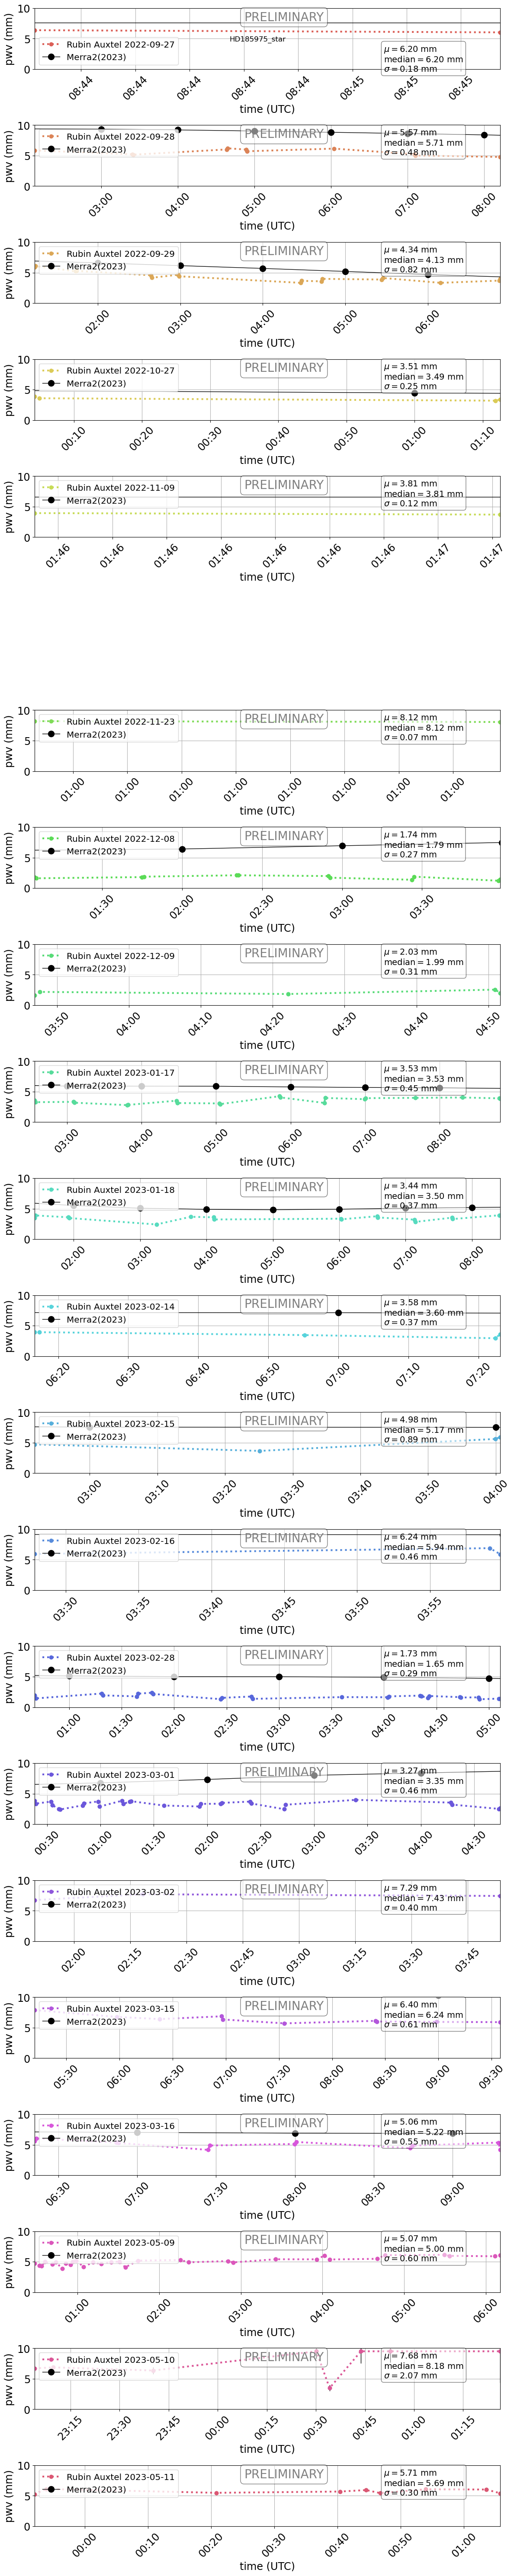

In [39]:
fig = plt.figure(figsize=(12,60))

gs = gridspec.GridSpec(NF, 1,height_ratios=np.ones(NF,dtype=int),figure=fig)


for idx,infos in enumerate(all_df):
    
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['spec_date_obs'] ]
    numbers = infos['number'].values
    
    #pwv= infos['pwv_avg'].values
    #epwv= infos['pwv_sig'].values
    
    pwv= infos['pwv_1'].values
    epwv= infos['epwv_1'].values
    
    
    mu = pwv.mean()
    median = np.median(pwv)
    sigma =pwv.std()
    
   
    

    N= len(numbers)
    if N<1:
        continue
  
        

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start

   
    
    ax= fig.add_subplot(gs[idx,0])
    
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 
  
    ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel " + tags[idx])
    ax.errorbar(all_datetime,pwv,yerr=epwv,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1)
    
    ax.plot(all_merra2_datetime,pwv_merra2 ,'k-o',markersize=10,lw=1,label="Merra2(2023)")
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("pwv (mm)")
    if idx == 0:
        ax.legend(loc='lower left')
    else:
        ax.legend(loc='upper left')
        
        
    textstr = '\n'.join((
    r'$\mu=%.2f$ mm' % (mu, ),
    r'$\mathrm{median}=%.2f$ mm' % (median, ),
    r'$\sigma=%.2f$ mm' % (sigma, )))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    if idx ==0:
        ax.text(0.75, 0.40, textstr, transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox=props)
    else:
        ax.text(0.75, 0.95, textstr, transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox=props)
        
    ax.text(0.45, 0.95, "PRELIMINARY", transform=ax.transAxes,color="grey" ,fontsize=20,verticalalignment='top', bbox=props)
        
    ax.set_xlim(start,end)
 
    ax.grid()
    ax.set_ylim(0.,10.)


plt.suptitle(tag_stars)
plt.tight_layout()
figname = f"fig_pwv_prelim-2023_{tag_stars}.png"
plt.savefig(figname)
plt.show()
    

# Compute average per night

## PWV

In [40]:
all_nights_pwvauxtel = np.zeros((len(all_df),3))
all_nights_pwvmerra2 = np.zeros((len(all_df),3))
all_night_N = np.zeros(len(all_df))
all_labels = []

for idx,infos in enumerate(all_df):
    
    all_night_N[idx] = len(infos) 
    all_labels.append(tags[idx])
    
    if len(infos) == 0:
        all_nights_pwvauxtel[idx,0] = np.nan
        all_nights_pwvauxtel[idx,1] = np.nan
        all_nights_pwvauxtel[idx,2] = np.nan
        
        all_nights_pwvmerra2[idx,0] = np.nan
        all_nights_pwvmerra2[idx,1] = np.nan
        all_nights_pwvmerra2[idx,2] = np.nan
        
        continue
        
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['spec_date_obs'] ]
    numbers = infos['number'].values
    
    pwv= infos['pwv_1'].values
    epwv= infos['epwv_1'].values
    
    
    
    mu = pwv.mean()
    median = np.median(pwv)
    sigma =pwv.std()
    
    all_nights_pwvauxtel[idx,0] = mu
    all_nights_pwvauxtel[idx,1] = median
    all_nights_pwvauxtel[idx,2] = sigma
        

    # Time boundaries of observations
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]
    
    
    night_pwv_merra2 = []
    for idx_m2,dattim_m2 in enumerate(all_merra2_datetime):
        if dattim_m2 >= startTime and dattim_m2 <= endTime:
            night_pwv_merra2.append(pwv_merra2.iloc[idx_m2]) 
        
    night_pwv_merra2=np.array(night_pwv_merra2)
    
    mu_m = night_pwv_merra2.mean()
    median_m = np.median(night_pwv_merra2)
    sigma_m =night_pwv_merra2.std()
    
    all_nights_pwvmerra2[idx,0] = mu_m
    all_nights_pwvmerra2[idx,1] = median_m
    all_nights_pwvmerra2[idx,2] = sigma_m
    
    

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_80396/2126839671.py:52: RuntimeWarning: Mean of empty slice.
  mu_m = night_pwv_merra2.mean()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

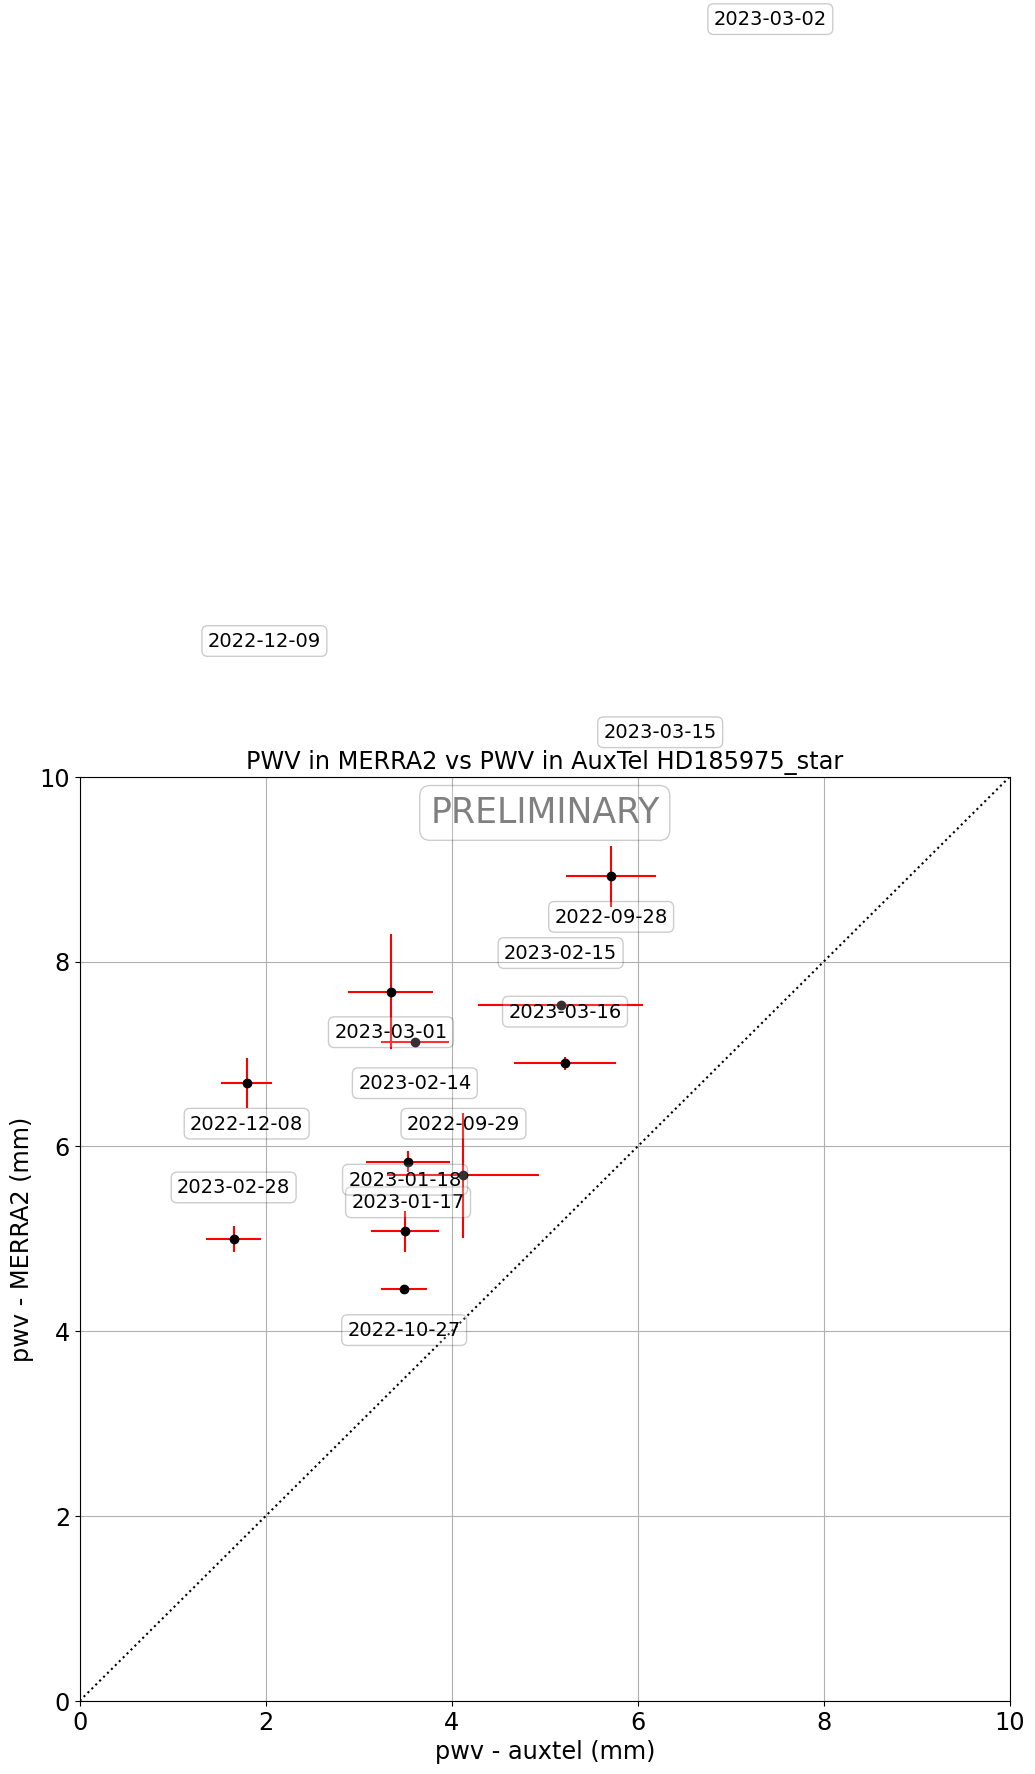

In [41]:
fig = plt.figure(figsize=(12,12))
props = dict(boxstyle='round', facecolor='white', alpha=0.2)

ax=fig.add_subplot(1,1,1)

ax.errorbar(all_nights_pwvauxtel[:,1],all_nights_pwvmerra2[:,1],xerr=all_nights_pwvauxtel[:,2], yerr=all_nights_pwvmerra2[:,2],marker="o",ls='none',ecolor="r",color="k")
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_title(f"PWV in MERRA2 vs PWV in AuxTel {tag_stars}")
ax.set_xlabel("pwv - auxtel (mm)")
ax.set_ylabel("pwv - MERRA2 (mm)")
ax.plot([0,10],[0,10],"k:")

for idx in range(len(all_nights_pwvauxtel[:,1])):
    
    if all_night_N[idx] == 0:
        continue
    
    xx=all_nights_pwvauxtel[idx,1]
    yy=all_nights_pwvmerra2[idx,1]
   
    if idx%2==0:
        yy+=0.5
    else:
        yy-=0.5
    
    
    #ax.text(xx, yy, tags[idx], transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox=props)
    ax.text(xx, yy, all_labels[idx], fontsize=14,horizontalalignment='center', bbox=props,alpha=1)
    
ax.text(0.5, 0.95, "PRELIMINARY", transform=ax.transAxes,color="grey" ,fontsize=25,horizontalalignment='center', bbox=props)

ax.grid()
figname = f"fig_pwvm2vspwvaux_prelim_{tag_stars}.png"
plt.savefig(figname)
plt.show()

## Find pairs

In [42]:
all_df[0].columns

Index(['index', 'exposure', 'spec_date_obs', 'spec_target_label',
       'spec_filter_label', 'spec_airmass', 'spec_pressure',
       'spec_temperature', 'spec_humidity', 'spec_hour_angle',
       'spec_parallactic_angle', 'spec_camera_angle', 'spec_order',
       'spec_header_target', 'spec_header_redshift', 'spec_header_grating',
       'spec_header_rotangle', 'spec_header_d2ccd', 'spec_header_lshift',
       'spec_header_parangle', 'spec_header_targetx', 'spec_header_targety',
       'spec_header_lbda_ref', 'spec_header_pixshift', 'spec_header_psf_reg',
       'spec_header_trace_r', 'spec_header_chi2_fit', 'spec_header_a2_fit',
       'spec_header_am_fit', 'spec_header_meanfwhm', 'spec_header_version',
       'spec_header_rebin', 'spec_header_date-obs', 'spec_header_exptime',
       'spec_header_airmass', 'spec_header_dec', 'spec_header_ha',
       'spec_header_outtemp', 'spec_header_outpress', 'spec_header_outhum',
       'spec_header_filter', 'spec_header_cam_rot', 'spec_header_s_

In [43]:
all_df[0]

index       exposure                   spec_date_obs spec_target_label  \
4     27  2022092700734  2022-09-28T08:44:30.712000547Z          HD185975   
5     28  2022092700735  2022-09-28T08:45:13.622001236Z          HD185975   

  spec_filter_label  spec_airmass  spec_pressure  spec_temperature  \
4             empty      2.052135              0                 0   
5             empty      2.052582              0                 0   

   spec_humidity  spec_hour_angle  ...   egrey_3     SNR_3    chi2_4  \
4              0      -239.381469  ...  0.001214  0.070459  3.429068   
5              0      -239.202314  ...  0.002100  0.011859  5.505423   

      pwv_4    grey_4    epwv_4   egrey_4     SNR_4   pwv_avg   pwv_sig  
4  7.198238  0.642188  0.288268  0.001155  0.037200  6.366714  0.696058  
5  7.121764  0.988605  0.296650  0.001840  0.072462  6.234264  0.667250  

[2 rows x 98 columns]

In [44]:
sorted(all_datetime)

[datetime.datetime(2023, 5, 11, 23, 52, 1, 599992),
 datetime.datetime(2023, 5, 11, 23, 53, 55, 34507),
 datetime.datetime(2023, 5, 12, 0, 20, 48, 671995),
 datetime.datetime(2023, 5, 12, 0, 40, 22, 965507),
 datetime.datetime(2023, 5, 12, 0, 44, 31, 382492),
 datetime.datetime(2023, 5, 12, 0, 46, 44, 261509),
 datetime.datetime(2023, 5, 12, 0, 53, 58, 869992),
 datetime.datetime(2023, 5, 12, 1, 3, 30, 314510),
 datetime.datetime(2023, 5, 12, 1, 5, 44, 961991)]

In [45]:
np.argsort(all_datetime)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [46]:
for idx,infos in enumerate(all_df):
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['spec_date_obs'] ]
    
    print(idx,"argsort=",np.argsort(all_datetime))
    nn=len(all_datetime)
    difftimes = [ (all_datetime[n+1]-all_datetime[n]).seconds for n in range(nn-1) ]
    print("difftime",difftimes)
                 
    

0 argsort= [0 1]
difftime [42]
1 argsort= [ 0  1  2  3  4  5  6  7  8  9 10]
difftime [4594, 42, 4398, 42, 866, 42, 4075, 3798, 42, 3981]
2 argsort= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
difftime [42, 1744, 42, 3240, 42, 1143, 42, 5302, 42, 867, 42, 2581, 42, 2518, 2565, 42]
3 argsort= [0 1 2 3]
difftime [42, 4015, 42]
4 argsort= [0 1]
difftime [42]
5 argsort= []
difftime []
6 argsort= [0 1]
difftime [42]
7 argsort= [ 0  1  2  3  4  5  6  7  8  9 10 11]
difftime [42, 2377, 42, 2080, 42, 2023, 42, 1841, 42, 1898, 42]
8 argsort= [0 1 2 3 4]
difftime [42, 2072, 1728, 42]
9 argsort= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
difftime [42, 1846, 42, 2554, 42, 2326, 42, 2030, 42, 2865, 42, 2123, 42, 1914, 42, 2407, 2273, 1781, 42]
10 argsort= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
difftime [42, 1788, 43, 4735, 1854, 1241, 42, 6855, 42, 1926, 42, 1987, 42, 1988, 42, 2533, 42]
11 argsort= [0 1 2 3 4]
difftime [43, 2272, 1631, 42]
12 argsort= [

In [47]:
def FindPairs(df):
    all_datetime = [ Time(str_time).to_datetime() for str_time in df['spec_date_obs'] ]
    nn=len(all_datetime)
    difftimes = [ (all_datetime[n+1]-all_datetime[n]).seconds for n in range(nn-1) ]
    id_pairs = []
    
    for idx,difft in   enumerate(difftimes):
        if difft<60:
            id_pairs.append(idx)
            
    all_dpwv = []
    for idx in id_pairs:
        #pwv1 = df.iloc[idx]['pwv_avg']
        #pwv2 = df.iloc[idx+1]['pwv_avg']
        
        
        pwv1 = df.iloc[idx]['pwv_1']
        pwv2 = df.iloc[idx+1]['pwv_1']
        
        
        
        dpwv = pwv1-pwv2
        all_dpwv.append(dpwv)       
    
    return np.array(id_pairs),np.array(all_dpwv)
    

In [48]:
all_diffpwv = []
for df in all_df:
    idxs_pairs, pwv_diff = FindPairs(df)
    all_diffpwv.append(pwv_diff)

In [49]:
all_diffpwv = np.concatenate(all_diffpwv,axis=0)

### Fit a gaussian

In [78]:
(mu_fit, sigma_fit) = norm.fit(all_diffpwv)

In [79]:
sigma_fit

0.37818169738617075

In [84]:
mu_fit

0.04091929435985797

### statistics

In [50]:
the_mean =all_diffpwv.mean()

In [51]:
the_std = all_diffpwv.std()

In [52]:
the_median = np.median(all_diffpwv)

In [53]:
textstr = '\n'.join((
    r'$\mu=%.2f$' % (the_mean, ),
    r'$\mathrm{median}=%.2f$' % (the_median, ),
    r'$\sigma=%.2f$' % (the_std, )))

Text(0.5, 1.0, 'PWV difference in pairs')

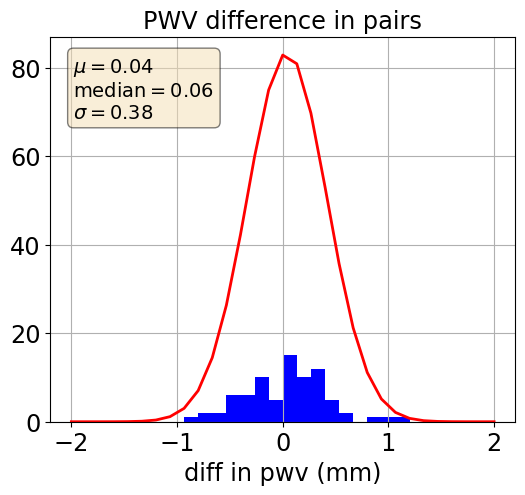

In [101]:
fig = plt.figure(figsize=(6,5))
ax=fig.add_subplot(1,1,1)
h = ax.hist(all_diffpwv,bins=30,range=(-2,2),density=False,facecolor="b");

counts = h[0]
bins = h[1]

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

y = norm.pdf(bins, mu_fit, sigma_fit)*counts.sum()
l = ax.plot(bins, y, 'r-', linewidth=2)


ax.set_xlabel("diff in pwv (mm)")
ax.grid()
ax.set_title("PWV difference in pairs")

In [55]:
df= all_df[0]

In [56]:
df.columns

Index(['index', 'exposure', 'spec_date_obs', 'spec_target_label',
       'spec_filter_label', 'spec_airmass', 'spec_pressure',
       'spec_temperature', 'spec_humidity', 'spec_hour_angle',
       'spec_parallactic_angle', 'spec_camera_angle', 'spec_order',
       'spec_header_target', 'spec_header_redshift', 'spec_header_grating',
       'spec_header_rotangle', 'spec_header_d2ccd', 'spec_header_lshift',
       'spec_header_parangle', 'spec_header_targetx', 'spec_header_targety',
       'spec_header_lbda_ref', 'spec_header_pixshift', 'spec_header_psf_reg',
       'spec_header_trace_r', 'spec_header_chi2_fit', 'spec_header_a2_fit',
       'spec_header_am_fit', 'spec_header_meanfwhm', 'spec_header_version',
       'spec_header_rebin', 'spec_header_date-obs', 'spec_header_exptime',
       'spec_header_airmass', 'spec_header_dec', 'spec_header_ha',
       'spec_header_outtemp', 'spec_header_outpress', 'spec_header_outhum',
       'spec_header_filter', 'spec_header_cam_rot', 'spec_header_s_

## Merge dataframe

In [57]:
df_merge = pd.concat(all_df)

In [71]:
df_merge

index       exposure                   spec_date_obs spec_target_label  \
4      27  2022092700734  2022-09-28T08:44:30.712000547Z          HD185975   
5      28  2022092700735  2022-09-28T08:45:13.622001236Z          HD185975   
0       0  2022092800358  2022-09-29T02:07:48.026501837Z          HD185975   
2      20  2022092800469  2022-09-29T03:24:22.341002192Z          HD185975   
3      21  2022092800470  2022-09-29T03:25:05.327496966Z          HD185975   
..    ...            ...                             ...               ...   
10     20  2023051100233  2023-05-12T00:44:31.382492410Z          HD185975   
11     21  2023051100236  2023-05-12T00:46:44.261508838Z          HD185975   
13     23  2023051100245  2023-05-12T00:53:58.869992498Z          HD185975   
16     26  2023051100257  2023-05-12T01:03:30.314509927Z          HD185975   
17     27  2023051100260  2023-05-12T01:05:44.961991483Z          HD185975   

   spec_filter_label  spec_airmass  spec_pressure  spec_temperature  \
4              empty      2.052135              0                 0   
5              empty      2.052582              0                 0   
0              empty      1.844346              0                 0   
2              empty      1.865924              0                 0   
3              empty      1.866183              0                 0   
..               ...           ...            ...               ...   
10             empty      2.103332              0                 0   
11             empty      2.101509              0                 0   
13             empty      2.098629              0                 0   
16             empty      2.093680              0                 0   
17             empty      2.091748              0                 0   

    spec_humidity  spec_hour_angle  ...   egrey_3     SNR_3     chi2_4  \
4               0      -239.381469  ...  0.001214  0.070459   3.429068   
5               0      -239.202314  ...  0.002100  0.011859   5.505423   
0               0      -339.105629  ...  0.002039  0.064295   7.841671   
2               0      -319.739723  ...  0.002473  0.077616  14.283400   
3               0      -319.556360  ...  0.002365  0.025491  16.887534   
..            ...              ...  ...       ...       ...        ...   
10              0      -136.717421  ...  0.001635  0.066612   4.088804   
11              0      -135.994466  ...  0.003229  0.088654  22.301741   
13              0      -134.384948  ...  0.001464  0.082176   3.963201   
16              0      -132.033461  ...  0.002083  0.009151   6.671683   
17              0      -131.283427  ...  0.002275  0.075838  11.191696   

       pwv_4    grey_4    epwv_4   egrey_4     SNR_4   pwv_avg   pwv_sig  
4   7.198238  0.642188  0.288268  0.001155  0.037200  6.366714  0.696058  
5   7.121764  0.988605  0.296650  0.001840  0.072462  6.234264  0.667250  
0   7.454947  1.022783  0.267768  0.001601  0.008143  6.021424  0.985342  
2   7.019726  1.025409  0.346493  0.002080  0.041179  5.395456  0.902924  
3   6.707261  1.013475  0.367649  0.002237  0.024022  5.331986  0.820345  
..       ...       ...       ...       ...       ...       ...       ...  
10  7.262500  1.010128  0.211648  0.001363  0.045800  6.009896  0.735803  
11  6.175447  1.012504  0.458125  0.003073  0.145644  5.510697  0.659891  
13  7.633003  1.015319  0.225693  0.001424  0.050955  6.103059  0.901676  
16  7.249855  1.024393  0.263372  0.001698  0.001724  6.043907  0.654620  
17  6.902173  1.025930  0.332267  0.002200  0.037959  5.569093  0.834025  

[232 rows x 98 columns]

### Delete big chi2/NDF above 100

In [67]:
cut = (df_merge.chi2_1 > 100) | (df_merge.chi2_2 > 100) | (df_merge.chi2_3 > 100) | (df_merge.chi2_4 > 100) 

In [72]:
df_merge = df_merge[~cut]

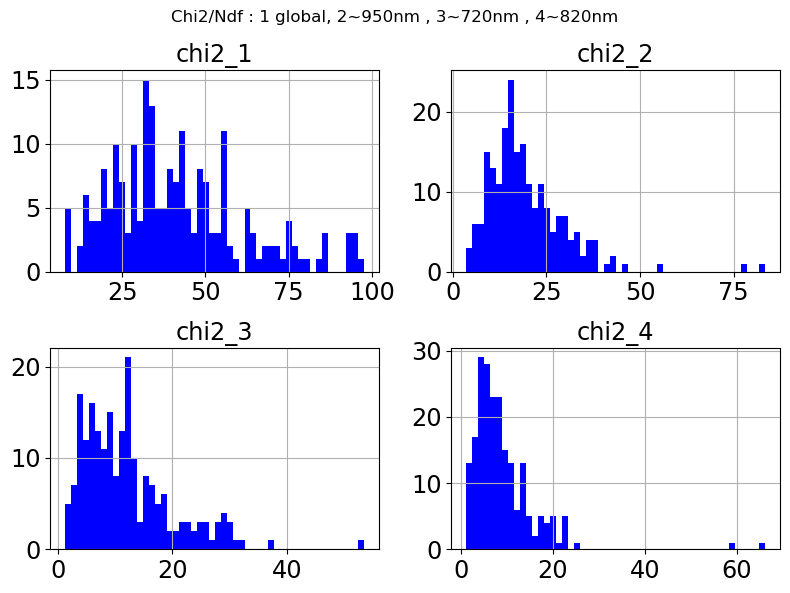

In [73]:
fig, axes = plt.subplots(ncols=2,nrows=2, figsize=(8,6))
for i, ax in enumerate(axes.flat):
    if i ==0:
        df_merge.hist('chi2_1',bins=50,ax=ax,facecolor="b")
    elif i==1:
        df_merge.hist('chi2_2',bins=50,ax=ax,facecolor="b")
    elif i ==2:
        df_merge.hist('chi2_3',bins=50,ax=ax,facecolor="b")
    elif i==3:
        df_merge.hist('chi2_4',bins=50,ax=ax,facecolor="b")
plt.suptitle("Chi2/Ndf : 1 global, 2~950nm , 3~720nm , 4~820nm")
plt.tight_layout()
plt.show()
        

/Users/dagoret/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


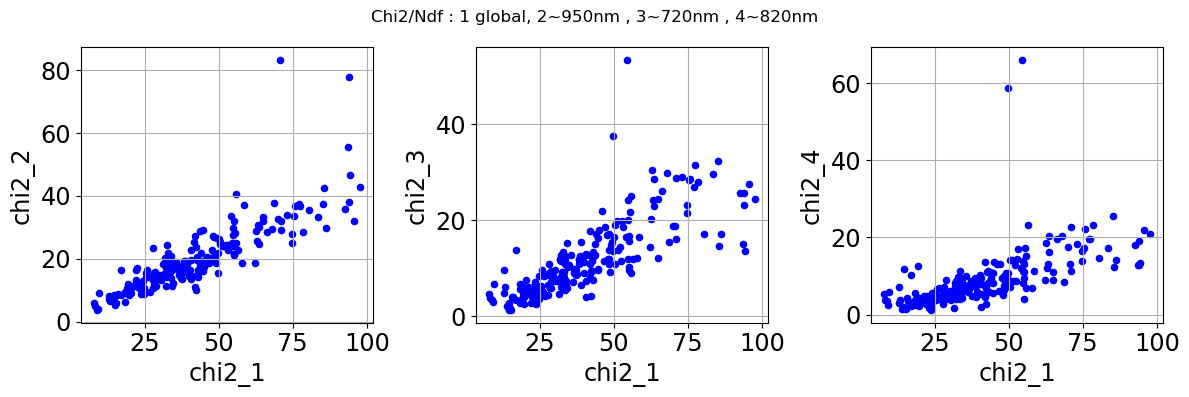

In [74]:
fig, axes = plt.subplots(ncols=3,nrows=1, figsize=(12,4))
for i, ax in enumerate(axes.flat):
    if i ==0 :
        df_merge.plot.scatter('chi2_1','chi2_2',ax=ax,color="b")
    elif i==1:
        df_merge.plot.scatter('chi2_1','chi2_3',ax=ax,color="b")
    elif i ==2:
        df_merge.plot.scatter('chi2_1','chi2_4',ax=ax,color="b")
    ax.grid()   
plt.suptitle("Chi2/Ndf : 1 global, 2~950nm , 3~720nm , 4~820nm")
plt.tight_layout()
plt.show()


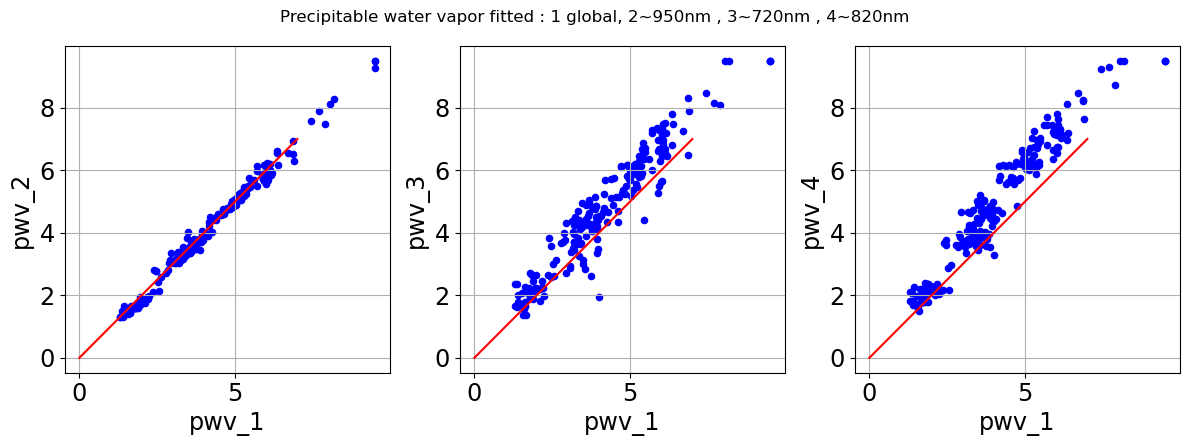

In [75]:
fig, axes = plt.subplots(ncols=3,nrows=1, figsize=(12,4.5))
for i, ax in enumerate(axes.flat):
    if i ==0 :
        df_merge.plot.scatter('pwv_1','pwv_2',ax=ax,color='b')
        ax.plot([0,7],[0,7],'r-')
    elif i==1:
        df_merge.plot.scatter('pwv_1','pwv_3',ax=ax,color='b')
        ax.plot([0,7],[0,7],'r-')
    elif i ==2:
        df_merge.plot.scatter('pwv_1','pwv_4',ax=ax,color='b')
        ax.plot([0,7],[0,7],'r-')
    ax.grid() 
plt.suptitle("Precipitable water vapor fitted : 1 global, 2~950nm , 3~720nm , 4~820nm")
plt.tight_layout()
plt.show()
    

In [61]:
df_merge.columns

Index(['index', 'exposure', 'spec_date_obs', 'spec_target_label',
       'spec_filter_label', 'spec_airmass', 'spec_pressure',
       'spec_temperature', 'spec_humidity', 'spec_hour_angle',
       'spec_parallactic_angle', 'spec_camera_angle', 'spec_order',
       'spec_header_target', 'spec_header_redshift', 'spec_header_grating',
       'spec_header_rotangle', 'spec_header_d2ccd', 'spec_header_lshift',
       'spec_header_parangle', 'spec_header_targetx', 'spec_header_targety',
       'spec_header_lbda_ref', 'spec_header_pixshift', 'spec_header_psf_reg',
       'spec_header_trace_r', 'spec_header_chi2_fit', 'spec_header_a2_fit',
       'spec_header_am_fit', 'spec_header_meanfwhm', 'spec_header_version',
       'spec_header_rebin', 'spec_header_date-obs', 'spec_header_exptime',
       'spec_header_airmass', 'spec_header_dec', 'spec_header_ha',
       'spec_header_outtemp', 'spec_header_outpress', 'spec_header_outhum',
       'spec_header_filter', 'spec_header_cam_rot', 'spec_header_s_

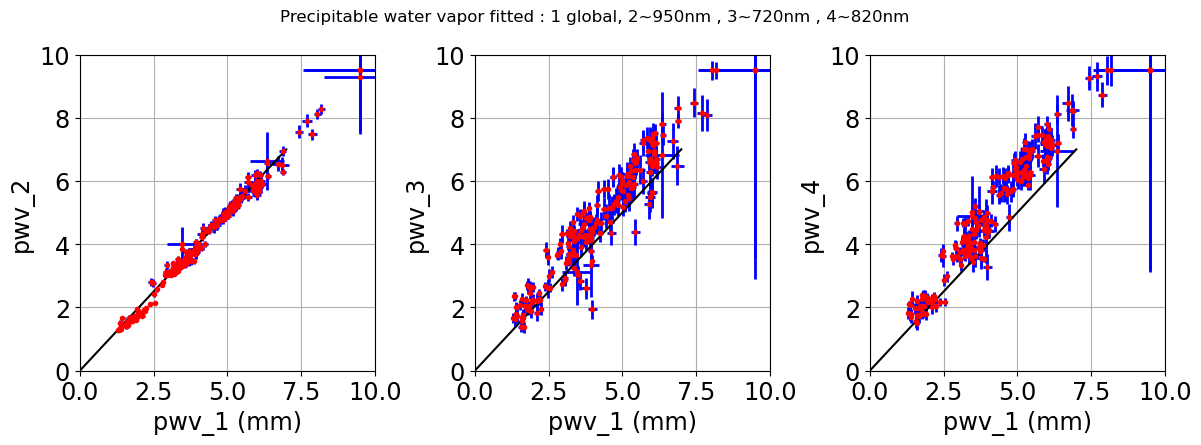

In [76]:
fig, axes = plt.subplots(ncols=3,nrows=1, figsize=(12,4.5))
for i, ax in enumerate(axes.flat):
    if i ==0 :
        ax.errorbar(df_merge.pwv_1,df_merge.pwv_2,xerr=df_merge.epwv_1,yerr=df_merge.epwv_2,marker="o",c="r",ms=3,ecolor="b",elinewidth=2,lw=0)
        ax.plot([0,7],[0,7],'k-')
        ax.set_xlabel("pwv_1 (mm)")
        ax.set_ylabel("pwv_2")
        ax.set_xlim(0.,10.)
        ax.set_ylim(0.,10.)
    elif i==1:
        ax.errorbar(df_merge.pwv_1,df_merge.pwv_3,xerr=df_merge.epwv_1,yerr=df_merge.epwv_3,marker="o",c="r",ms=3,ecolor="b",elinewidth=2,lw=0)
        ax.plot([0,7],[0,7],'k-')
        ax.set_xlabel("pwv_1 (mm)")
        ax.set_ylabel("pwv_3")
        ax.set_xlim(0.,10.)
        ax.set_ylim(0.,10.)
    elif i ==2:
        ax.errorbar(df_merge.pwv_1,df_merge.pwv_4,xerr=df_merge.epwv_1,yerr=df_merge.epwv_4,marker="o",c="r",ms=3,ecolor="b",elinewidth=2,lw=0)
        ax.plot([0,7],[0,7],'k-')
        ax.set_xlabel("pwv_1 (mm)")
        ax.set_ylabel("pwv_4")
        ax.set_xlim(0.,10.)
        ax.set_ylim(0.,10.)
    ax.grid() 
plt.suptitle("Precipitable water vapor fitted : 1 global, 2~950nm , 3~720nm , 4~820nm")
plt.tight_layout()
plt.show()
    

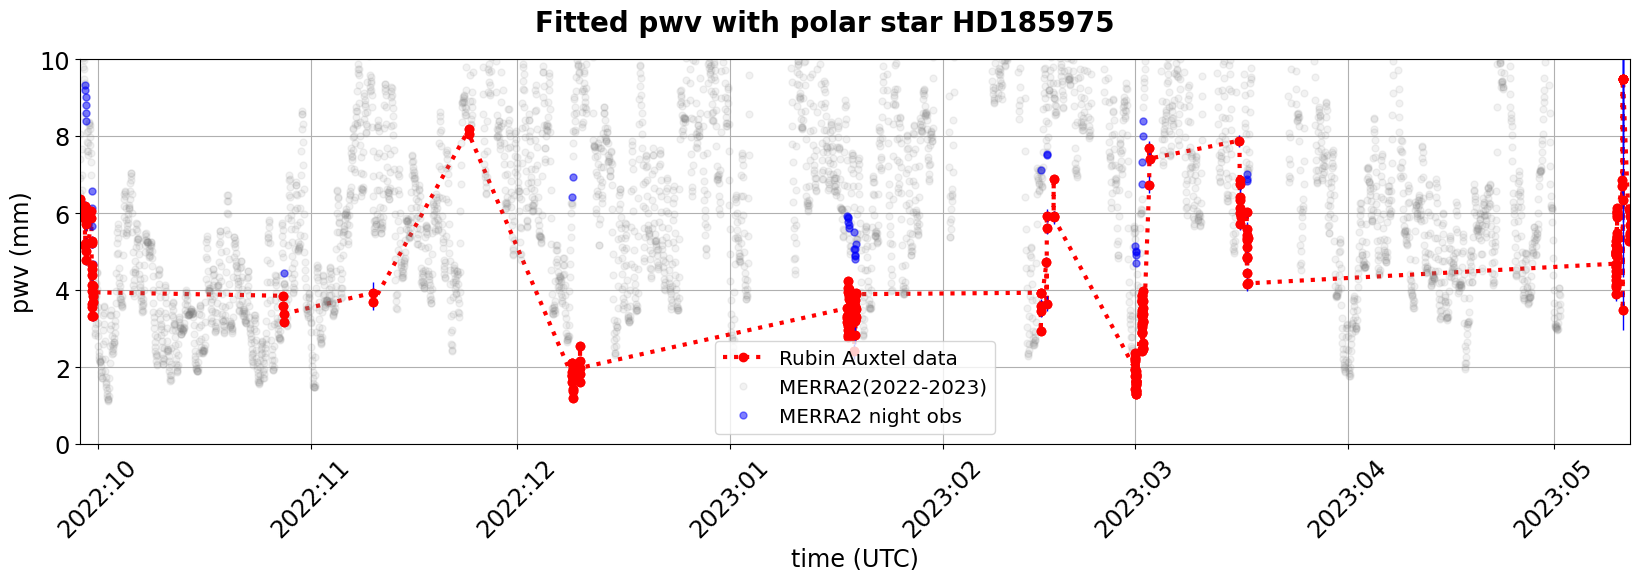

In [63]:
infos = df_merge
    
all_datetime = [ Time(str_time).to_datetime() for str_time in infos['spec_date_obs'] ]
numbers = infos['number'].values
    
pwv= infos['pwv_1'].values
epwv= infos['epwv_1'].values
    
all_datetime_merra2_nightobs =  [Time(str_time).to_datetime() for str_time in merra2_nightobs['time']]
pwv_merra2_nightobs = merra2_nightobs['TQV']
        

# Create rectangle x coordinates
startTime = all_datetime[0]
endTime =  all_datetime[-1]

# convert to matplotlib date representation
start = mdates.date2num(startTime)
end = mdates.date2num(endTime)
width = end - start



fig=plt.figure(figsize=(20,5))
gs = gridspec.GridSpec(1, 1,width_ratios=[1],figure=fig)
    
ax= fig.add_subplot(gs[0,0])
myFmt = mdates.DateFormatter('%Y:%m')
ax.xaxis.set_major_formatter(myFmt)
 

y_shift= 1

  
ax.plot(all_datetime,pwv,':o',color='r',lw=3,label="Rubin Auxtel data")
ax.errorbar(all_datetime,pwv,yerr=epwv,fmt='o',color='r',ecolor="b",lw=1,alpha=1)
    
ax.plot(all_merra2_datetime,pwv_merra2 ,'o',color="grey",markersize=5,lw=1,alpha=0.1,label="MERRA2(2022-2023)")
ax.plot(all_datetime_merra2_nightobs ,pwv_merra2_nightobs ,'o',color="b",markersize=5,lw=1,alpha=0.5,label="MERRA2 night obs")
    

ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlabel("time (UTC)")
ax.set_ylabel("pwv (mm)")
#ax.set_ylim(pwv.min()-2*y_shift,pwv.max()+2*y_shift)
ax.set_xlim(start,end)

    
ax.grid()
ax.set_ylim(0.,10.)

ax.legend()
    
    
if FLAG_SELECT_POLAR:
    the_title = "Fitted pwv with polar star HD185975 "
else:
    the_title = "Fitted pwv with all stars "
plt.suptitle(the_title,fontsize="20",fontweight="bold")
plt.show()
    
    